# Исследование объявлений о продаже квартир

### Цель проекта

Используя данные о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет сервиса Яндекс Недвижимость провести исследовательский анализ и установить параметры влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. Определить факторы, которые больше всего влияют на общую стоимость объекта.

### Цели исследования

Определить и визуализировать вес факторов:
* общая площадь
* жилая площадь
* площади кухни
* количество комнат
* этаж, на котором расположена квартира (первый, последний, другой)
* дата размещения (день недели, месяц, год)


Расчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.Визуализировать количество объявлений со средней ценой квадратного метра для этих населенных пунктов. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Расчитать среднюю стоимость квартир в Санкт-Петербурге на разном удалении от центра. Построить график изменения средней цены для каждого километра от центра.

### Ход исследования

1. Обзор данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Поиск зависимостей и закономерностей, проверка гипотез, визуализация результатов
5. Подведение итогов и написание выводов

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from collections import defaultdict


In [2]:
df = pd.read_csv('C:\\Users\\Freo\\Desktop\\projects\\datasets\\p2.csv', sep='\t')
pd.set_option('display.max_columns', None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
display(df.describe())

total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445      4.885249      5.905438      1.071300   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      1.000000   
75%       16.000000     42.300000      8.000000     12.000000      2.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count      18157.000000         18180.000000      18181.000000    8079.000000   
mean       28793.672193         14191.277833          0.611408     490.804555   
std        12630.880622          8608.386210          0.802074     342.317995   
min            0.000000           181.000000          0.000000       1.000000   
25%        18585.000000          9238.000000          0.000000     288.000000   
50%        26726.000000         13098.500000          0.000000     455.000000   
75%        37273.000000         16293.000000          1.000000     612.000000   
max        84869.000000         65968.000000          3.000000    3190.000000   

       ponds_around3000  ponds_nearest  days_exposition  
count      18181.000000    9110.000000     20518.000000  
mean           0.770255     517.980900       180.888634  
std            0.938346     277.720643       219.727988  
min            0.000000      13.000000         1.000000  
25%            0.000000     294.000000        45.000000  
50%            1.000000     502.000000        95.000000  
75%            1.000000     729.000000       232.000000  
max            3.000000    1344.000000      1580.000000

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
display(df.head())

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт-Петербург           18863.0   
1      False          11.0      2.0   посёлок Шушары           12817.0   
2      False           8.3      0.0  Санкт-Петербург           21741.0   
3      False           NaN      0.0  Санкт-Петербург           28098.0   
4      False          41.0      NaN  Санкт-Петербург           31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0

значения ячеек согласно описанию:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Постройте общую гистограмму для всех столбцов таблицы

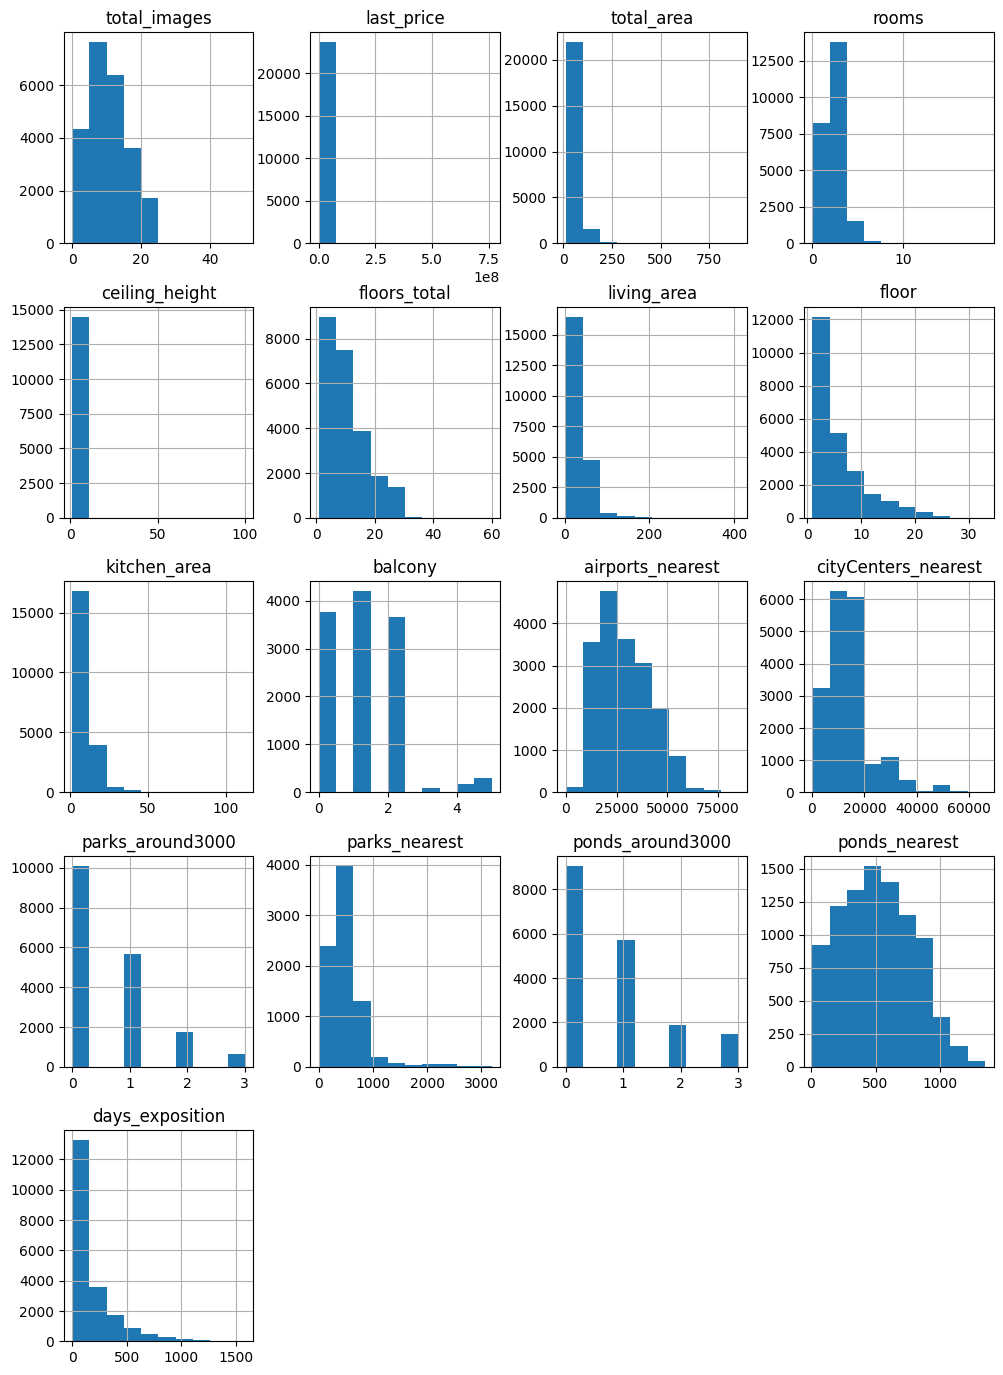

In [7]:
df.hist(figsize=(12, 17));
#df.hist(figsize=(12, 20),layout=(7,3));

## Предобработка данных

### Найдите и изучите пропущенные значения в столбцах:
* Определите, в каких столбцах есть пропуски.
* Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставьте эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.
* В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.

переименуем некорректно называные столбцы:
cityCenters_nearest -> city_centers_nearest

In [8]:
df = df.rename(columns={"cityCenters_nearest": "city_centers_nearest"})

сразу изменим столбец где записаны даты в формат дат для удобства

In [9]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [10]:
print(df['first_day_exposition'])

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]


количество пропусков:

In [11]:
display(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

количество пропусков, %

In [12]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

мы нашли столбцы с пропусками, посмотрим на них внимательнее:
* ceiling_height           9195
* floors_total               86
* living_area              1903
* is_apartment            20924
* kitchen_area             2278
* balcony                 11519
* locality_name              49
* airports_nearest         5542
* city_centers_nearest     5519
* parks_around3000         5518
* parks_nearest           15620
* ponds_around3000         5518
* ponds_nearest           14589
* days_exposition          3181

####  Определите, в каких столбцах есть пропуски.

In [13]:
display(df[df['ceiling_height'].isna() == True].head(15))

total_images  last_price  total_area first_day_exposition  rooms  \
1              7   3350000.0       40.40           2018-12-04      1   
2             10   5196000.0       56.00           2015-08-20      2   
3              0  64900000.0      159.00           2015-07-24      3   
5             10   2890000.0       30.40           2018-09-10      1   
6              6   3700000.0       37.30           2017-11-02      1   
7              5   7915000.0       71.60           2019-04-18      2   
8             20   2900000.0       33.16           2018-05-23      1   
11             9   3300000.0       44.00           2018-08-27      2   
12            10   3890000.0       54.00           2016-06-30      2   
14             1   4400000.0       36.00           2016-06-23      1   
15            16   4650000.0       39.00           2017-11-18      1   
17             6   4180000.0       36.00           2016-09-09      1   
21            13   3200000.0       31.60           2018-03-14      1   
24             8   6500000.0       97.20           2015-10-31      2   
26             6   4050000.0       60.00           2017-04-28      4   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1              NaN          11.0        18.60      1          NaN   False   
2              NaN           5.0        34.30      4          NaN   False   
3              NaN          14.0          NaN      9          NaN   False   
5              NaN          12.0        14.40      5          NaN   False   
6              NaN          26.0        10.60      6          NaN   False   
7              NaN          24.0          NaN     22          NaN   False   
8              NaN          27.0        15.43     26          NaN   False   
11             NaN           5.0        31.00      4        False   False   
12             NaN           5.0        30.00      5          NaN   False   
14             NaN           6.0        17.00      1          NaN   False   
15             NaN          14.0        20.50      5          NaN   False   
17             NaN          17.0        16.50      7          NaN   False   
21             NaN           5.0        16.90      2          NaN   False   
24             NaN           3.0        46.50      1          NaN   False   
26             NaN           5.0        43.00      4          NaN   False   

    open_plan  kitchen_area  balcony              locality_name  \
1       False         11.00      2.0             посёлок Шушары   
2       False          8.30      0.0            Санкт-Петербург   
3       False           NaN      0.0            Санкт-Петербург   
5       False          9.10      NaN  городской посёлок Янино-1   
6       False         14.40      1.0          посёлок Парголово   
7       False         18.90      2.0            Санкт-Петербург   
8       False          8.81      NaN             посёлок Мурино   
11      False          6.00      1.0                  Ломоносов   
12      False          9.00      0.0                  Сертолово   
14      False          8.00      0.0                     Пушкин   
15      False          7.60      1.0            Санкт-Петербург   
17      False         11.00      1.0            Санкт-Петербург   
21      False          5.70      1.0            Санкт-Петербург   
24      False         19.60      0.0            Санкт-Петербург   
26      False          7.00      NaN            Санкт-Петербург   

    airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
1            12817.0               18603.0               0.0            NaN   
2            21741.0               13933.0               1.0           90.0   
3            28098.0                6800.0               2.0           84.0   
5                NaN                   NaN               NaN            NaN   
6            52996.0               19143.0               0.0            NaN   
7            23982.0               11634.0               0.0           

думаю пропуски в высоте потолков можно заполнить заполнить медианным значениями соответствующих им населенных пунктов, а оставшиеся - просто медианой высоты потолков; особых причин или закономерностей возникновения не видно

**заполним пропуски медианным значением высоты потолков в населенных пунктах с соответствующими пропусками, а оставшиемя просто медианой высоты потолков**

проверим пропуски в общем количестве этажей, являются ли они указанием на то что этаж всего один

In [14]:
display(df[df['floors_total'].isna() == True].head(15))

total_images  last_price  total_area first_day_exposition  rooms  \
186             12  11640000.0       65.20           2018-10-02      2   
237              4   2438033.0       28.10           2016-11-23      1   
457              4   9788348.0       70.80           2015-08-01      2   
671              4   6051191.0       93.60           2017-04-06      3   
1757             5   3600000.0       39.00           2017-04-22      1   
1930             1   9750000.0       66.77           2016-05-13      2   
2392             7   5395770.0       53.00           2017-06-29      2   
2846             4   2325000.0       27.80           2016-09-21      1   
2952            10   6500000.0       54.30           2019-04-23      1   
3031             9   6400000.0       56.70           2018-03-27      2   
3438            10   4100000.0       38.00           2018-04-14      1   
3817             1   1640000.0       23.98           2015-08-25      1   
3831             5   4850000.0       37.40           2019-03-02      1   
4140             4  10296437.0      100.30           2017-07-02      3   
4617             4   4275062.0       61.20           2017-04-27      2   

      ceiling_height  floors_total  living_area  floor is_apartment  studio  \
186              NaN           NaN        30.80      4          NaN   False   
237              NaN           NaN        20.75      1          NaN   False   
457              NaN           NaN        38.40     12          NaN   False   
671              NaN           NaN        47.10      8          NaN   False   
1757             NaN           NaN          NaN      9          NaN   False   
1930             NaN           NaN          NaN      4          NaN   False   
2392             NaN           NaN        29.00     22          NaN   False   
2846             NaN           NaN        19.40     15          NaN   False   
2952             NaN           NaN        22.20      6          NaN   False   
3031             NaN           NaN        32.00     12          NaN   False   
3438             NaN           NaN        19.00     12          NaN   False   
3817             NaN           NaN          NaN      1          NaN   False   
3831             NaN           NaN          NaN      7          NaN   False   
4140             NaN           NaN        58.18      3          NaN   False   
4617             NaN           NaN        32.00     12          NaN   False   

      open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
186       False         12.00      NaN  Санкт-Петербург           39197.0   
237       False           NaN      0.0  Санкт-Петербург           22041.0   
457       False         10.63      0.0  Санкт-Петербург           37364.0   
671       False         16.80      0.0  Санкт-Петербург           22041.0   
1757      False           NaN      0.0  Санкт-Петербург           22735.0   
1930      False           NaN      0.0  Санкт-Петербург           39886.0   
2392      False          9.00      0.0  Санкт-Петербург           43074.0   
2846      False           NaN      0.0  Санкт-Петербург           22041.0   
2952      False         12.30      NaN  Санкт-Петербург           23606.0   
3031      False         12.00      NaN          Кудрово               NaN   
3438      False         10.30      NaN          Кудрово               NaN   
3817      False           NaN      0.0  посёлок Щеглово           61908.0   
3831      False           NaN      NaN  Санкт-Петербург               NaN   
4140      False         10.90      0.0  Санкт-Петербург           37364.0   
4617      False         12.20      0.0  Санкт-Петербург           22041.0   

      city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
186                12373.0               1.0          123.0               0.0   
237                17369.0               0.0            NaN               1.0   
457                 8322.0               2.0          309.0               2.0   

нет, судя по всему их просто забыли заполнить, как и многое другое в строках этого среза; можно либо заполнить случайным значением в диапазоне от этажа квартиры в строке до случайного этажа в диапазоне этажей, после того как убедимся что верхняя граница является реалистичной; либо просто удалить эти строки;так как количество небольшое, всего 86 строк, среди которых половина данных пропущены я склоняюсь к удалению

**удалим эти строки**

In [15]:
display(df[df['living_area'].isna() == True].head(15))

total_images  last_price  total_area first_day_exposition  rooms  \
3               0  64900000.0       159.0           2015-07-24      3   
7               5   7915000.0        71.6           2019-04-18      2   
30             12   2200000.0        32.8           2018-02-19      1   
37             10   1990000.0        45.8           2017-10-28      2   
44             13   5350000.0        40.0           2018-11-18      1   
59             15   6300000.0        46.5           2017-03-06      1   
60              3   2740000.0        35.0           2018-01-01      1   
81              9  10949000.0        68.0           2018-12-27      1   
82              3   4500000.0        80.5           2018-01-15      3   
116            18  10999000.0        97.2           2017-11-13      3   
133            12   3150000.0        31.0           2018-03-23      1   
164             6    800000.0        40.3           2018-06-25      2   
165            17   7430000.0        60.2           2019-02-28      2   
166             0   2300000.0        60.0           2017-12-02      2   
195             8   5300000.0        60.0           2016-05-19      3   

     ceiling_height  floors_total  living_area  floor is_apartment  studio  \
3               NaN          14.0          NaN      9          NaN   False   
7               NaN          24.0          NaN     22          NaN   False   
30              NaN           9.0          NaN      2          NaN   False   
37              2.5           5.0          NaN      1          NaN   False   
44              NaN          22.0          NaN      3          NaN   False   
59              NaN          13.0          NaN     13          NaN   False   
60              NaN          12.0          NaN      8          NaN   False   
81              NaN          10.0          NaN      6          NaN   False   
82              NaN          25.0          NaN     16          NaN   False   
116             2.5          16.0          NaN     16          NaN   False   
133             NaN          25.0          NaN      6          NaN   False   
164             NaN           3.0          NaN      1          NaN   False   
165             2.5           4.0          NaN      2          NaN   False   
166             NaN           3.0          NaN      1          NaN   False   
195             NaN           9.0          NaN      4          NaN   False   

     open_plan  kitchen_area  balcony                        locality_name  \
3        False           NaN      0.0                      Санкт-Петербург   
7        False          18.9      2.0                      Санкт-Петербург   
30       False           NaN      NaN                             Коммунар   
37       False           NaN      NaN  поселок городского типа Красный Бор   
44       False           NaN      1.0                      Санкт-Петербург   
59       False           NaN      NaN                      Санкт-Петербург   
60       False           NaN      NaN                       посёлок Мурино   
81       False           NaN      NaN                      Санкт-Петербург   
82       False           NaN      NaN                       посёлок Шушары   
116      False          18.3      5.0                      Санкт-Петербург   
133      False           NaN      NaN                       посёлок Мурино   
164      False           NaN      2.0   поселок городского типа Ефимовский   
165      False          10.2      NaN                           Сестрорецк   
166      False           NaN      NaN                     посёлок Плодовое   
195      False           NaN      0.0                      Санкт-Петербург   

     airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
3             28098.0                6800.0               2.0           84.0   
7             23982.0               11634.0               0.0            NaN   
30                NaN                   NaN               NaN            NaN   
37                

пропуски в жилой площади могут оказаться не случайными, они могут быть связаны с пропусками в столбце "kitchen_area", если это не жилые помещения и жилой площади с кухней в продаваемом помещении нет; однако кроме пропусков в этих столбцах - есть и много других;
пропуски можно или удалить или заполнить например исходя из общей площади помещения: поделить общую площадь помещения на несколько групп, маленькую среднюю и большую(или даже больше категорий для большей точности) и заполнить пропущенные значения столбца 'living_area' исходя из размера 'total_area', медианными значениями столбца 'living_area' аналогичных размеров. С кухнями можно поступить аналогично.

**заполним отталкиваясь от размеров общей площади помещения: "разделим" на 3 условные группы по общей площади для которых есть данные. Заполним пропуски медианными значениями по каждому из типов, запомним это, чтобы учесть в анализе графиков, на них будут небольшие пики в выбранных нами значениях и небольшими ямками вокруг, куда они на сама деле бы относились, итоговый график следует трактовать как более плавный вокруг этих значений**

In [16]:
display(df[df['is_apartment'].isna() == True].head(15))

total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00           2019-03-07      3   
1              7   3350000.0       40.40           2018-12-04      1   
2             10   5196000.0       56.00           2015-08-20      2   
3              0  64900000.0      159.00           2015-07-24      3   
4              2  10000000.0      100.00           2018-06-19      2   
5             10   2890000.0       30.40           2018-09-10      1   
6              6   3700000.0       37.30           2017-11-02      1   
7              5   7915000.0       71.60           2019-04-18      2   
8             20   2900000.0       33.16           2018-05-23      1   
9             18   5400000.0       61.00           2017-02-26      3   
10             5   5050000.0       39.60           2017-11-16      1   
12            10   3890000.0       54.00           2016-06-30      2   
13            20   3550000.0       42.80           2017-07-01      2   
14             1   4400000.0       36.00           2016-06-23      1   
15            16   4650000.0       39.00           2017-11-18      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0             2.70          16.0        51.00      8          NaN   False   
1              NaN          11.0        18.60      1          NaN   False   
2              NaN           5.0        34.30      4          NaN   False   
3              NaN          14.0          NaN      9          NaN   False   
4             3.03          14.0        32.00     13          NaN   False   
5              NaN          12.0        14.40      5          NaN   False   
6              NaN          26.0        10.60      6          NaN   False   
7              NaN          24.0          NaN     22          NaN   False   
8              NaN          27.0        15.43     26          NaN   False   
9             2.50           9.0        43.60      7          NaN   False   
10            2.67          12.0        20.30      3          NaN   False   
12             NaN           5.0        30.00      5          NaN   False   
13            2.56           5.0        27.00      5          NaN   False   
14             NaN           6.0        17.00      1          NaN   False   
15             NaN          14.0        20.50      5          NaN   False   

    open_plan  kitchen_area  balcony              locality_name  \
0       False         25.00      NaN            Санкт-Петербург   
1       False         11.00      2.0             посёлок Шушары   
2       False          8.30      0.0            Санкт-Петербург   
3       False           NaN      0.0            Санкт-Петербург   
4       False         41.00      NaN            Санкт-Петербург   
5       False          9.10      NaN  городской посёлок Янино-1   
6       False         14.40      1.0          посёлок Парголово   
7       False         18.90      2.0            Санкт-Петербург   
8       False          8.81      NaN             посёлок Мурино   
9       False          6.50      2.0            Санкт-Петербург   
10      False          8.50      NaN            Санкт-Петербург   
12      False          9.00      0.0                  Сертолово   
13      False          5.20      1.0                   Петергоф   
14      False          8.00      0.0                     Пушкин   
15      False          7.60      1.0            Санкт-Петербург   

    airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
0            18863.0               16028.0               1.0          482.0   
1            12817.0               18603.0               0.0            NaN   
2            21741.0               13933.0               1.0           90.0   
3            28098.0                6800.0               2.0           84.0   
4            31856.0                8098.0               2.0          112.0   
5                NaN                   NaN               NaN           

>в России апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания. Апартаменты продаются в административных зданиях, а также в зданиях, имеющих статус гостиницы

In [17]:
print(df['is_apartment'].value_counts())

is_apartment
False    2725
True       50
Name: count, dtype: int64


у этой колонки оооооочень много пропусков, а имеющиеся значения мало о чем не говорят; большая часть пропусков конечно скорее всего соответствует обычным квартирам но при этом там точно затесались и апартаменты тоже, поэтому при любом заполнении этот столбец потеряет смысл. Его можно либо сразу удалить либо пока заполнить значением False, или если мы оптимимысты и надеемся что найдем в данных взаимосвязи и сможем отдельить апартаменты - заполнить unknown.

** заполним значениями False или удалим**

In [18]:
display(df[df['kitchen_area'].isna() == True].head(15))

total_images  last_price  total_area first_day_exposition  rooms  \
3               0  64900000.0       159.0           2015-07-24      3   
30             12   2200000.0        32.8           2018-02-19      1   
37             10   1990000.0        45.8           2017-10-28      2   
44             13   5350000.0        40.0           2018-11-18      1   
59             15   6300000.0        46.5           2017-03-06      1   
60              3   2740000.0        35.0           2018-01-01      1   
81              9  10949000.0        68.0           2018-12-27      1   
82              3   4500000.0        80.5           2018-01-15      3   
133            12   3150000.0        31.0           2018-03-23      1   
144             1   2450000.0        27.0           2017-03-30      0   
155             8  96000000.0       317.0           2017-07-07      4   
164             6    800000.0        40.3           2018-06-25      2   
166             0   2300000.0        60.0           2017-12-02      2   
178            18  16300000.0       153.0           2019-03-30      4   
188            15   4600000.0        38.5           2019-04-16      1   

     ceiling_height  floors_total  living_area  floor is_apartment  studio  \
3               NaN          14.0          NaN      9          NaN   False   
30              NaN           9.0          NaN      2          NaN   False   
37             2.50           5.0          NaN      1          NaN   False   
44              NaN          22.0          NaN      3          NaN   False   
59              NaN          13.0          NaN     13          NaN   False   
60              NaN          12.0          NaN      8          NaN   False   
81              NaN          10.0          NaN      6          NaN   False   
82              NaN          25.0          NaN     16          NaN   False   
133             NaN          25.0          NaN      6          NaN   False   
144             NaN          24.0         15.5      2          NaN    True   
155            3.50           3.0        183.0      3          NaN   False   
164             NaN           3.0          NaN      1          NaN   False   
166             NaN           3.0          NaN      1          NaN   False   
178            2.71          10.0         89.4     10          NaN   False   
188            2.50          12.0         18.5      5          NaN   False   

     open_plan  kitchen_area  balcony                        locality_name  \
3        False           NaN      0.0                      Санкт-Петербург   
30       False           NaN      NaN                             Коммунар   
37       False           NaN      NaN  поселок городского типа Красный Бор   
44       False           NaN      1.0                      Санкт-Петербург   
59       False           NaN      NaN                      Санкт-Петербург   
60       False           NaN      NaN                       посёлок Мурино   
81       False           NaN      NaN                      Санкт-Петербург   
82       False           NaN      NaN                       посёлок Шушары   
133      False           NaN      NaN                       посёлок Мурино   
144      False           NaN      2.0                       посёлок Мурино   
155      False           NaN      1.0                      Санкт-Петербург   
164      False           NaN      2.0   поселок городского типа Ефимовский   
166      False           NaN      NaN                     посёлок Плодовое   
178      False           NaN      1.0                      Санкт-Петербург   
188      False           NaN      NaN                      Санкт-Петербург   

     airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
3             28098.0                6800.0               2.0           84.0   
30                NaN                   NaN               NaN            NaN   
37                NaN                   NaN               NaN            NaN   
44            3047

аналогично с 'living_area'

**заполним отталкиваясь от размеров общей площади помещения: "разделим" на 3 условные группы по общей площади для которых есть данные. Заполним пропуски медианными значениями по каждому из типов, запомним это, чтобы учесть в анализе графиков, на них будут небольшие пики в выбранных нами значениях и небольшими ямками вокруг, куда они на самом деле бы относились, итоговый график следует трактовать как более плавный вокруг этих значений**

In [19]:
display(df[df['balcony'].isna() == True].head(15))

total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00           2019-03-07      3   
4              2  10000000.0      100.00           2018-06-19      2   
5             10   2890000.0       30.40           2018-09-10      1   
8             20   2900000.0       33.16           2018-05-23      1   
10             5   5050000.0       39.60           2017-11-16      1   
16            11   6700000.0       82.00           2017-11-23      3   
19            16  14200000.0      121.00           2019-01-09      3   
23            11   2950000.0       32.00           2016-10-29      1   
26             6   4050000.0       60.00           2017-04-28      4   
30            12   2200000.0       32.80           2018-02-19      1   
33             8   4800000.0       73.00           2018-10-15      4   
34             3   3290000.0       33.00           2018-02-04      1   
35             6  15500000.0      149.00           2017-06-26      5   
37            10   1990000.0       45.80           2017-10-28      2   
38            10   3150000.0       40.00           2018-03-29      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0             2.70          16.0        51.00      8          NaN   False   
4             3.03          14.0        32.00     13          NaN   False   
5              NaN          12.0        14.40      5          NaN   False   
8              NaN          27.0        15.43     26          NaN   False   
10            2.67          12.0        20.30      3          NaN   False   
16            3.05           5.0        55.60      1          NaN   False   
19            2.75          16.0        76.00      8          NaN   False   
23            2.60           9.0        17.70      9          NaN   False   
26             NaN           5.0        43.00      4          NaN   False   
30             NaN           9.0          NaN      2          NaN   False   
33             NaN           9.0        51.60      5          NaN   False   
34            2.55          16.0        14.00      3          NaN   False   
35             NaN           5.0       104.00      4          NaN   False   
37            2.50           5.0          NaN      1          NaN   False   
38            2.75          18.0        16.30      9          NaN   False   

    open_plan  kitchen_area  balcony                        locality_name  \
0       False         25.00      NaN                      Санкт-Петербург   
4       False         41.00      NaN                      Санкт-Петербург   
5       False          9.10      NaN            городской посёлок Янино-1   
8       False          8.81      NaN                       посёлок Мурино   
10      False          8.50      NaN                      Санкт-Петербург   
16      False          9.00      NaN                      Санкт-Петербург   
19      False         12.00      NaN                      Санкт-Петербург   
23      False          6.10      NaN                      Санкт-Петербург   
26      False          7.00      NaN                      Санкт-Петербург   
30      False           NaN      NaN                             Коммунар   
33      False          6.50      NaN                              Колпино   
34      False          8.00      NaN                      Санкт-Петербург   
35      False         17.00      NaN                      Санкт-Петербург   
37      False           NaN      NaN  поселок городского типа Красный Бор   
38      False         11.60      NaN                       посёлок Мурино   

    airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
0            18863.0               16028.0               1.0          482.0   
4            31856.0                8098.0               2.0          112.0   
5                NaN                   NaN               NaN            NaN   
8                NaN                   NaN               NaN         

пропуски в колонке балконов могут говорить о том что балкона нет

**заполним пропуски значением 0**

In [20]:
display(df[df['locality_name'].isna() == True].head(15))

total_images  last_price  total_area first_day_exposition  rooms  \
1097             3   8600000.0        81.7           2016-04-15      3   
2033             6   5398000.0        80.0           2017-05-30      3   
2603            20   3351765.0        42.7           2015-09-20      1   
2632             2   5130593.0        62.4           2015-10-11      2   
3574            10   4200000.0        46.5           2016-05-28      2   
4151            17  17600000.0        89.5           2014-12-09      2   
4189             7   9200000.0        80.0           2015-12-10      3   
4670             1   5500000.0        83.0           2015-08-14      3   
5343            19  13540000.0        85.5           2016-01-20      3   
5707             7   3700000.0        30.0           2016-04-29      1   
6765            20   4895892.0        60.7           2015-03-12      2   
7114             5   4250000.0        56.0           2016-03-16      3   
7330             8   5100000.0        63.0           2015-01-27      3   
7600             8   6800000.0        70.0           2016-01-31      3   
8568            10  16000000.0       155.0           2016-05-09      3   

      ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1097            3.55           5.0        50.80      2          NaN   False   
2033             NaN           4.0        42.60      2          NaN   False   
2603             NaN          24.0        15.60      3          NaN   False   
2632             NaN          24.0        33.10     21          NaN   False   
3574             NaN           5.0        30.80      5          NaN   False   
4151            3.00           8.0        39.62      7          NaN   False   
4189            4.00           4.0        52.30      3        False   False   
4670             NaN           7.0          NaN      6          NaN   False   
5343             NaN           7.0        59.10      5        False   False   
5707             NaN          24.0        20.00     23          NaN   False   
6765             NaN          24.0        31.90      3          NaN   False   
7114             NaN           5.0        40.00      4          NaN   False   
7330             NaN           5.0        42.00      1        False   False   
7600             NaN          11.0        42.00      9          NaN   False   
8568             NaN           6.0        94.00      3          NaN   False   

      open_plan  kitchen_area  balcony locality_name  airports_nearest  \
1097      False          8.80      0.0           NaN           23478.0   
2033      False         18.60      0.0           NaN               NaN   
2603      False         10.70      0.0           NaN           22041.0   
2632      False          8.20      0.0           NaN           22041.0   
3574      False          6.50      0.0           NaN           27419.0   
4151      False         13.38      0.0           NaN           25054.0   
4189      False         10.40      0.0           NaN           21774.0   
4670      False           NaN      0.0           NaN           26534.0   
5343      False          8.30      4.0           NaN           10556.0   
5707      False           NaN      0.0           NaN           21460.0   
6765      False         12.20      0.0           NaN           22041.0   
7114      False          6.00      0.0           NaN           14031.0   
7330      False          7.50      0.0           NaN           25925.0   
7600      False         11.00      1.0           NaN           37123.0   
8568      False         23.00      0.0           NaN           24233.0   

      city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
1097                4258.0               0.0            NaN               0.0   
2033                   NaN               NaN            NaN               NaN   
2603               17369.0               0.0            NaN               1.0   
2632               17369.0               0.0   

пропуски в названии населенного пункта, если возможности получить данные из внешних источников нет - удаляем, данные являются важной частью исследования, любое заполнение внесет дополнительную погрешность. Строк очень мало, всего 49, это хорошо.

**удаляем строки с пропущенными значениями**

In [21]:
display(df[df['airports_nearest'].isna() == True].head(15))

total_images  last_price  total_area first_day_exposition  rooms  \
5             10   2890000.0       30.40           2018-09-10      1   
8             20   2900000.0       33.16           2018-05-23      1   
12            10   3890000.0       54.00           2016-06-30      2   
22            20   5000000.0       58.00           2017-04-24      2   
30            12   2200000.0       32.80           2018-02-19      1   
37            10   1990000.0       45.80           2017-10-28      2   
38            10   3150000.0       40.00           2018-03-29      1   
47            17   3600000.0       56.10           2018-10-18      3   
60             3   2740000.0       35.00           2018-01-01      1   
62             0   4800000.0       78.60           2017-09-17      3   
64            13   3100000.0       44.30           2017-11-07      2   
66             6   3450000.0       34.00           2015-12-16      1   
68            11   4150000.0       74.00           2017-08-04      3   
69             6   4010000.0       50.70           2018-09-16      2   
76            12   2800000.0       55.10           2016-05-14      3   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
5              NaN          12.0        14.40      5          NaN   False   
8              NaN          27.0        15.43     26          NaN   False   
12             NaN           5.0        30.00      5          NaN   False   
22            2.75          25.0        30.00     15          NaN   False   
30             NaN           9.0          NaN      2          NaN   False   
37            2.50           5.0          NaN      1          NaN   False   
38            2.75          18.0        16.30      9          NaN   False   
47             NaN           4.0        42.50      3          NaN   False   
60             NaN          12.0          NaN      8          NaN   False   
62            2.80           9.0        48.80      5          NaN   False   
64            2.50           5.0        29.00      5          NaN   False   
66            2.60          17.0        17.40      8        False   False   
68            2.80           5.0        44.00      1          NaN   False   
69            2.60           5.0        28.90      5        False   False   
76            2.60           5.0        38.40      1          NaN   False   

    open_plan  kitchen_area  balcony                        locality_name  \
5       False          9.10      NaN            городской посёлок Янино-1   
8       False          8.81      NaN                       посёлок Мурино   
12      False          9.00      0.0                            Сертолово   
22      False         11.00      2.0                      деревня Кудрово   
30      False           NaN      NaN                             Коммунар   
37      False           NaN      NaN  поселок городского типа Красный Бор   
38      False         11.60      NaN                       посёлок Мурино   
47      False          5.70      1.0                              Гатчина   
60      False           NaN      NaN                       посёлок Мурино   
62      False         11.90      2.0                            Сертолово   
64      False          5.30      NaN                              Гатчина   
66      False         11.50      2.0                       поселок Мурино   
68      False          8.00      2.0                  деревня Фёдоровское   
69      False          9.00      2.0                               Выборг   
76      False          4.90      NaN                              Кировск   

    airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
5                NaN                   NaN               NaN            NaN   
8                NaN                   NaN               NaN            NaN   
12               NaN                   NaN               NaN            NaN   
22               NaN                   NaN               NaN         

пропуски скорее всего говорят что аэропорта поблизости нет, большинство населенных пунктов - села, поселки, пгт удаленные от СПБ а соответсвенно и ближайшего аэпорта - Пулково. В принципе при необходимости можно заполнить населенные пункты с самым большим количеством пропусков средним расстоянием от значения locality_name до ближайшего аэропорта воспользовавшись помощью яндекса, а оставшиеся населенные пункты с небольшим количеством квартир - средним или медианным значением расстояния до аэропорта квартиры НЕ из СПБ

**Заполним населенные пункты с самым большим количеством пропусков средним расстоянием от значения locality_name до ближайшего аэропорта воспользовавшись помощью яндекса, а оставшиеся населенные пункты с небольшим количеством квартир - средним или медианным значением расстояния до аэропорта квартиры НЕ из СПБ**

In [22]:
display(df[df['city_centers_nearest'].isna() == True].head(15))

total_images  last_price  total_area first_day_exposition  rooms  \
5             10   2890000.0       30.40           2018-09-10      1   
8             20   2900000.0       33.16           2018-05-23      1   
12            10   3890000.0       54.00           2016-06-30      2   
22            20   5000000.0       58.00           2017-04-24      2   
30            12   2200000.0       32.80           2018-02-19      1   
37            10   1990000.0       45.80           2017-10-28      2   
38            10   3150000.0       40.00           2018-03-29      1   
47            17   3600000.0       56.10           2018-10-18      3   
60             3   2740000.0       35.00           2018-01-01      1   
62             0   4800000.0       78.60           2017-09-17      3   
64            13   3100000.0       44.30           2017-11-07      2   
66             6   3450000.0       34.00           2015-12-16      1   
68            11   4150000.0       74.00           2017-08-04      3   
69             6   4010000.0       50.70           2018-09-16      2   
76            12   2800000.0       55.10           2016-05-14      3   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
5              NaN          12.0        14.40      5          NaN   False   
8              NaN          27.0        15.43     26          NaN   False   
12             NaN           5.0        30.00      5          NaN   False   
22            2.75          25.0        30.00     15          NaN   False   
30             NaN           9.0          NaN      2          NaN   False   
37            2.50           5.0          NaN      1          NaN   False   
38            2.75          18.0        16.30      9          NaN   False   
47             NaN           4.0        42.50      3          NaN   False   
60             NaN          12.0          NaN      8          NaN   False   
62            2.80           9.0        48.80      5          NaN   False   
64            2.50           5.0        29.00      5          NaN   False   
66            2.60          17.0        17.40      8        False   False   
68            2.80           5.0        44.00      1          NaN   False   
69            2.60           5.0        28.90      5        False   False   
76            2.60           5.0        38.40      1          NaN   False   

    open_plan  kitchen_area  balcony                        locality_name  \
5       False          9.10      NaN            городской посёлок Янино-1   
8       False          8.81      NaN                       посёлок Мурино   
12      False          9.00      0.0                            Сертолово   
22      False         11.00      2.0                      деревня Кудрово   
30      False           NaN      NaN                             Коммунар   
37      False           NaN      NaN  поселок городского типа Красный Бор   
38      False         11.60      NaN                       посёлок Мурино   
47      False          5.70      1.0                              Гатчина   
60      False           NaN      NaN                       посёлок Мурино   
62      False         11.90      2.0                            Сертолово   
64      False          5.30      NaN                              Гатчина   
66      False         11.50      2.0                       поселок Мурино   
68      False          8.00      2.0                  деревня Фёдоровское   
69      False          9.00      2.0                               Выборг   
76      False          4.90      NaN                              Кировск   

    airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
5                NaN                   NaN               NaN            NaN   
8                NaN                   NaN               NaN            NaN   
12               NaN                   NaN               NaN            NaN   
22               NaN                   NaN               NaN         

Аналогично преведущему пункту.

**Заполним населенные пункты с самым большим количеством пропусков средним расстоянием от значения locality_name до центра СПБ воспользовавшись помощью яндекса, а оставшиеся населенные пункты с небольшим количеством квартир - средним или медианным значением расстояния до СПБ, НЕ из СПБ**

In [23]:
display(df[df['parks_around3000'].isna() == True].head(15))

total_images  last_price  total_area first_day_exposition  rooms  \
5             10   2890000.0       30.40           2018-09-10      1   
8             20   2900000.0       33.16           2018-05-23      1   
12            10   3890000.0       54.00           2016-06-30      2   
22            20   5000000.0       58.00           2017-04-24      2   
30            12   2200000.0       32.80           2018-02-19      1   
37            10   1990000.0       45.80           2017-10-28      2   
38            10   3150000.0       40.00           2018-03-29      1   
47            17   3600000.0       56.10           2018-10-18      3   
60             3   2740000.0       35.00           2018-01-01      1   
62             0   4800000.0       78.60           2017-09-17      3   
64            13   3100000.0       44.30           2017-11-07      2   
66             6   3450000.0       34.00           2015-12-16      1   
68            11   4150000.0       74.00           2017-08-04      3   
69             6   4010000.0       50.70           2018-09-16      2   
76            12   2800000.0       55.10           2016-05-14      3   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
5              NaN          12.0        14.40      5          NaN   False   
8              NaN          27.0        15.43     26          NaN   False   
12             NaN           5.0        30.00      5          NaN   False   
22            2.75          25.0        30.00     15          NaN   False   
30             NaN           9.0          NaN      2          NaN   False   
37            2.50           5.0          NaN      1          NaN   False   
38            2.75          18.0        16.30      9          NaN   False   
47             NaN           4.0        42.50      3          NaN   False   
60             NaN          12.0          NaN      8          NaN   False   
62            2.80           9.0        48.80      5          NaN   False   
64            2.50           5.0        29.00      5          NaN   False   
66            2.60          17.0        17.40      8        False   False   
68            2.80           5.0        44.00      1          NaN   False   
69            2.60           5.0        28.90      5        False   False   
76            2.60           5.0        38.40      1          NaN   False   

    open_plan  kitchen_area  balcony                        locality_name  \
5       False          9.10      NaN            городской посёлок Янино-1   
8       False          8.81      NaN                       посёлок Мурино   
12      False          9.00      0.0                            Сертолово   
22      False         11.00      2.0                      деревня Кудрово   
30      False           NaN      NaN                             Коммунар   
37      False           NaN      NaN  поселок городского типа Красный Бор   
38      False         11.60      NaN                       посёлок Мурино   
47      False          5.70      1.0                              Гатчина   
60      False           NaN      NaN                       посёлок Мурино   
62      False         11.90      2.0                            Сертолово   
64      False          5.30      NaN                              Гатчина   
66      False         11.50      2.0                       поселок Мурино   
68      False          8.00      2.0                  деревня Фёдоровское   
69      False          9.00      2.0                               Выборг   
76      False          4.90      NaN                              Кировск   

    airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
5                NaN                   NaN               NaN            NaN   
8                NaN                   NaN               NaN            NaN   
12               NaN                   NaN               NaN            NaN   
22               NaN                   NaN               NaN         

судя по всему отстуствующие значения указывают на то что парка поблизости нет, на всякий случай проверим в колонке "расстояние до ближайшего парка" нет дискредетирующего наше предположение численного значения :)


In [24]:
display(len(df.query('parks_nearest.isna() == True and parks_around3000.isna() == True')['parks_around3000']))
display(len(df.query('parks_around3000.isna() == True')['parks_around3000']))

5518

5518

парков поблизости судя по всему действительно нет

**заполним пропущенные значения нулями**

In [25]:
display(df[df['parks_nearest'].isna() == True].head(15))

total_images  last_price  total_area first_day_exposition  rooms  \
1              7   3350000.0       40.40           2018-12-04      1   
5             10   2890000.0       30.40           2018-09-10      1   
6              6   3700000.0       37.30           2017-11-02      1   
7              5   7915000.0       71.60           2019-04-18      2   
8             20   2900000.0       33.16           2018-05-23      1   
9             18   5400000.0       61.00           2017-02-26      3   
11             9   3300000.0       44.00           2018-08-27      2   
12            10   3890000.0       54.00           2016-06-30      2   
14             1   4400000.0       36.00           2016-06-23      1   
17             6   4180000.0       36.00           2016-09-09      1   
19            16  14200000.0      121.00           2019-01-09      3   
20            12   6120000.0       80.00           2017-09-28      3   
22            20   5000000.0       58.00           2017-04-24      2   
25             3   6800000.0       76.00           2015-10-01      2   
26             6   4050000.0       60.00           2017-04-28      4   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1              NaN          11.0        18.60      1          NaN   False   
5              NaN          12.0        14.40      5          NaN   False   
6              NaN          26.0        10.60      6          NaN   False   
7              NaN          24.0          NaN     22          NaN   False   
8              NaN          27.0        15.43     26          NaN   False   
9             2.50           9.0        43.60      7          NaN   False   
11             NaN           5.0        31.00      4        False   False   
12             NaN           5.0        30.00      5          NaN   False   
14             NaN           6.0        17.00      1          NaN   False   
17             NaN          17.0        16.50      7          NaN   False   
19            2.75          16.0        76.00      8          NaN   False   
20            2.70          27.0        48.00     11          NaN   False   
22            2.75          25.0        30.00     15          NaN   False   
25            2.75          23.0        39.00     18        False   False   
26             NaN           5.0        43.00      4          NaN   False   

    open_plan  kitchen_area  balcony              locality_name  \
1       False         11.00      2.0             посёлок Шушары   
5       False          9.10      NaN  городской посёлок Янино-1   
6       False         14.40      1.0          посёлок Парголово   
7       False         18.90      2.0            Санкт-Петербург   
8       False          8.81      NaN             посёлок Мурино   
9       False          6.50      2.0            Санкт-Петербург   
11      False          6.00      1.0                  Ломоносов   
12      False          9.00      0.0                  Сертолово   
14      False          8.00      0.0                     Пушкин   
17      False         11.00      1.0            Санкт-Петербург   
19      False         12.00      NaN            Санкт-Петербург   
20      False         12.00      2.0          посёлок Парголово   
22      False         11.00      2.0            деревня Кудрово   
25      False         15.00      2.0            Санкт-Петербург   
26      False          7.00      NaN            Санкт-Петербург   

    airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
1            12817.0               18603.0               0.0            NaN   
5                NaN                   NaN               NaN            NaN   
6            52996.0               19143.0               0.0            NaN   
7            23982.0               11634.0               0.0            NaN   
8                NaN                   NaN               NaN            NaN   
9            50898.0               15008.0               0.0           

поблизости не парков, выборка очень большая, можно либо заполнить значением 'unknown'; либо для сохранения числового значения столбца и чтобы не сильно терять информативность таблицы заполним пропущенные значения большим числом, например 15км, и запомним это, чтобы не сделать неверных выводов при последующем анализе

**заполним большим значением, например 15000**

In [26]:
display(df[df['ponds_around3000'].isna() == True].head(15))

total_images  last_price  total_area first_day_exposition  rooms  \
5             10   2890000.0       30.40           2018-09-10      1   
8             20   2900000.0       33.16           2018-05-23      1   
12            10   3890000.0       54.00           2016-06-30      2   
22            20   5000000.0       58.00           2017-04-24      2   
30            12   2200000.0       32.80           2018-02-19      1   
37            10   1990000.0       45.80           2017-10-28      2   
38            10   3150000.0       40.00           2018-03-29      1   
47            17   3600000.0       56.10           2018-10-18      3   
60             3   2740000.0       35.00           2018-01-01      1   
62             0   4800000.0       78.60           2017-09-17      3   
64            13   3100000.0       44.30           2017-11-07      2   
66             6   3450000.0       34.00           2015-12-16      1   
68            11   4150000.0       74.00           2017-08-04      3   
69             6   4010000.0       50.70           2018-09-16      2   
76            12   2800000.0       55.10           2016-05-14      3   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
5              NaN          12.0        14.40      5          NaN   False   
8              NaN          27.0        15.43     26          NaN   False   
12             NaN           5.0        30.00      5          NaN   False   
22            2.75          25.0        30.00     15          NaN   False   
30             NaN           9.0          NaN      2          NaN   False   
37            2.50           5.0          NaN      1          NaN   False   
38            2.75          18.0        16.30      9          NaN   False   
47             NaN           4.0        42.50      3          NaN   False   
60             NaN          12.0          NaN      8          NaN   False   
62            2.80           9.0        48.80      5          NaN   False   
64            2.50           5.0        29.00      5          NaN   False   
66            2.60          17.0        17.40      8        False   False   
68            2.80           5.0        44.00      1          NaN   False   
69            2.60           5.0        28.90      5        False   False   
76            2.60           5.0        38.40      1          NaN   False   

    open_plan  kitchen_area  balcony                        locality_name  \
5       False          9.10      NaN            городской посёлок Янино-1   
8       False          8.81      NaN                       посёлок Мурино   
12      False          9.00      0.0                            Сертолово   
22      False         11.00      2.0                      деревня Кудрово   
30      False           NaN      NaN                             Коммунар   
37      False           NaN      NaN  поселок городского типа Красный Бор   
38      False         11.60      NaN                       посёлок Мурино   
47      False          5.70      1.0                              Гатчина   
60      False           NaN      NaN                       посёлок Мурино   
62      False         11.90      2.0                            Сертолово   
64      False          5.30      NaN                              Гатчина   
66      False         11.50      2.0                       поселок Мурино   
68      False          8.00      2.0                  деревня Фёдоровское   
69      False          9.00      2.0                               Выборг   
76      False          4.90      NaN                              Кировск   

    airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
5                NaN                   NaN               NaN            NaN   
8                NaN                   NaN               NaN            NaN   
12               NaN                   NaN               NaN            NaN   
22               NaN                   NaN               NaN         

по аналогии с парками проверим что в соответсвующей строке ponds_nearest тоже пусто, и заполним нулями.

**заполним пропущенные значения нулями**

In [27]:
print(len(df.query('ponds_nearest.isna() == True and ponds_around3000.isna() == True')['ponds_around3000']))
print()
print(len(df.query('ponds_around3000.isna() == True')['ponds_around3000']))

5518

5518


In [28]:
display(df[df['ponds_nearest'].isna() == True].head(15))

total_images  last_price  total_area first_day_exposition  rooms  \
1              7   3350000.0       40.40           2018-12-04      1   
5             10   2890000.0       30.40           2018-09-10      1   
6              6   3700000.0       37.30           2017-11-02      1   
7              5   7915000.0       71.60           2019-04-18      2   
8             20   2900000.0       33.16           2018-05-23      1   
9             18   5400000.0       61.00           2017-02-26      3   
11             9   3300000.0       44.00           2018-08-27      2   
12            10   3890000.0       54.00           2016-06-30      2   
16            11   6700000.0       82.00           2017-11-23      3   
18             8   3250000.0       31.00           2017-01-27      1   
19            16  14200000.0      121.00           2019-01-09      3   
20            12   6120000.0       80.00           2017-09-28      3   
21            13   3200000.0       31.60           2018-03-14      1   
22            20   5000000.0       58.00           2017-04-24      2   
30            12   2200000.0       32.80           2018-02-19      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1              NaN          11.0        18.60      1          NaN   False   
5              NaN          12.0        14.40      5          NaN   False   
6              NaN          26.0        10.60      6          NaN   False   
7              NaN          24.0          NaN     22          NaN   False   
8              NaN          27.0        15.43     26          NaN   False   
9             2.50           9.0        43.60      7          NaN   False   
11             NaN           5.0        31.00      4        False   False   
12             NaN           5.0        30.00      5          NaN   False   
16            3.05           5.0        55.60      1          NaN   False   
18            2.50           5.0        19.40      2          NaN   False   
19            2.75          16.0        76.00      8          NaN   False   
20            2.70          27.0        48.00     11          NaN   False   
21             NaN           5.0        16.90      2          NaN   False   
22            2.75          25.0        30.00     15          NaN   False   
30             NaN           9.0          NaN      2          NaN   False   

    open_plan  kitchen_area  balcony              locality_name  \
1       False         11.00      2.0             посёлок Шушары   
5       False          9.10      NaN  городской посёлок Янино-1   
6       False         14.40      1.0          посёлок Парголово   
7       False         18.90      2.0            Санкт-Петербург   
8       False          8.81      NaN             посёлок Мурино   
9       False          6.50      2.0            Санкт-Петербург   
11      False          6.00      1.0                  Ломоносов   
12      False          9.00      0.0                  Сертолово   
16      False          9.00      NaN            Санкт-Петербург   
18      False          5.60      1.0            Санкт-Петербург   
19      False         12.00      NaN            Санкт-Петербург   
20      False         12.00      2.0          посёлок Парголово   
21      False          5.70      1.0            Санкт-Петербург   
22      False         11.00      2.0            деревня Кудрово   
30      False           NaN      NaN                   Коммунар   

    airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
1            12817.0               18603.0               0.0            NaN   
5                NaN                   NaN               NaN            NaN   
6            52996.0               19143.0               0.0            NaN   
7            23982.0               11634.0               0.0            NaN   
8                NaN                   NaN               NaN            NaN   
9            50898.0               15008.0               0.0           

по аналогии с парками, поблизости не прудов, выборка очень большая, можно либо заполнить значением 'unknown'; либо для сохранения числового значения столбца и чтобы не сильно терять информативность таблицы заполним пропущенные значения большим числом, например 15км, и запомним это, чтобы не сделать неверных выводов при последующем анализе.

**заполним большим значением, например 15000**

In [29]:
display(df[df['days_exposition'].isna() == True].head(15))

total_images  last_price  total_area first_day_exposition  rooms  \
0              20  13000000.0       108.0           2019-03-07      3   
7               5   7915000.0        71.6           2019-04-18      2   
44             13   5350000.0        40.0           2018-11-18      1   
45             17   5200000.0        50.6           2018-12-02      2   
46             17   6600000.0        52.1           2019-01-31      2   
49              1   3050000.0        30.8           2018-11-22      1   
52             20  11795000.0       136.0           2017-09-22      6   
71             20   4850000.0        57.5           2019-03-27      3   
81              9  10949000.0        68.0           2018-12-27      1   
84             11   2400000.0        43.9           2019-03-13      2   
87             19   4999000.0        52.0           2019-04-23      2   
88              0   1700000.0        33.1           2019-04-09      1   
101             4   3000000.0        37.0           2019-03-23      1   
108             9   9490000.0        80.0           2017-10-30      3   
114             5   4000000.0        21.4           2019-02-07      1   

     ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0              2.70          16.0        51.00      8          NaN   False   
7               NaN          24.0          NaN     22          NaN   False   
44              NaN          22.0          NaN      3          NaN   False   
45             2.65           9.0        30.30      7          NaN   False   
46             2.60          24.0        29.70      9          NaN   False   
49             2.50           9.0        18.00      7          NaN   False   
52             3.00           2.0        94.00      2          NaN   False   
71             2.50           9.0        39.00      8          NaN   False   
81              NaN          10.0          NaN      6          NaN   False   
84              NaN           2.0        27.46      1          NaN   False   
87             2.61           9.0        30.00      6          NaN   False   
88              NaN           5.0        18.40      1          NaN   False   
101            2.75          10.0        12.00      3          NaN   False   
108            2.55          10.0        46.00      7          NaN   False   
114            2.90           8.0         8.30      7          NaN   False   

     open_plan  kitchen_area  balcony                     locality_name  \
0        False          25.0      NaN                   Санкт-Петербург   
7        False          18.9      2.0                   Санкт-Петербург   
44       False           NaN      1.0                   Санкт-Петербург   
45       False           7.0      NaN                   Санкт-Петербург   
46       False           8.3      2.0                   Санкт-Петербург   
49       False           6.0      NaN                   Санкт-Петербург   
52       False          11.0      1.0                   Санкт-Петербург   
71       False           6.2      NaN                   Санкт-Петербург   
81       False           NaN      NaN                   Санкт-Петербург   
84       False           5.2      NaN                           Кировск   
87       False           9.0      2.0                   Санкт-Петербург   
88       False           6.4      NaN   посёлок городского типа Лебяжье   
101      False          13.0      NaN  садовое товарищество Новая Ропша   
108      False          11.0      1.0                   Санкт-Петербург   
114      False           6.3      NaN                   Санкт-Петербург   

     airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
0             18863.0               16028.0               1.0          482.0   
7             23982.0               11634.0               0.0            NaN   
44            30471.0               11603.0               1.0          620.0   
45            30011.0               12872.0               0.0     

значения в строке говорит о том через сколько дней после размещения обьявления квартира была продана. Судя по всему этот тип данных напрямую связан с исследованием и может внести погрешность при любом типе заполнения, ведь мы можем как "ускорить" время продажи выставленно относительно недавно квартир, так и "помочь продать" квартиры на которые нет спроса по выставленным условиям. от строк лучше избавится, данных конечно прилично - 3181 строк, неприятно, но не смертельно.

**удалим эти строки**

#### Заполните пропущенные значения там, где это возможно

высоту потолков заменим на медианное значение по региону, а затем оставшиеся пропуски на медианное значение

In [30]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [31]:
for lc in df['locality_name'].unique():
    median_var = df.loc[ (df['locality_name'] == lc) & (df['ceiling_height'].isna() != True ), 'ceiling_height'].median()
    df.loc[(df['ceiling_height'].isna()) & (df['locality_name'] == lc), 'ceiling_height'] = median_var

In [32]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            156
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [33]:
_ = df.query('ceiling_height.isna() == False')['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(_)


удалим пропуски в 'floors_total'

In [34]:
df = df.dropna(subset=['floors_total'])
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
city_centers_nearest     5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64


заполним living_area медианными значениями по нескольким категориям общих размеров, для небольшой total_area, "ящика" (средней) и большой

In [35]:
df[df['living_area'].isna()==True]

total_images  last_price  total_area first_day_exposition  rooms  \
3                 0  64900000.0      159.00           2015-07-24      3   
7                 5   7915000.0       71.60           2019-04-18      2   
30               12   2200000.0       32.80           2018-02-19      1   
37               10   1990000.0       45.80           2017-10-28      2   
44               13   5350000.0       40.00           2018-11-18      1   
...             ...         ...         ...                  ...    ...   
23642            14   5950000.0       80.30           2018-07-03      3   
23663            12   6400000.0       88.00           2018-01-12      4   
23670             9   2450000.0       45.60           2018-02-08      1   
23679             0   2500000.0       35.00           2017-12-08      1   
23697            13  11475000.0       76.75           2017-03-28      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
3                2.70          14.0          NaN      9          NaN   False   
7                2.70          24.0          NaN     22          NaN   False   
30               2.56           9.0          NaN      2          NaN   False   
37               2.50           5.0          NaN      1          NaN   False   
44               2.70          22.0          NaN      3          NaN   False   
...               ...           ...          ...    ...          ...     ...   
23642            2.70          12.0          NaN      5          NaN   False   
23663            2.55          10.0          NaN      1          NaN   False   
23670            2.80           9.0          NaN      2          NaN   False   
23679            2.50           9.0          NaN      4          NaN   False   
23697            3.00          17.0          NaN     12          NaN   False   

       open_plan  kitchen_area  balcony                        locality_name  \
3          False           NaN      0.0                      Санкт-Петербург   
7          False          18.9      2.0                      Санкт-Петербург   
30         False           NaN      NaN                             Коммунар   
37         False           NaN      NaN  поселок городского типа Красный Бор   
44         False           NaN      1.0                      Санкт-Петербург   
...          ...           ...      ...                                  ...   
23642      False           NaN      NaN                              Колпино   
23663      False           NaN      NaN                      Санкт-Петербург   
23670      False           NaN      NaN     поселок городского типа Синявино   
23679      False           NaN      NaN                         Сосновый Бор   
23697      False          23.3      2.0                      Санкт-Петербург   

       airports_nearest  city_centers_nearest  parks_around3000  \
3               28098.0                6800.0               2.0   
7               23982.0               11634.0               0.0   
30                  NaN                   NaN               NaN   
37                  NaN                   NaN               NaN   
44              30471.0               11603.0               1.0   
...                 ...                   ...               ...   
23642           27933.0               33719.0               0.0   
23663           33642.0               13943.0               0.0   
23670               NaN                   NaN               NaN   
23679               NaN                   NaN               NaN   
23697           39140.0               10364.0               2.0   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  
3               84.0               3.0          234.0            424.0  
7                NaN               0.0            NaN              NaN  
30               NaN               NaN            NaN             63.0  
37               NaN               NaN            NaN            196.0  
44            

In [36]:
df[df['living_area'].isna()==True]['total_area'].describe()

count    1870.000000
mean       63.429615
std        45.268864
min        13.000000
25%        41.000000
50%        53.000000
75%        71.000000
max       631.000000
Name: total_area, dtype: float64

In [37]:
df[df['living_area'].isna()==False]['total_area'].describe()

count    21743.000000
mean        60.075015
std         34.685768
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        900.000000
Name: total_area, dtype: float64

In [38]:
print(df.query('total_area < 40')['living_area'].median())
print(df.query(' 40 <= total_area <= 70')['living_area'].median())
print(df.query('total_area > 70')['living_area'].median())

17.1
30.0
52.0


In [39]:
df.loc[(df['total_area'] >= 40) & (df['total_area'] <= 68) & (df['living_area'].isna() == True) , 'living_area'] = df.query(' 40 <= total_area <= 68')['living_area'].median()
df.loc[(df['total_area'] < 40) & (df['living_area'].isna() == True), 'living_area'] = df.query('total_area < 40')['living_area'].median()
df.loc[(df['total_area'] > 68) & (df['living_area'].isna() == True), 'living_area'] = df.query('total_area > 68')['living_area'].median()

In [40]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
city_centers_nearest     5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

временно заполним пропущенные значения 'unknown'

In [41]:
df['is_apartment'] = df['is_apartment'].fillna('False')

заполним kitchen_area медианными значениями по нескольким категориям общих размеров, для небольшой total_area, "ящика" (средней) и большой (аналогично с living_area)

In [42]:
print(df.query('total_area < 40')['kitchen_area'].median())
print(df.query(' 40 <= total_area <= 70')['kitchen_area'].median())
print(df.query('total_area > 70')['kitchen_area'].median())

8.1
8.6
13.0


In [43]:
df.loc[(df['total_area'] >= 40) & (df['total_area'] <= 68) & (df['kitchen_area'].isna() == True), 'kitchen_area'] = df.query(' 40 <= total_area <= 68')['kitchen_area'].median()
df.loc[(df['total_area'] < 40) & (df['kitchen_area'].isna() == True), 'kitchen_area'] = df.query('total_area < 40')['kitchen_area'].median()
df.loc[(df['total_area'] > 68) & (df['kitchen_area'].isna() == True), 'kitchen_area'] = df.query('total_area > 68')['kitchen_area'].median()

In [44]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11480
locality_name              48
airports_nearest         5532
city_centers_nearest     5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

заменим пропуски в балконах на 0

In [45]:
df['balcony'] = df['balcony'].fillna(0)

удаляем строки с пропущенными значениями

In [46]:
df = df.dropna(subset=['locality_name'])
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

заполним пропущенные значения нулями

In [47]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

заполним большим значением, например 15000

In [48]:
df['parks_nearest'] = df['parks_nearest'].fillna(15000)

In [49]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest               0
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

заполним пропущенные значения нулями

In [50]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

заполним большим значением, например 15000

In [51]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(15000)

этот тип данных напрямую связан с исследованием и может внести погрешность при любом типе заполнения, от строк лучше избавится

In [52]:
df = df.dropna(subset=['days_exposition'])

In [53]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        4659
city_centers_nearest    4637
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

Найдем столбцы, в которых нужно изменить тип данных

In [54]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20394 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20394 non-null  int64         
 1   last_price            20394 non-null  float64       
 2   total_area            20394 non-null  float64       
 3   first_day_exposition  20394 non-null  datetime64[ns]
 4   rooms                 20394 non-null  int64         
 5   ceiling_height        20394 non-null  float64       
 6   floors_total          20394 non-null  float64       
 7   living_area           20394 non-null  float64       
 8   floor                 20394 non-null  int64         
 9   is_apartment          20394 non-null  object        
 10  studio                20394 non-null  bool          
 11  open_plan             20394 non-null  bool          
 12  kitchen_area          20394 non-null  float64       
 13  balcony              

None

#### Преобразование типа данных

ранее мы уже изменили формат 'first_day_exposition' в формат даты, а так же убрав пропуски неявно преобразовали многие колонки к формату float64, в принципе мы можем привести все целые значения float в формат int, хотя и не обязательно
'is_apartment' у нас пока ожидает своей участи, если будет нужно его можно будет довести до bool заменив unknown на False, а так же изменить все типы bool на числовой, переведя True и False к 1 и 0 соответсвенно.

пока ограничимся только приведением float к int

In [55]:
df['floors_total'] = df['floors_total'].astype(int)
df['balcony'] = df['balcony'].astype(int)
df['parks_around3000'] = df['parks_around3000'].astype(int)
df['parks_nearest'] = df['parks_nearest'].astype(int)
df['ponds_around3000'] = df['ponds_around3000'].astype(int)
df['ponds_nearest'] = df['ponds_nearest'].astype(int)
df['days_exposition'] = df['days_exposition'].astype(int)
df['last_price'] = df['last_price'].astype(int)



In [56]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20394 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20394 non-null  int64         
 1   last_price            20394 non-null  int32         
 2   total_area            20394 non-null  float64       
 3   first_day_exposition  20394 non-null  datetime64[ns]
 4   rooms                 20394 non-null  int64         
 5   ceiling_height        20394 non-null  float64       
 6   floors_total          20394 non-null  int32         
 7   living_area           20394 non-null  float64       
 8   floor                 20394 non-null  int64         
 9   is_apartment          20394 non-null  object        
 10  studio                20394 non-null  bool          
 11  open_plan             20394 non-null  bool          
 12  kitchen_area          20394 non-null  float64       
 13  balcony              

None

#### Изучиим уникальные значения в столбце с названиями и устраните неявные дубликаты

In [57]:
print(df['locality_name'].value_counts())

locality_name
Санкт-Петербург                   13577
посёлок Мурино                      515
посёлок Шушары                      407
Всеволожск                          339
Колпино                             308
                                  ...  
поселок Тёсово-4                      1
поселок Гладкое                       1
посёлок городского типа Рябово        1
поселок Жилпосёлок                    1
деревня Рабитицы                      1
Name: count, Length: 330, dtype: int64


велик соблазн воспользоваться заменами в строках, например заменить все "поселок" на "посёлок", однако велик риск упустить иные неявные дубликаты, в принципе данных не слишком много, рассмотрим данные подробнее и пройдемся "вручную"

получим список уникальных значений столбца 'locality_name'

In [58]:
print(df['locality_name'].sort_values().unique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Никольское' 'Новая Ладога'
 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье' 'Приморск'
 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск' 'Сертолово'
 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин' 'Тосно'
 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Мга'
 'городской посёлок Назия' 'городской посёлок Новоселье'
 'городской посёлок Павлово' 'городской посёлок Рощино'
 'городской посёлок Свирьстрой' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревня Белогорка'
 'деревня Большая Вруда' 'деревня Большая Пустомержа'
 'дер

судя по всему для сравнения нам интересна только последняя часть строки; создадим лист значений 'locality_name', пройдемся по нему циклом, разобьем ее по пробелу и составим лист из последних элементов после разделения

отсортируем что получилось, посмотрим на "явные" неявные дубликаты

In [59]:
test_list = df['locality_name'].tolist()
test_2 = list(set(test_list))
names = []
for el in test_2:
    splited = el.split(' ')

    names.append(splited[-1])
print(sorted(names))
#print()
#print(len(names))
#print(len(set(names)))
#print(len(names)-len(set(names)))

['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Бегуницы', 'Белогорка', 'Белоостров', 'Бокситогорск', 'Бор', 'Бор', 'Бор', 'Бор', 'Бор', 'Бор', 'Бор', 'Бугры', 'Бугры', 'Будогощь', 'Ваганово', 'Важины', 'Вартемяги', 'Верево', 'Вещево', 'Вещево', 'Виллози', 'Вознесенье', 'Возрождение', 'Возрождение', 'Войсковицы', 'Войскорово', 'Володарское', 'Волосово', 'Волхов', 'Вруда', 'Всеволожск', 'Выборг', 'Вырица', 'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово', 'Гаврилово', 'Гарболово', 'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево', 'Глинка', 'Гончарово', 'Горбунки', 'Горка', 'Гостилицы', 'Грива', 'Громово', 'Громово', 'Девяткино', 'Долина', 'Дружноселье', 'Дубровка', 'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилгородок', 'Жилпосёлок', 'Житково', 'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск', 'Зимитицы', 'Зимитицы', 'Ивангород', 'Ижора', 'Ижора', 'Извара', 'Ильичёво', 'Ильичёво', 'Иссад'

найдем повторяющиеся значения: создадим два пустых списка, в первый будем добавлять каждое новое значение, а затем, если оно там уже есть - во второй список повторов

In [60]:
not_uniq_names = []
uniq_names = []
for el in names:
    if el not in uniq_names:
        uniq_names.append(el)
    elif el in uniq_names:
        not_uniq_names.append(el)

print(sorted(set(not_uniq_names)))


['Аннино', 'Бегуницы', 'Бор', 'Бугры', 'Вещево', 'Возрождение', 'Вырица', 'Гаврилово', 'Гарболово', 'Громово', 'Жилгородок', 'Зимитицы', 'Ижора', 'Ильичёво', 'Калитино', 'Кобралово', 'Колпаны', 'Кудрово', 'Кузьмоловский', 'Ладога', 'Лебяжье', 'Любань', 'Малукса', 'Мга', 'Мельниково', 'Мичуринское', 'Мурино', 'Назия', 'Нос', 'Павлово', 'Перово', 'Петровское', 'Поляны', 'Приладожский', 'Рахья', 'Романовка', 'Рощино', 'Рябово', 'Свердлова', 'Свет', 'Стеклянный', 'Тельмана', 'Терволово', 'Токсово', 'Усть-Луга', 'Форносово', 'Фёдоровское', 'Щеглово', 'Янино-1']


выведем список из всех значений столбца 'locality_name', c помощью поиска проверим есть ли подозрение что это неявный дубликат, или просто похожая часть названия, а затем, проверим в яндексе является ли наше подозрение верным, добавим в словарь на замену если надо.

In [61]:
print(df['locality_name'].sort_values().unique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Никольское' 'Новая Ладога'
 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье' 'Приморск'
 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск' 'Сертолово'
 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин' 'Тосно'
 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Мга'
 'городской посёлок Назия' 'городской посёлок Новоселье'
 'городской посёлок Павлово' 'городской посёлок Рощино'
 'городской посёлок Свирьстрой' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревня Белогорка'
 'деревня Большая Вруда' 'деревня Большая Пустомержа'
 'дер

Как оказалось не все из найденых схожих названий требуют замены, встречаются несколько одинакого называющихся СНТ и ПГТ, деревень и поселков. И наоборот, нашли несколько совсем неявных замен когда поселок или пгт получил статус города, и был в списке под несколькими разным названиями. Общий словаря на замену выглядит так:

In [62]:
to_replace = {
    'посeлок Аннино':'посёлок Аннино',
    'поселок Пансионат Зелёный Бор':'посёлок Пансионат Зелёный Бор',
    'поселок городского типа Красный Бор':'посёлок городского типа Красный Бор',
    'посёлок Бугры':'поселок Бугры',
    'посёлок при железнодорожной станции Вещево':'поселок станции Вещево',
    'поселок Возрождение':'посёлок Возрождение',
    'поселок городского типа Вырица':'посёлок городского типа Вырица',
    'поселок Гаврилово':'посёлок Гаврилово',
    'поселок Гарболово':'деревня Гарболово',
    'поселок Жилгородок':'посёлок Жилгородок',
    'городской поселок Большая Ижора':'поселок городского типа Большая Ижора',
    'поселок Ильичёво':'посёлок Ильичёво',
    'поселок Кобралово':'посёлок Кобралово',
    'поселок Коробицыно':'посёлок Коробицыно',
    'деревня Кудрово':'Кудрово',
    'поселок городского типа Кузьмоловский':'посёлок городского типа Кузьмоловский',
    'поселок городского типа Лебяжье':'посёлок городского типа Лебяжье',
    'поселок Лесное':'посёлок Лесное',
    'коттеджный посёлок Лесное':'посёлок Лесное',
    'городской посёлок Лесогорский':'посёлок городского типа Лесогорский',
    'поселок городского типа Лесогорский':'посёлок городского типа Лесогорский',
    'поселок Старая Малукса':'посёлок Старая Малукса',
    'городской посёлок Мга':'посёлок городского типа Мга',
    'поселок Мельниково':'посёлок Мельниково',
    'поселок Мичуринское':'посёлок Мичуринское',
    'поселок Мурино':'Мурино',
    'посёлок Мурино':'Мурино',
    'городской посёлок Назия':'поселок городского типа Назия',
    'поселок Лисий Нос':'посёлок Лисий Нос',
    'городской посёлок Павлово':'посёлок городского типа Павлово',
    'поселок Перово':'посёлок Перово',
    'поселок Петровское':'поселок Петровское',
    'поселок Победа': 'посёлок Победа',
    'поселок Поляны':'посёлок Поляны',
    'посёлок при железнодорожной станции Приветнинское':'поселок станции Приветнинское',
    'городской посёлок Рощино':'посёлок городского типа Рощино',
    'поселок городского типа Рощино':'посёлок городского типа Рощино',
    'поселок городского типа Рябово':'посёлок городского типа Рябово',
    'поселок городского типа имени Свердлова':'посёлок городского типа имени Свердлова',
    'поселок Новый Свет':'посёлок Новый Свет',
    'городской посёлок Советский':'посёлок городского типа Советский',
    'поселок городского типа Советский':'посёлок городского типа Советский',
    'поселок Стеклянный':'посёлок Стеклянный',
    'поселок Сумино':'посёлок Сумино',
    'поселок Тельмана':'посёлок Тельмана',
    'поселок Терволово':'посёлок Терволово',
    'поселок городского типа Токсово':'посёлок городского типа Токсово',
    'поселок Усть-Луга':'посёлок Усть-Луга',
    'поселок городского типа Форносово':'посёлок городского типа Форносово',
    'деревня Фёдоровское': 'посёлок городского типа Фёдоровское',
    'городской посёлок Фёдоровское':'посёлок городского типа Фёдоровское',
    'городской поселок Янино-1':'посёлок городского типа Янино-1',
    'городской посёлок Янино-1':'посёлок городского типа Янино-1'
}

произведем замену значений

In [63]:
df['locality_name'] = df['locality_name'].replace(to_replace)

Заполним населенные пункты с самым большим количеством пропусков средним расстоянием от значения locality_name до ближайшего аэропорта \ центра СПБ воспользовавшись помощью яндекса, а оставшиеся населенные пункты с небольшим количеством квартир - средним или медианным значением расстояния до аэропорта  \ центра СПБ квартиры НЕ из СПБ

In [64]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        4659
city_centers_nearest    4637
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

In [65]:
print(df.pivot_table(index='locality_name', values=['city_centers_nearest','airports_nearest'], aggfunc='median'))

                         airports_nearest  city_centers_nearest
locality_name                                                  
Зеленогорск                       72284.0               53383.0
Колпино                           26232.0               32018.0
Красное Село                      25717.0               29142.0
Кронштадт                         67847.0               49572.5
Ломоносов                         48466.0               51730.0
Павловск                          20502.0               32655.0
Петергоф                          39187.5               32999.0
Пушкин                            15745.0               27898.0
Санкт-Петербург                   26806.5               12309.0
Сестрорецк                        56914.0               34821.0
посёлок Александровская           12896.5               27468.0
посёлок Белоостров                57769.0               38868.0
посёлок Левашово                  52693.0               25727.0
посёлок Лисий Нос                 55909.

заполним часть пропусков расстояния до аэропорта и центра СПБ медианными значениями расстояния до них у аналогичных 'locality_name'

In [66]:
for t in df[df['airports_nearest'].isna() == False]['locality_name'].unique():
    df.loc[(df['locality_name'] == t) & (df['airports_nearest'].isna()),'airports_nearest'] = \
    df.loc[(df['locality_name'] == t),  'airports_nearest'].median()

In [67]:
for t in df[df['city_centers_nearest'].isna() == False]['locality_name'].unique():
    df.loc[(df['locality_name'] == t) & (df['city_centers_nearest'].isna()),'city_centers_nearest'] = \
    df.loc[(df['locality_name'] == t),  'city_centers_nearest'].median()

In [68]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        4605
city_centers_nearest    4605
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

осталось еще много пропусков, далее по нашему плану посмотрим список населенных пунктов у которых больше всего пропусков в этих столбцах, и составим словари расстояний для замены

In [69]:
df.query('city_centers_nearest.isna() == True')['locality_name'].value_counts().head(32)

locality_name
Мурино                                     547
Кудрово                                    439
Всеволожск                                 339
Гатчина                                    268
Выборг                                     208
деревня Новое Девяткино                    126
Сертолово                                  121
поселок Бугры                               99
Кингисепп                                   95
Тосно                                       94
Кириши                                      93
Сланцы                                      91
Волхов                                      85
Никольское                                  77
Сосновый Бор                                74
Коммунар                                    74
Кировск                                     71
Отрадное                                    59
посёлок городского типа Янино-1             58
деревня Старая                              56
Приозерск                                   51

In [70]:
to_replace_city_range = {
    'Мурино':14000,
    'Кудрово':21000,
    'Всеволожск':21000,
    'Гатчина':42000,
    'Выборг':121000,
    'деревня Новое Девяткино':18000,
    'Сертолово':25000,
    'Кириши':120000,
    'поселок Бугры':16000,
    'Сланцы':160000,
    'Волхов':115000,
    'Тосно':55000,
    'Кингисепп':115000,
    'Никольское':39000,
    'Коммунар':37000,
    'Сосновый Бор':75000,
    'Кировск': 42000,
    'Отрадное':35000,
    'посёлок городского типа Янино-1':15000,
    'Приозерск':130000,
    'деревня Старая':20000,
    'Шлиссельбург':42000,
    'Луга':140000,
    'Тихвин':200000,
    'посёлок Тельмана':35000,
    'посёлок городского типа Рощино':58000,
    'посёлок городского типа имени Свердлова':27000,
    'Волосово':75000,
    'поселок Романовка':25000,
    'посёлок городского типа Кузьмоловский':25000,
    'посёлок городского типа Мга':60000,
    'посёлок городского типа Сиверский':70000
    
}

In [71]:
for t in to_replace_city_range:
    df.loc[(df['locality_name'] == t) & (df['city_centers_nearest'].isna()),'city_centers_nearest'] = \
    to_replace_city_range[t]

проверим что заменилось

In [72]:
display(df[df['locality_name'] == 'Мурино'].head(2))
display(df[df['locality_name'] == 'Кудрово'].head(2))

total_images  last_price  total_area first_day_exposition  rooms  \
8             20     2900000       33.16           2018-05-23      1   
38            10     3150000       40.00           2018-03-29      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
8             2.70            27        15.43     26        False   False   
38            2.75            18        16.30      9        False   False   

    open_plan  kitchen_area  balcony locality_name  airports_nearest  \
8       False          8.81        0        Мурино               NaN   
38      False         11.60        0        Мурино               NaN   

    city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
8                14000.0                 0          15000                 0   
38               14000.0                 0          15000                 0   

    ponds_nearest  days_exposition  
8           15000              189  
38          15000              103

total_images  last_price  total_area first_day_exposition  rooms  \
22             20     5000000        58.0           2017-04-24      2   
333            10     5800000        57.0           2017-08-30      2   

     ceiling_height  floors_total  living_area  floor is_apartment  studio  \
22             2.75            25         30.0     15        False   False   
333            2.76            18         29.0      3        False   False   

     open_plan  kitchen_area  balcony locality_name  airports_nearest  \
22       False          11.0        2       Кудрово               NaN   
333      False          13.0        0       Кудрово               NaN   

     city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
22                21000.0                 0          15000                 0   
333               21000.0                 0          15000                 0   

     ponds_nearest  days_exposition  
22           15000               60  
333          15000              122

In [73]:
df.query('airports_nearest.isna() == True')['locality_name'].value_counts().head(32)

locality_name
Мурино                                     547
Кудрово                                    439
Всеволожск                                 339
Гатчина                                    268
Выборг                                     208
деревня Новое Девяткино                    126
Сертолово                                  121
поселок Бугры                               99
Кингисепп                                   95
Тосно                                       94
Кириши                                      93
Сланцы                                      91
Волхов                                      85
Никольское                                  77
Сосновый Бор                                74
Коммунар                                    74
Кировск                                     71
Отрадное                                    59
посёлок городского типа Янино-1             58
деревня Старая                              56
Приозерск                                   51

In [74]:
to_replace_avia_range = {
    'Мурино':30000,
    'Кудрово':20000,
    'Всеволожск':35000,
    'Гатчина':26000,
    'Выборг': 60000,
    'деревня Новое Девяткино':46000,
    'Сертолово':63000,
    'Кириши':120000,
    'поселок Бугры':45000,
    'Сланцы':140000,
    'Волхов':116000,
    'Тосно':46000,
    'Кингисепп':100000,
    'Никольское':45000,
    'Коммунар':29000,
    'Сосновый Бор':80000,
    'Кировск':42000,
    'Отрадное':35000,
    'посёлок городского типа Янино-1':28000,
    'Приозерск':145000,
    'деревня Старая':25000,
    'Шлиссельбург':56000,
    'Луга':120000,
    'посёлок Тельмана':31000,
    'посёлок городского типа Рощино':75000,
    'посёлок городского типа имени Свердлова':25000,
    'Волосово':72000,
    'поселок Романовка':52000,
    'посёлок городского типа Кузьмоловский':52000,
    'Тихвин':222000,
    'посёлок городского типа Мга': 77000,
    'посёлок городского типа Сиверский':25000  
}

In [75]:
for t in to_replace_avia_range:
    df.loc[(df['locality_name'] == t) & (df['airports_nearest'].isna()),'airports_nearest'] = \
    to_replace_avia_range[t]

In [76]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        1102
city_centers_nearest    1102
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

проверим что среди незаполненных ячеек расстояния до аэропорта и расстояния до центра питера нет квартир из питера, ведь мы хотим заполнить медвинных значением расстояния для менее распространных населенных пунктов, и как правило более дальних

In [77]:
df[(df['locality_name'] == 'Санкт-Петербург') & (df['airports_nearest'].isna() == True)]

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

In [78]:
df[(df['locality_name'] == 'Санкт-Петербург') & (df['city_centers_nearest'].isna() == True)]

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

оставшиеся пропуски заполним общим медианными значениями (исключаяя СПБ)

In [79]:
df['airports_nearest'] = df['airports_nearest'].fillna(df.loc[(df['locality_name'] !='Санкт-Петербург') ,'airports_nearest'].median())

In [80]:
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(df.loc[(df['locality_name'] !='Санкт-Петербург') ,'city_centers_nearest'].median())

In [81]:
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

обработка аномальных значений

In [82]:
for el in df.columns:
    display(df[el].unique())

array([ 7, 10,  0,  2,  6, 20, 18,  5,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37], dtype=int64)

array([ 3350000,  5196000, 64900000, ...,  2414306,  6151120, 11475000])

array([ 40.4 ,  56.  , 159.  , ...,  76.26,  66.86,  76.75])

<DatetimeArray>
['2018-12-04 00:00:00', '2015-08-20 00:00:00', '2015-07-24 00:00:00',
 '2018-06-19 00:00:00', '2018-09-10 00:00:00', '2017-11-02 00:00:00',
 '2018-05-23 00:00:00', '2017-02-26 00:00:00', '2017-11-16 00:00:00',
 '2018-08-27 00:00:00',
 ...
 '2019-03-24 00:00:00', '2015-04-04 00:00:00', '2015-01-06 00:00:00',
 '2015-06-13 00:00:00', '2019-02-06 00:00:00', '2016-10-30 00:00:00',
 '2015-03-27 00:00:00', '2014-12-29 00:00:00', '2016-09-12 00:00:00',
 '2015-07-19 00:00:00']
Length: 1470, dtype: datetime64[ns]

array([ 1,  2,  3,  4,  5,  0,  6,  7,  8, 14, 15,  9, 11, 19, 10, 16, 12],
      dtype=int64)

array([  2.63 ,   2.7  ,   3.03 ,   2.6  ,   2.64 ,   2.5  ,   2.67 ,
         2.55 ,   2.56 ,   3.05 ,   2.75 ,   2.9  ,   2.56 ,   2.8  ,
         3.   ,   3.2  ,   2.65 ,   3.25 ,   3.45 ,   2.77 ,   2.85 ,
         2.57 ,   4.15 ,   3.5  ,   3.3  ,   2.47 ,   2.73 ,   2.84 ,
         3.1  ,   2.34 ,   3.4  ,   2.52 ,   3.06 ,   2.72 ,   2.54 ,
         2.51 ,   2.78 ,  13.85 ,   2.76 ,  25.   ,   2.58 ,   3.7  ,
         5.2  ,   2.87 ,   2.66 ,   2.59 ,   2.   ,   2.92 ,   3.11 ,
         2.525,   3.13 ,   3.9  ,   3.8  ,   3.15 ,   3.6  ,   3.55 ,
         3.16 ,   3.12 ,   2.53 ,   2.74 ,   2.96 ,   2.46 ,   5.   ,
         2.45 ,   2.79 ,   4.   ,   2.95 ,   4.06 ,   3.82 ,   3.53 ,
         2.83 ,   4.7  ,   3.38 ,   5.6  ,   3.65 ,   2.71 ,   3.35 ,
         2.3  ,   3.01 ,   2.48 ,   2.515,   2.62 ,   3.57 ,   2.82 ,
         2.65 ,   3.98 ,   3.83 ,   3.95 ,   2.4  ,   2.88 ,   3.87 ,
         3.66 ,   3.85 ,   3.86 ,   4.19 ,   3.24 ,   4.8  ,   4.2  ,
         3.75 ,   4.

array([11,  5, 14, 12, 26, 27,  9,  6, 17, 16, 25,  3, 23, 19, 18,  4, 24,
        8, 10,  7, 13, 15,  2, 22, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

array([18.6 , 34.3 , 50.5 , ..., 82.55, 13.59, 42.55])

array([ 1,  4,  9, 13,  5,  6, 26,  7,  3,  2,  8, 11, 15, 18, 22, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 32, 33, 31],
      dtype=int64)

array(['False', False, True], dtype=object)

array([False,  True])

array([False,  True])

array([ 11.  ,   8.3 ,  13.  ,  41.  ,   9.1 ,  14.4 ,   8.81,   6.5 ,
         8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,   5.6 ,  12.  ,
         5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,  11.7 ,   8.1 ,
        13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,   7.5 ,
         9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,  16.  ,
         5.3 ,  11.5 ,   7.2 ,  10.4 ,   7.1 ,   4.9 ,   7.3 ,  11.95,
        10.2 ,   5.5 ,   8.4 ,   6.2 ,  23.6 ,  10.8 ,  18.3 ,   5.  ,
         8.2 ,  24.  ,  23.8 ,  26.85,  15.4 ,   7.8 ,  33.8 ,  12.72,
        12.2 ,  19.  ,  12.4 ,   7.9 ,  10.3 ,  17.5 ,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,   9.8 ,  12.5 ,  11.24,  14.1 ,  15.7 ,
        13.29,  14.  ,  12.9 ,  16.5 ,   9.36,  35.  ,  10.5 ,   8.7 ,
        11.52,   8.9 ,  14.2 ,  10.44,   4.5 ,   5.4 ,  16.3 ,   9.6 ,
        11.2 ,   6.4 ,  18.4 ,   7.4 ,  11.3 ,   9.4 ,  13.1 ,  10.19,
         7.06,  22.  ,  30.  ,  36.  ,  11.4 ,  25.  ,   5.1 ,  18.7 ,
      

array([2, 0, 1, 5, 4, 3])

array(['посёлок Шушары', 'Санкт-Петербург',
       'посёлок городского типа Янино-1', 'посёлок Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'посёлок городского типа Красный Бор',
       'Гатчина', 'посёлок городского типа Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок городского типа Сиверский',
       'поселок Молодцово', 'посёлок городского типа Кузьмоловский',
       'Павловск', 'деревня Пикколово', 'Всеволожск', 'Кингисепп',
       'Сестрорецк', 'деревня Куттузи',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'посёлок Новый Свет',
       'Приозерск', 'Сланцы', 'село Путилово', 'Ивангород',
       'Шлиссельбург', 'Никольское', 'Зеленогорск', 'Сосновый Бор',
       'деревня Оржицы', 'деревня Кальтино', 'поселок Роман

array([12817., 21741., 28098., ..., 28323., 11751., 20151.])

array([18603., 13933.,  6800., ..., 27977.,  7262.,  6263.])

array([0, 1, 2, 3])

array([15000,    90,    84,   112,   310,   294,   590,   420,   759,
         248,   517,   411,   452,   532,   459,   725,    47,   531,
         271,   363,   648,   382,   167,   445,   231,   511,   751,
         666,   384,   127,   241,   156,   576,   285,   633,   215,
         533,   141,   366,   341,   589,   344,   508,   417,   441,
         749,    10,  1133,  1205,   516,   980,   463,   591,   239,
         651,  1021,   370,   688,   275,   546,   466,   139,   251,
         627,   450,   657,   578,   121,   314,   195,   556,   469,
          75,   398,   681,    50,    92,   929,   320,   510,   741,
         357,  2295,   634,   377,   611,   349,   451,   641,   374,
         835,    93,   301,   485,   162,  1510,   519,    36,   557,
         488,   421,   537,   540,   630,   385,   471,   325,   803,
         401,   185,   392,   468,   182,   287,   505,   187,   453,
         388,   635,   653,   290,   538,   226,   798,   680,   416,
         412,   138,

array([0, 2, 3, 1])

array([15000,   574,   234, ...,    40,   171,  1134])

array([  81,  558,  424, ..., 1360, 1007,  971])

In [83]:
display(df)

total_images  last_price  total_area first_day_exposition  rooms  \
1                 7     3350000       40.40           2018-12-04      1   
2                10     5196000       56.00           2015-08-20      2   
3                 0    64900000      159.00           2015-07-24      3   
4                 2    10000000      100.00           2018-06-19      2   
5                10     2890000       30.40           2018-09-10      1   
...             ...         ...         ...                  ...    ...   
23691            11     9470000       72.90           2016-10-13      2   
23692             2     1350000       30.00           2017-07-07      1   
23693             9     4600000       62.40           2016-08-05      3   
23695            14     3100000       59.00           2018-01-15      3   
23697            13    11475000       76.75           2017-03-28      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1                2.63            11         18.6      1        False   False   
2                2.70             5         34.3      4        False   False   
3                2.70            14         50.5      9        False   False   
4                3.03            14         32.0     13        False   False   
5                2.60            12         14.4      5        False   False   
...               ...           ...          ...    ...          ...     ...   
23691            2.75            25         40.3      7        False   False   
23692            2.60             5         17.5      4        False   False   
23693            2.60             9         40.0      8        False   False   
23695            2.50             5         38.0      4        False   False   
23697            3.00            17         50.5     12        False   False   

       open_plan  kitchen_area  balcony                    locality_name  \
1          False          11.0        2                   посёлок Шушары   
2          False           8.3        0                  Санкт-Петербург   
3          False          13.0        0                  Санкт-Петербург   
4          False          41.0        0                  Санкт-Петербург   
5          False           9.1        0  посёлок городского типа Янино-1   
...          ...           ...      ...                              ...   
23691      False          10.6        1                  Санкт-Петербург   
23692      False           6.0        0                           Тихвин   
23693      False           8.0        0                         Петергоф   
23695      False           8.5        0                            Тосно   
23697      False          23.3        2                  Санкт-Петербург   

       airports_nearest  city_centers_nearest  parks_around3000  \
1               12817.0               18603.0                 0   
2               21741.0               13933.0                 1   
3               28098.0                6800.0                 2   
4               31856.0                8098.0                 2   
5               28000.0               15000.0                 0   
...                 ...                   ...               ...   
23691           19424.0                4489.0                 0   
23692          222000.0              200000.0                 0   
23693           45602.0               34104.0                 1   
23695           46000.0               55000.0                 0   
23697           39140.0               10364.0                 2   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  
1              15000                 0          15000               81  
2                 90                 2            574              558  
3                 84                 3            234              424  
4                112                 1             48              121  
5              15000                 0          15000         

In [84]:
print(df['total_images'].unique())
print(df['total_images'].describe())

[ 7 10  0  2  6 20 18  5  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
count    20394.000000
mean         9.631362
std          5.658712
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64


In [85]:
print(df['last_price'].describe())
display(sorted(df['last_price'].unique()))


count    2.039400e+04
mean     6.263722e+06
std      1.088858e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.500000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64


[12190,
 430000,
 440000,
 450000,
 470000,
 480000,
 490000,
 500000,
 520000,
 530000,
 550000,
 560000,
 565000,
 580000,
 585000,
 600000,
 620000,
 630000,
 650000,
 660000,
 690000,
 700000,
 710000,
 720000,
 730000,
 740000,
 750000,
 760000,
 770000,
 777000,
 780000,
 790000,
 799000,
 800000,
 820000,
 850000,
 860000,
 870000,
 880000,
 890000,
 900000,
 910000,
 920000,
 945750,
 950000,
 965780,
 970000,
 980000,
 990000,
 995000,
 999000,
 999999,
 1000000,
 1010000,
 1030000,
 1050000,
 1060000,
 1070000,
 1080000,
 1090000,
 1099000,
 1100000,
 1110000,
 1130000,
 1150000,
 1170000,
 1180000,
 1190000,
 1199000,
 1200000,
 1220000,
 1230000,
 1240000,
 1249000,
 1250000,
 1260000,
 1280000,
 1290000,
 1300000,
 1310000,
 1315000,
 1320000,
 1330000,
 1350000,
 1353000,
 1360000,
 1370000,
 1380000,
 1390000,
 1399000,
 1400000,
 1420000,
 1430000,
 1440000,
 1450000,
 1470000,
 1490000,
 1499000,
 1500000,
 1510000,
 1540000,
 1550000,
 1555000,
 1560000,
 1570000,
 15

нашли подозрительно низкую цену

In [86]:
display(df[df['last_price']==12190])

total_images  last_price  total_area first_day_exposition  rooms  \
8793             7       12190       109.0           2019-03-20      2   

      ceiling_height  floors_total  living_area  floor is_apartment  studio  \
8793            2.75            25         32.0     25        False   False   

      open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
8793      False          40.5        0  Санкт-Петербург           36421.0   

      city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
8793                9176.0                 1            805                 0   

      ponds_nearest  days_exposition  
8793          15000                8

восстановить правильное значение врятли представится возможным, непонятно толи перепутали рубли и доллары, толи на 3 порядка ошиблись

уберем эту строчку из данных

In [87]:
df = df[df['last_price'] > 400000]

In [88]:
print(df['total_area'].describe())
print(sorted(df['total_area'].unique()))

count    20393.000000
mean        58.831805
std         34.065224
min         12.000000
25%         39.500000
50%         50.800000
75%         67.800000
max        900.000000
Name: total_area, dtype: float64
[12.0, 13.0, 13.2, 14.0, 15.0, 15.5, 16.0, 17.0, 17.2, 17.6, 17.78, 18.0, 18.4, 18.5, 18.8, 18.9, 19.0, 19.5, 20.0, 20.1, 20.3, 20.5, 20.67, 20.8, 21.0, 21.1, 21.3, 21.4, 21.57, 21.6, 21.7, 21.89, 21.9, 22.0, 22.2, 22.23, 22.3, 22.4, 22.5, 22.7, 23.0, 23.06, 23.29, 23.3, 23.39, 23.4, 23.5, 23.55, 23.6, 23.69, 23.7, 23.8, 23.98, 24.0, 24.05, 24.1, 24.2, 24.26, 24.3, 24.4, 24.42, 24.5, 24.6, 24.62, 24.7, 24.75, 24.8, 24.9, 25.0, 25.07, 25.2, 25.27, 25.3, 25.33, 25.36, 25.41, 25.48, 25.5, 25.55, 25.6, 25.63, 25.7, 25.8, 25.9, 26.0, 26.05, 26.09, 26.1, 26.18, 26.23, 26.4, 26.45, 26.49, 26.6, 26.69, 26.7, 26.8, 26.9, 27.0, 27.1, 27.11, 27.2, 27.3, 27.32, 27.36, 27.4, 27.5, 27.55, 27.56, 27.6, 27.7, 27.8, 27.81, 27.9, 28.0, 28.01, 28.05, 28.1, 28.16, 28.2, 28.3, 28.4, 28.49, 28.5, 28.6,

ого, квартира 900 метров, проверим что там

In [89]:
display(df[df['total_area']==900])

total_images  last_price  total_area first_day_exposition  rooms  \
19540             8   420000000       900.0           2017-12-06     12   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
19540             2.8            25        409.7     25        False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
19540      False         112.0        0  Санкт-Петербург           30706.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
19540                7877.0                 0          15000   

       ponds_around3000  ponds_nearest  days_exposition  
19540                 2            318              106

12 комнат и цена в 420кк, похоже с размером никаких ошибок нет

проверим малые значения

In [90]:
display(df[df['total_area']==14])

total_images  last_price  total_area first_day_exposition  rooms  \
19642             5     1190000        14.0           2018-07-29      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
19642             2.7             5         11.0      1        False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
19642      False           2.0        0  Санкт-Петербург            9898.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
19642               11122.0                 0          15000   

       ponds_around3000  ponds_nearest  days_exposition  
19642                 0          15000                4

небольшой поиск в интернете говорит что и тут скорее всего все впорядке

In [91]:
print(df['rooms'].describe())
print(sorted(df['rooms'].unique()))

count    20393.000000
mean         2.024371
std          1.055188
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19]


In [92]:
display(df[df['rooms']==0])

total_images  last_price  total_area first_day_exposition  rooms  \
144               1     2450000       27.00           2017-03-30      0   
349               4     2320000       25.00           2017-09-27      0   
440               8     2480000       27.11           2018-03-12      0   
508               0     3375000       34.40           2017-03-28      0   
608               2     1850000       25.00           2019-02-20      0   
...             ...         ...         ...                  ...    ...   
23210             7     3200000       26.00           2017-09-01      0   
23442             0     2500000       27.70           2017-09-28      0   
23554            15     3350000       26.00           2018-09-07      0   
23592            10     1450000       29.00           2017-11-11      0   
23637             8     2350000       26.00           2018-06-26      0   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
144              2.70            24        15.50      2        False    True   
349              2.75            14        17.00      1        False   False   
440              2.70            17        24.75      4        False    True   
508              2.64            26        24.30     19        False   False   
608              2.63            10        17.10      7        False    True   
...               ...           ...          ...    ...          ...     ...   
23210            2.70            25        18.00     16        False    True   
23442            2.70            24        18.00      4        False   False   
23554            2.70            19        17.10      8        False    True   
23592            2.56             9        18.00      8        False   False   
23637            2.65            25        17.00      4        False    True   

       open_plan  kitchen_area  balcony      locality_name  airports_nearest  \
144        False           8.1        2             Мурино           30000.0   
349         True           8.1        0            Кудрово           20000.0   
440        False           8.1        2    Санкт-Петербург           38171.0   
508         True           8.1        1  посёлок Парголово           53115.0   
608        False           8.1        0     посёлок Шушары           17347.0   
...          ...           ...      ...                ...               ...   
23210      False           8.1        0    Санкт-Петербург           11405.0   
23442       True           8.1        2             Мурино           30000.0   
23554      False           8.1        0    Санкт-Петербург           18090.0   
23592       True           8.1        2         Никольское           45000.0   
23637      False           8.1        2      поселок Бугры           45000.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
144                 14000.0                 0          15000   
349                 21000.0                 0          15000   
440                 15015.0                 0          15000   
508                 19292.0                 0          15000   
608                 24168.5                 0          15000   
...                     ...               ...            ...   
23210               13222.0                 0          15000   
23442               14000.0                 0          15000   
23554               17092.0                 0          15000   
23592               39000.0                 0          15000   
23637               16000.0                 0          15000   

       ponds_around3000  ponds_nearest  days_exposition  
144                   0          15000              181  
349                   0          15000               45  
440                   2            982               64  
508                   1            593              430  
608                   0          15000               29  
...                 ...            ...              ...  
23210    

0 комнат - может говорить о том что это квартира студия с совмещенной кухней, но в таком формате мне кажется все равно стоит указывать что комната 1, заменим значения


In [93]:
df['rooms'] = df['rooms'].replace(0,1)

In [94]:
display(df[df['rooms']==19])

total_images  last_price  total_area first_day_exposition  rooms  \
14498             6    32250000       374.6           2018-06-09     19   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
14498             2.7             5        264.5      2        False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
14498      False          27.6        0  Санкт-Петербург           19497.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
14498                3574.0                 0          15000   

       ponds_around3000  ponds_nearest  days_exposition  
14498                 2            548              114

In [95]:
display(df[df['rooms']==16])

total_images  last_price  total_area first_day_exposition  rooms  \
18848             6    28500000       270.0           2015-03-02     16   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
18848             3.0             4        180.0      4        False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
18848      False          13.0        1  Санкт-Петербург           23575.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
18848                4142.0                 1            516   

       ponds_around3000  ponds_nearest  days_exposition  
18848                 0          15000             1365

выглядит подозрительно но точной уверенности что здесь ошибка нет - а значит поступим как грибник, нет уверенности что надо удалить - значит удалять не будем, потом все равно можно будет отсечь выбивающиеся значения "длинной усов"

In [96]:
print(df['ceiling_height'].describe())
print(sorted(df['ceiling_height'].unique()))

count    20393.000000
mean         2.725210
std          0.983175
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64
[1.0, 1.2, 1.75, 2.0, 2.2, 2.25, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.5149999999999997, 2.52, 2.525, 2.53, 2.54, 2.55, 2.5549999999999997, 2.5599999999999996, 2.56, 2.57, 2.575, 2.58, 2.59, 2.5999999999999996, 2.6, 2.61, 2.615, 2.62, 2.625, 2.63, 2.64, 2.65, 2.6500000000000004, 2.66, 2.67, 2.675, 2.68, 2.69, 2.7, 2.71, 2.72, 2.725, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 

здесь видно очень много неадекватно больших значений, сложный выбор где же провести границу :o

In [97]:
display(df[df['ceiling_height'] > 7].sort_values(by='ceiling_height'))

total_images  last_price  total_area first_day_exposition  rooms  \
17442             0     5350000        54.0           2015-06-16      2   
3474              3     1400000        30.0           2018-03-16      1   
15743            14     5600000        67.0           2016-11-11      3   
5863             20     5650000        45.0           2018-08-15      1   
22309            20     5300000        45.0           2017-09-30      1   
10069             6     2000000        46.0           2017-09-25      2   
10067             5     2100000        36.1           2016-04-29      1   
313               1     2450000        49.0           2016-03-09      3   
15061            19     5600000        56.4           2018-05-11      2   
20507            12     5950000        60.0           2018-02-19      2   
5076              0     3850000        30.5           2018-10-03      1   
4643              0     4300000        45.0           2018-02-01      2   
355              17     3600000        55.2           2018-07-12      2   
18545             6     3750000        43.0           2019-03-18      2   
11285             0     1950000        37.0           2019-03-20      1   
14382             9     1700000        35.0           2015-12-04      1   
5669              4     4400000        50.0           2017-08-08      2   
20478            11     8000000        45.0           2017-07-18      1   
10773             8     3800000        58.0           2017-10-13      2   
5807             17     8150000        80.0           2019-01-09      2   
5246              0     2500000        54.0           2017-10-13      2   
4876              7     3000000        25.0           2017-09-27      1   
17857             1     3900000        56.0           2017-12-22      3   
22938            14     4000000        98.0           2018-03-15      4   
21377            19     4900000        42.0           2017-04-18      1   
22869             0    15000000        25.0           2018-07-25      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
17442            8.00             5         29.0      2        False   False   
3474             8.00             5         15.3      2        False   False   
15743            8.00            16         41.0      1        False   False   
5863             8.30            16         19.3     14        False   False   
22309           10.30            16         15.5     15        False   False   
10069           13.85             5         30.0      1        False   False   
10067           13.85             5         17.5      5        False   False   
313             13.85             5         34.0      2        False   False   
15061           14.00            14         32.4      5        False   False   
20507           22.60            14         35.0     11        False   False   
5076            24.00             5         19.5      1         True   False   
4643            25.00             9         30.0      2        False   False   
355             25.00             5         32.0      2        False   False   
18545           25.00             5         29.0      3        False   False   
11285           25.00             5         17.0      4        False   False   
14382           25.00             5         20.0      2        False   False   
5669            26.00             9         21.3      3        False   False   
20478           27.00             4         22.0      2        False   False   
10773           27.00            10         30.1      3        False   False   
5807            27.00            36         41.0     13        False   False   
5246            27.00             5         30.0      3        False   False   
4876            27.00            25         17.0     17        False   False   
17857           27.00             5         33.0      4        False   False   
22938           27.00             2         73.0      2      

насчем со 100 метровой высоты:

In [98]:
display(df[df['ceiling_height'] == 100].head(1))


total_images  last_price  total_area first_day_exposition  rooms  \
22869             0    15000000        25.0           2018-07-25      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
22869           100.0             5         14.0      5         True   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
22869      False          11.0        5  Санкт-Петербург           34963.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
22869                8283.0                 1            223   

       ponds_around3000  ponds_nearest  days_exposition  
22869                 3             30               19

торговый центр? можно допустить что это торговый центр с высотой потолка 10 метров и тому что это 5й (последний этаж), из "улик" - цена, 5й этаж из 5, однако смущает наличие данных в living_area и kitchen, а так же небольшой размер, может быть фудкорт? но тогда непонятно откуда 5 балконов, строчка очень странная, лучше удалить

In [99]:
df = df[df['ceiling_height'] != 100]

посмотрим "низкие потолки"

In [100]:
display(df[df['ceiling_height'] == 14])
display(df[df['ceiling_height'] == 1])
display(df[df['ceiling_height'] == 1.2])
display(df[df['ceiling_height'] == 1.75])

total_images  last_price  total_area first_day_exposition  rooms  \
15061            19     5600000        56.4           2018-05-11      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
15061            14.0            14         32.4      5        False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
15061      False           9.1        2  Санкт-Петербург           14814.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
15061               13610.0                 0          15000   

       ponds_around3000  ponds_nearest  days_exposition  
15061                 0          15000              315

total_images  last_price  total_area first_day_exposition  rooms  \
22590            16     6000000        55.0           2018-10-31      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
22590             1.0            12         32.4      7        False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
22590      False          10.0        0  Санкт-Петербург           33053.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
22590               14217.0                 2            293   

       ponds_around3000  ponds_nearest  days_exposition  
22590                 2            289               13

total_images  last_price  total_area first_day_exposition  rooms  \
5712             5     1500000        42.8           2017-08-14      2   

      ceiling_height  floors_total  living_area  floor is_apartment  studio  \
5712             1.2             2         27.5      1        False   False   

      open_plan  kitchen_area  balcony                locality_name  \
5712      False           5.2        0  посёлок городского типа Мга   

      airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
5712           77000.0               60000.0                 0          15000   

      ponds_around3000  ponds_nearest  days_exposition  
5712                 0          15000              248

total_images  last_price  total_area first_day_exposition  rooms  \
16934             5     4100000        40.0           2017-10-17      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
16934            1.75            37         17.4      5        False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
16934      False          8.34        0  Санкт-Петербург           18732.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
16934               20444.0                 0          15000   

       ponds_around3000  ponds_nearest  days_exposition  
16934                 3             80               71

ого, нижней строчке дом еще и 37этажный
проверим есть ли такие:
есть :) сюда по всему этот https://ru.wikipedia.org/wiki/Князь_Александр_Невский_(жилой_комплекс)
можно сразу и данные по высоте этажа заполнить, 2.65

рассматрим другие:
возможно просто опечатались и ввели 14 вместо 2.4, однако это верхний этаж, может быть и действительно низкие потолки в "техническои этаже", на всякие случай проверим среднюю цену на подобную площадь квартиры, а так же в пользу опечатки говорит о том что квартира - полноценная, есть 2 комнаты, 2 балкона, кунхя
заменим на 2.4

In [101]:
display(df[df['ceiling_height'] < 2.5].sort_values(by='ceiling_height'))

total_images  last_price  total_area first_day_exposition  rooms  \
22590            16     6000000        55.0           2018-10-31      2   
5712              5     1500000        42.8           2017-08-14      2   
16934             5     4100000        40.0           2017-10-17      1   
552              11     2999000        33.5           2017-03-30      1   
20520             9     3600000        38.0           2018-07-05      1   
...             ...         ...         ...                  ...    ...   
6066              5     6750000        68.1           2016-02-16      3   
5735              4     4349000        48.9           2015-12-13      2   
22462             6     5350000        49.0           2017-04-06      2   
1677              3     2990000        36.1           2018-04-26      1   
21521            13     6800000        49.0           2018-03-21      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
22590            1.00            12         32.4      7        False   False   
5712             1.20             2         27.5      1        False   False   
16934            1.75            37         17.4      5        False   False   
552              2.00            15         17.5      6        False   False   
20520            2.00            12         15.0      9        False   False   
...               ...           ...          ...    ...          ...     ...   
6066             2.48            16         42.0     11        False   False   
5735             2.48            12         31.0      3        False   False   
22462            2.48            12         32.0      6        False   False   
1677             2.48            12         18.3      4        False   False   
21521            2.49             8         32.8      2        False   False   

       open_plan  kitchen_area  balcony                locality_name  \
22590      False         10.00        0              Санкт-Петербург   
5712       False          5.20        0  посёлок городского типа Мга   
16934      False          8.34        0              Санкт-Петербург   
552        False          6.50        0              Санкт-Петербург   
20520      False         11.80        1                      Кудрово   
...          ...           ...      ...                          ...   
6066       False          8.10        0              Санкт-Петербург   
5735       False          6.90        1              Санкт-Петербург   
22462      False          7.00        1              Санкт-Петербург   
1677       False          7.00        1                    Кронштадт   
21521      False          6.50        0              Санкт-Петербург   

       airports_nearest  city_centers_nearest  parks_around3000  \
22590           33053.0               14217.0                 2   
5712            77000.0               60000.0                 0   
16934           18732.0               20444.0                 0   
552             33972.0               11746.0                 1   
20520           20000.0               21000.0                 0   
...                 ...                   ...               ...   
6066            12254.0               14845.0                 0   
5735            33278.0               12941.0                 1   
22462           43676.0               10457.0                 2   
1677            65224.0               46949.0                 1   
21521           26911.0                5614.0                 1   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  
22590            293                 2            289               13  
5712           15000                 0          15000              248  
16934          15000                 3             80               71  
552              520                 1            949              270  
20520          15000                 0          15000               62  
...              ...               ..

тут развилка заполнять с точки зрения логики ошибки - что опечатались при наборе или искать госты и заполнять как минимум минимальным значением 2.5 все что ниже

In [102]:
df['ceiling_height'] = df['ceiling_height'].replace(14,2.4)
df['ceiling_height'] = df['ceiling_height'].replace(1,2)
df['ceiling_height'] = df['ceiling_height'].replace(1.2,2.2)
df['ceiling_height'] = df['ceiling_height'].replace(1.75,2.65)

In [103]:
#display(df[df['total_area'] < 60])
display(df.query('50 < total_area < 60')['last_price'].describe())

count    3.093000e+03
mean     4.855184e+06
std      1.688237e+06
min      4.300000e+05
25%      3.900000e+06
50%      4.880000e+06
75%      5.750000e+06
max      1.786000e+07
Name: last_price, dtype: float64

избавимся от слишком больших значений разделив их на 10, переберем их в цикле и составим словарь для замены значений которые меньше в 10 раз

In [104]:
replace_for_ceil = defaultdict(int)
repl = df[df['ceiling_height'] > 7]['ceiling_height'].tolist()
print(set(repl))
repl = sorted(set(repl))
#print(repl)
for i in range(len(repl)):
    if 9 < repl[i] < 33:
        #print(repl[i])
        replace_for_ceil[repl[i]] = int(repl[i]*10)/100
#print(replace_for_ceil)
        

{8.0, 8.3, 27.5, 10.3, 13.85, 22.6, 24.0, 25.0, 26.0, 27.0}


In [105]:
df = df[df['ceiling_height'] != 8]
df = df[df['ceiling_height'] != 8.3]
df = df[df['ceiling_height'] != 10.3]
df = df[df['ceiling_height'] != 14.3]

здесь непонятно на что менять, удалим

In [106]:
print(replace_for_ceil)

defaultdict(<class 'int'>, {10.3: 1.03, 13.85: 1.38, 22.6: 2.26, 24.0: 2.4, 25.0: 2.5, 26.0: 2.6, 27.0: 2.7, 27.5: 2.75})


In [107]:
df['ceiling_height'] = df['ceiling_height'].replace(replace_for_ceil)
df['ceiling_height'].describe()

count    20387.000000
mean         2.698475
std          0.216570
min          1.380000
25%          2.550000
50%          2.700000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

In [108]:
print(df['floors_total'].describe())
print(sorted(df['floors_total'].unique()))

count    20387.000000
mean        10.862707
std          6.649435
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 52, 60]


In [109]:
display(df.query('floors_total >30'))

total_images  last_price  total_area first_day_exposition  rooms  \
397              15     5990000        54.0           2018-03-22      2   
871              14     7777777        75.0           2017-11-16      2   
1060             10     5200000        50.0           2015-11-06      2   
1697             11     3550000        28.0           2018-02-08      1   
2253             12     3800000        45.5           2018-06-28      2   
2966              9     4300000        37.0           2017-08-08      1   
4855             12     5500000        50.0           2017-06-22      1   
5749             20     3590000        25.0           2017-08-30      1   
5807             17     8150000        80.0           2019-01-09      2   
5808             12     4590000        43.0           2018-10-19      1   
7236             10     4599000        42.0           2019-01-10      1   
8496             20     7500000        73.3           2017-05-18      3   
9186              7     6500000        49.1           2019-04-12      1   
9370             12     7390000        70.0           2017-02-21      2   
9579              9     3450000        24.8           2019-02-01      1   
11575             9     9900000       101.0           2016-04-28      3   
12888             7     7600000        70.0           2016-11-18      3   
12960            20     6140000        54.0           2018-10-09      2   
13975            19     6990000        65.0           2018-10-06      2   
15982             1     5900000        62.0           2015-03-01      2   
16731             9     3978000        40.0           2018-09-24      1   
16934             5     4100000        40.0           2017-10-17      1   
18218             4     9900000       101.0           2018-09-27      3   
18617             8     7350000        68.5           2017-10-09      2   
18629            20     5700000        54.0           2017-12-08      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
397              2.70            36         21.4     28        False   False   
871              2.70            35         40.5     23        False   False   
1060             2.70            35         39.0     15        False   False   
1697             2.65            34         18.0     23        False   False   
2253             2.88            60         27.4      4        False   False   
2966             2.70            35         14.0     15        False   False   
4855             2.80            35         22.0      4        False   False   
5749             2.80            35         17.1     26        False   False   
5807             2.70            36         41.0     13        False   False   
5808             2.70            35         14.0     11        False   False   
7236             2.70            35         15.0     12        False   False   
8496             2.70            35         28.0     27        False   False   
9186             2.50            35         31.0      3        False   False   
9370             2.70            35         28.0      3        False   False   
9579             2.68            35         16.0     17        False    True   
11575            2.70            33         53.0     32        False   False   
12888            2.70            35         36.5     27        False   False   
12960            2.70            35         26.6     13        False   False   
13975            2.70            35         32.1     23        False   False   
15982            2.70            35         34.0      9        False   False   
16731            2.65            52         10.5     18        False   False   
16934            2.65            37         17.4      5        False   False   
18218            2.70            35         53.4     33        False   False   
18617            2.70            35         27.0      3        False   False   
18629            2.70            35         21.0     31 

большинство квартир находится в одном доме, который уже нашли ранее https://ru.wikipedia.org/wiki/Князь_Александр_Невский_(жилой_комплекс) 
60 этажный дом в кронштадте следует проверить, явно ошиблись ноликом и этажей там 6
а 52 этажный дом можно заменить на 42 этажный, https://ru.wikipedia.org/wiki/Лидер-тауэр ,других подходящих кандидатов нет

In [110]:
display(df[df['locality_name'] == 'Кронштадт'])
df[df['locality_name'] == 'Кронштадт'].describe()

total_images  last_price  total_area first_day_exposition  rooms  \
72               10     4500000        55.0           2018-12-09      2   
120              11     2500000        30.9           2017-10-20      1   
594               9     4640000        64.0           2018-03-06      3   
654               6     2750000        36.0           2017-04-18      1   
1677              3     2990000        36.1           2018-04-26      1   
...             ...         ...         ...                  ...    ...   
22071            13     2500000        53.6           2017-11-10      2   
22191             3     4800000        63.8           2017-07-18      3   
22382             6     4400000        80.0           2017-10-07      2   
23025             0     3465000        46.9           2015-08-01      2   
23114             6     7300000       102.0           2017-11-16      3   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
72               2.70             3         35.5      2        False   False   
120              2.75             5         16.7      1        False   False   
594              2.50             9         42.0      1        False   False   
654              2.55             5         20.5      5        False   False   
1677             2.48            12         18.3      4        False   False   
...               ...           ...          ...    ...          ...     ...   
22071            2.55             9         33.9      8        False   False   
22191            2.55            12         38.9      9        False   False   
22382            3.00             4         48.0      4        False   False   
23025            2.65             4         29.7      4        False   False   
23114            2.55            13         55.0      3        False   False   

       open_plan  kitchen_area  balcony locality_name  airports_nearest  \
72         False           7.5        1     Кронштадт           68258.0   
120        False           6.0        0     Кронштадт           68997.0   
594        False          10.0        0     Кронштадт           65192.0   
654        False           7.8        4     Кронштадт           69785.0   
1677       False           7.0        1     Кронштадт           65224.0   
...          ...           ...      ...           ...               ...   
22071      False           8.5        0     Кронштадт           65546.0   
22191      False           7.5        0     Кронштадт           65328.0   
22382      False          13.0        1     Кронштадт           69449.0   
23025      False           7.8        0     Кронштадт           69619.0   
23114      False          16.0        5     Кронштадт           65254.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
72                  49984.0                 3            167   
120                 50722.0                 1            285   
594                 46918.0                 1            464   
654                 51511.0                 2             52   
1677                46949.0                 1            631   
...                     ...               ...            ...   
22071               47272.0                 0          15000   
22191               47054.0                 1            173   
22382               51175.0                 2            433   
23025               51345.0                 3             59   
23114               46979.0                 1            266   

       ponds_around3000  ponds_nearest  days_exposition  
72                    3            118              141  
120                   2            221              360  
594                   1            422              139  
654                   3            313              381  
1677                  1            452              133  
...                 ...            ...              ...  
22071                 0          15000               74  
22191      

total_images    last_price  total_area           first_day_exposition  \
count     87.000000  8.700000e+01   87.000000                             87   
mean       7.586207  4.053310e+06   51.685057  2017-09-28 14:53:47.586206976   
min        0.000000  2.290000e+06   30.000000            2015-03-19 00:00:00   
25%        4.000000  2.995000e+06   36.000000            2017-05-20 12:00:00   
50%        8.000000  3.600000e+06   45.500000            2017-12-05 00:00:00   
75%       10.500000  4.425000e+06   61.700000            2018-04-17 12:00:00   
max       20.000000  1.763000e+07  168.000000            2019-04-15 00:00:00   
std        4.864565  2.063209e+06   23.180633                            NaN   

           rooms  ceiling_height  floors_total  living_area      floor  \
count  87.000000       87.000000     87.000000    87.000000  87.000000   
mean    1.885057        2.651379      7.275862    30.337931   3.781609   
min     1.000000        2.480000      2.000000    15.600000   1.000000   
25%     1.000000        2.505000      4.000000    18.750000   2.000000   
50%     2.000000        2.550000      5.000000    28.000000   3.000000   
75%     2.000000        2.600000      9.000000    37.500000   5.000000   
max     4.000000        4.000000     60.000000    99.900000  16.000000   
std     0.881664        0.272081      6.711132    14.414602   2.939013   

       kitchen_area    balcony  airports_nearest  city_centers_nearest  \
count     87.000000  87.000000         87.000000             87.000000   
mean       7.837931   0.597701      67434.149425          49160.672414   
min        4.000000   0.000000      64931.000000          46657.000000   
25%        6.200000   0.000000      65328.000000          47054.000000   
50%        7.700000   0.000000      67847.000000          49572.500000   
75%        8.700000   1.000000      68740.000000          50465.000000   
max       16.000000   5.000000      69785.000000          51511.000000   
std        2.181862   0.981927       1637.146870           1636.033757   

       parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
count         87.000000      87.000000         87.000000      87.000000   
mean           1.770115    1508.298851          1.896552    1700.333333   
min            0.000000       9.000000          0.000000      60.000000   
25%            1.000000     184.000000          1.000000     175.000000   
50%            2.000000     342.000000          2.000000     329.000000   
75%            3.000000     491.500000          3.000000     523.500000   
max            3.000000   15000.000000          3.000000   15000.000000   
std            0.948697    4017.566136          0.952774    4262.854281   

       days_exposition  
count        87.000000  
mean        168.103448  
min           7.000000  
25%          40.000000  
50%          74.000000  
75%         200.500000  
max        1309.000000  
std         218.989701

в Кронштрадте медианное значение этажей 5, да и поиск говорит что там ничего высокого нету и в помине, решено, меняем 60 на 6

In [111]:
df['floors_total'] = df['floors_total'].replace(60,6)
df['floors_total'] = df['floors_total'].replace(52,42)

In [112]:
df['living_area'].describe()

count    20387.000000
mean        33.432311
std         20.721838
min          2.000000
25%         18.300000
50%         30.000000
75%         41.600000
max        409.700000
Name: living_area, dtype: float64

In [113]:
print(sorted(df['living_area'].unique()))

[2.0, 3.0, 5.0, 5.4, 6.0, 6.5, 8.0, 8.4, 8.5, 8.9, 9.0, 9.1, 9.8, 10.0, 10.08, 10.3, 10.4, 10.5, 10.6, 10.7, 10.76, 10.8, 10.9, 10.93, 10.94, 11.0, 11.1, 11.15, 11.2, 11.3, 11.38, 11.4, 11.47, 11.5, 11.6, 11.7, 11.79, 11.88, 11.9, 11.99, 12.0, 12.08, 12.1, 12.18, 12.2, 12.28, 12.3, 12.5, 12.6, 12.7, 12.71, 12.79, 12.8, 12.81, 12.9, 13.0, 13.05, 13.09, 13.1, 13.15, 13.2, 13.27, 13.3, 13.32, 13.34, 13.37, 13.4, 13.46, 13.5, 13.54, 13.56, 13.59, 13.6, 13.62, 13.66, 13.7, 13.73, 13.76, 13.8, 13.82, 13.9, 13.92, 14.0, 14.01, 14.02, 14.03, 14.06, 14.08, 14.1, 14.11, 14.17, 14.19, 14.2, 14.23, 14.25, 14.28, 14.3, 14.31, 14.35, 14.37, 14.38, 14.39, 14.4, 14.45, 14.46, 14.47, 14.5, 14.51, 14.56, 14.57, 14.58, 14.6, 14.62, 14.64, 14.65, 14.69, 14.7, 14.71, 14.73, 14.74, 14.77, 14.8, 14.85, 14.89, 14.9, 14.91, 14.92, 14.95, 15.0, 15.01, 15.02, 15.03, 15.04, 15.05, 15.06, 15.07, 15.08, 15.1, 15.11, 15.12, 15.13, 15.15, 15.16, 15.18, 15.2, 15.25, 15.26, 15.3, 15.31, 15.32, 15.33, 15.34, 15.35, 15.3

по верхней границе надо быть экспертом в недижимости и разбираться чтобы понять где ошибка а где нет, пожалуй доверимся последующим рамкам в графиках которые отсекут все слишком выбивающееся

In [114]:
display(df[df['living_area'] < 7])


total_images  last_price  total_area first_day_exposition  rooms  \
3242              7     4440000        41.0           2017-07-02      1   
13915            20     6350000        52.0           2018-02-06      2   
16431            13     3799000        31.0           2018-04-12      1   
17582            11     2680000        22.0           2018-08-11      1   
19251            19     4050000        33.0           2018-10-15      1   
21758             0     2330000        23.0           2018-01-01      1   
21943            15     6100000        77.6           2019-02-28      4   
23574            14    64990000       139.0           2015-11-24      3   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
3242              2.7            17          3.0     17        False   False   
13915             3.0             6          2.0      2        False   False   
16431             2.6             5          6.0      1        False   False   
17582             2.7            25          5.0      8        False    True   
19251             2.5            22          6.5     21        False   False   
21758             2.7            24          2.0     22        False    True   
21943             2.5             9          5.4      1        False   False   
23574             3.0             8          3.0      8        False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
3242       False          11.0        0  Санкт-Петербург           19272.0   
13915      False           9.0        0  Санкт-Петербург           32453.0   
16431      False          17.0        0  Санкт-Петербург           32177.0   
17582      False           8.1        2  Санкт-Петербург           22735.0   
19251      False          18.0        0  Санкт-Петербург            9258.0   
21758      False           8.1        0           Мурино           30000.0   
21943      False           9.8        0  Санкт-Петербург           29338.0   
23574      False          16.0        1  Санкт-Петербург           33255.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
3242                13073.0                 0          15000   
13915                6521.0                 0          15000   
16431                4826.0                 1            430   
17582               11618.0                 1            835   
19251               10592.0                 1            458   
21758               14000.0                 0          15000   
21943               11270.0                 1            584   
23574                5975.0                 1            630   

       ponds_around3000  ponds_nearest  days_exposition  
3242                  0          15000              216  
13915                 1           1012               91  
16431                 0          15000              168  
17582                 1            652               70  
19251                 0          15000               44  
21758                 0          15000               66  
21943                 0          15000               33  
23574                 3            100              280

затрудняюсь с решением что делать с подобными данными, и если удалять то где граница? пока оставим, это едниственные значение внутри строки которое выглядит неадекватным

In [115]:
print(df['floor'].describe())

count    20387.000000
mean         5.972679
std          4.929642
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


In [116]:
print(df['is_apartment'].describe())
print(df['is_apartment'].unique())


count     20387
unique        3
top       False
freq      17904
Name: is_apartment, dtype: object
['False' False True]


In [117]:
print(df['studio'].describe())
print(df['open_plan'].describe())

count     20387
unique        2
top       False
freq      20255
Name: studio, dtype: object
count     20387
unique        2
top       False
freq      20320
Name: open_plan, dtype: object


это вобще по сути 3 бесполезных столбца, можно будет потом удалить если не понадобятся

In [118]:
df['kitchen_area'].describe()

count    20387.000000
mean        10.311344
std          5.426581
min          2.000000
25%          7.300000
50%          9.000000
75%         11.735000
max        112.000000
Name: kitchen_area, dtype: float64

In [119]:
display(df[df['kitchen_area'] == 112])

total_images  last_price  total_area first_day_exposition  rooms  \
19540             8   420000000       900.0           2017-12-06     12   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
19540             2.8            25        409.7     25        False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
19540      False         112.0        0  Санкт-Петербург           30706.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
19540                7877.0                 0          15000   

       ponds_around3000  ponds_nearest  days_exposition  
19540                 2            318              106

нашли старого знакомого за 420 миллионов

In [120]:
df['balcony'].describe()

count    20387.000000
mean         0.594300
std          0.950028
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

In [121]:
print(df['airports_nearest'].describe())

count     20387.000000
mean      32778.971477
std       20744.989803
min           0.000000
25%       20000.000000
50%       30000.000000
75%       39100.500000
max      222000.000000
Name: airports_nearest, dtype: float64


In [122]:
df[df['airports_nearest']==0]

total_images  last_price  total_area first_day_exposition  rooms  \
21085             0     7000000        34.7           2018-09-23      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
21085             2.7             9         19.8      3        False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
21085      False           6.0        2  Санкт-Петербург               0.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
21085               22801.0                 0          15000   

       ponds_around3000  ponds_nearest  days_exposition  
21085                 0          15000               60

дом в аэропорту? странно, но как минимум расстояние до центра СПБ сходится и другие данные в целом вроде ок

In [123]:
df['city_centers_nearest'].describe()

count     20387.000000
mean      21073.080149
std       23877.934468
min         208.000000
25%       11004.000000
50%       14640.000000
75%       21258.000000
max      200000.000000
Name: city_centers_nearest, dtype: float64

In [124]:
df['parks_around3000'].describe()

count    20387.000000
mean         0.463923
std          0.744983
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [125]:
df['parks_nearest'].describe()

count    20387.000000
mean     10101.443812
std       6864.454038
min          1.000000
25%        607.000000
50%      15000.000000
75%      15000.000000
max      15000.000000
Name: parks_nearest, dtype: float64

In [126]:
df['ponds_around3000'].describe()

count    20387.000000
mean         0.586992
std          0.879095
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [127]:
df['ponds_nearest'].describe()

count    20387.000000
mean      9446.734733
std       7042.807085
min         13.000000
25%        639.500000
50%      15000.000000
75%      15000.000000
max      15000.000000
Name: ponds_nearest, dtype: float64

In [128]:
df['days_exposition'].describe()

count    20387.000000
mean       180.742385
std        219.741709
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [129]:
df = df.drop_duplicates()

## Посчитайте и добавьте в таблицу новые столбцы

* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

цена одного квадратного метра; добавим столбец 'cost_per_m_m'

In [130]:
display(df)

total_images  last_price  total_area first_day_exposition  rooms  \
1                 7     3350000       40.40           2018-12-04      1   
2                10     5196000       56.00           2015-08-20      2   
3                 0    64900000      159.00           2015-07-24      3   
4                 2    10000000      100.00           2018-06-19      2   
5                10     2890000       30.40           2018-09-10      1   
...             ...         ...         ...                  ...    ...   
23691            11     9470000       72.90           2016-10-13      2   
23692             2     1350000       30.00           2017-07-07      1   
23693             9     4600000       62.40           2016-08-05      3   
23695            14     3100000       59.00           2018-01-15      3   
23697            13    11475000       76.75           2017-03-28      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1                2.63            11         18.6      1        False   False   
2                2.70             5         34.3      4        False   False   
3                2.70            14         50.5      9        False   False   
4                3.03            14         32.0     13        False   False   
5                2.60            12         14.4      5        False   False   
...               ...           ...          ...    ...          ...     ...   
23691            2.75            25         40.3      7        False   False   
23692            2.60             5         17.5      4        False   False   
23693            2.60             9         40.0      8        False   False   
23695            2.50             5         38.0      4        False   False   
23697            3.00            17         50.5     12        False   False   

       open_plan  kitchen_area  balcony                    locality_name  \
1          False          11.0        2                   посёлок Шушары   
2          False           8.3        0                  Санкт-Петербург   
3          False          13.0        0                  Санкт-Петербург   
4          False          41.0        0                  Санкт-Петербург   
5          False           9.1        0  посёлок городского типа Янино-1   
...          ...           ...      ...                              ...   
23691      False          10.6        1                  Санкт-Петербург   
23692      False           6.0        0                           Тихвин   
23693      False           8.0        0                         Петергоф   
23695      False           8.5        0                            Тосно   
23697      False          23.3        2                  Санкт-Петербург   

       airports_nearest  city_centers_nearest  parks_around3000  \
1               12817.0               18603.0                 0   
2               21741.0               13933.0                 1   
3               28098.0                6800.0                 2   
4               31856.0                8098.0                 2   
5               28000.0               15000.0                 0   
...                 ...                   ...               ...   
23691           19424.0                4489.0                 0   
23692          222000.0              200000.0                 0   
23693           45602.0               34104.0                 1   
23695           46000.0               55000.0                 0   
23697           39140.0               10364.0                 2   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  
1              15000                 0          15000               81  
2                 90                 2            574              558  
3                 84                 3            234              424  
4                112                 1             48              121  
5              15000                 0          15000         

In [131]:
df['cost_per_m_m'] = df['last_price'] / df['total_area']

день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [132]:
df['weekday'] = df['first_day_exposition'].dt.weekday

месяц публикации объявления

In [133]:
df['month'] = df['first_day_exposition'].dt.month

год публикации объявления

In [134]:
df['year'] = df['first_day_exposition'].dt.year

тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [135]:
df['floor_type'] = 'other'

df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'last_floor'
df.loc[df['floor'] == 1, 'floor_type'] = 'first_floor'



добавим копию столбца с цисловым значением для удобства построения графиков, где:

* 0 - первый этаж
* 1 - другой
* 2 - последний

In [136]:
df['floor_type_2'] = df['floor_type']
df['floor_type_2'] = df['floor_type_2'].replace('first_floor',0)
df['floor_type_2'] = df['floor_type_2'].replace('other',1)
df['floor_type_2'] = df['floor_type_2'].replace('last_floor',2)

C:\Users\Freo\AppData\Local\Temp\ipykernel_1596\650845131.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['floor_type_2'] = df['floor_type_2'].replace('last_floor',2)


In [137]:
df['floor_type_2'].value_counts()

floor_type_2
1    15116
2     2810
0     2461
Name: count, dtype: int64

расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

In [138]:
df['city_centers_km'] = (df['city_centers_nearest']/1000).round()

### Исследовательский анализ данных

Изучим следующие параметры объектов:

* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.

Построим отдельные гистограммы для каждого из этих параметров.

это столбцы поверхностно изучали в прошлом пункте, теперь построим графики для углубленного:
для удобства создадим новый датафрейм и перенесем туда только с нужные нам для построения графиков и дальнейшего анализа столбцы

In [139]:
df_res = pd.DataFrame()

In [140]:
df_res['total_area'] = df['total_area']
df_res['living_area'] = df['living_area']
df_res['kitchen_area'] = df['kitchen_area']
df_res['last_price'] = df['last_price']
df_res['rooms'] = df['rooms']
df_res['ceiling_height'] = df['ceiling_height']
df_res['floor'] = df['floor']
df_res['floors_total'] = df['floors_total']
df_res['city_centers_nearest'] = df['city_centers_nearest']
df_res['airports_nearest'] = df['airports_nearest']
df_res['parks_nearest'] = df['parks_nearest']
df_res['weekday'] = df['weekday']
df_res['month'] = df['month']


##
df_res['floor_type_2'] = df['floor_type_2']
df_res['days_exposition'] = df['days_exposition']
df_res['year'] = df['year']
df_res['cost_per_m_m'] = df['cost_per_m_m']

In [141]:
display(df_res)

total_area  living_area  kitchen_area  last_price  rooms  \
1           40.40         18.6          11.0     3350000      1   
2           56.00         34.3           8.3     5196000      2   
3          159.00         50.5          13.0    64900000      3   
4          100.00         32.0          41.0    10000000      2   
5           30.40         14.4           9.1     2890000      1   
...           ...          ...           ...         ...    ...   
23691       72.90         40.3          10.6     9470000      2   
23692       30.00         17.5           6.0     1350000      1   
23693       62.40         40.0           8.0     4600000      3   
23695       59.00         38.0           8.5     3100000      3   
23697       76.75         50.5          23.3    11475000      2   

       ceiling_height  floor  floors_total  city_centers_nearest  \
1                2.63      1            11               18603.0   
2                2.70      4             5               13933.0   
3                2.70      9            14                6800.0   
4                3.03     13            14                8098.0   
5                2.60      5            12               15000.0   
...               ...    ...           ...                   ...   
23691            2.75      7            25                4489.0   
23692            2.60      4             5              200000.0   
23693            2.60      8             9               34104.0   
23695            2.50      4             5               55000.0   
23697            3.00     12            17               10364.0   

       airports_nearest  parks_nearest  weekday  month  floor_type_2  \
1               12817.0          15000        1     12             0   
2               21741.0             90        3      8             1   
3               28098.0             84        4      7             1   
4               31856.0            112        1      6             1   
5               28000.0          15000        0      9             1   
...                 ...            ...      ...    ...           ...   
23691           19424.0          15000        3     10             1   
23692          222000.0          15000        4      7             1   
23693           45602.0            352        4      8             1   
23695           46000.0          15000        0      1             1   
23697           39140.0            173        1      3             1   

       days_exposition  year   cost_per_m_m  
1                   81  2018   82920.792079  
2                  558  2015   92785.714286  
3                  424  2015  408176.100629  
4                  121  2018  100000.000000  
5                   55  2018   95065.789474  
...                ...   ...            ...  
23691              519  2016  129903.978052  
23692              413  2017   45000.000000  
23693              239  2016   73717.948718  
23695               45  2018   52542.372881  
23697              602  2017  149511.400651  

[20387 rows x 17 columns]

In [142]:
print(df_res.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20387 entries, 1 to 23697
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_area            20387 non-null  float64
 1   living_area           20387 non-null  float64
 2   kitchen_area          20387 non-null  float64
 3   last_price            20387 non-null  int32  
 4   rooms                 20387 non-null  int64  
 5   ceiling_height        20387 non-null  float64
 6   floor                 20387 non-null  int64  
 7   floors_total          20387 non-null  int32  
 8   city_centers_nearest  20387 non-null  float64
 9   airports_nearest      20387 non-null  float64
 10  parks_nearest         20387 non-null  int32  
 11  weekday               20387 non-null  int32  
 12  month                 20387 non-null  int32  
 13  floor_type_2          20387 non-null  int64  
 14  days_exposition       20387 non-null  int32  
 15  year                  20

создадим переменные "усов" и "коробки" для установления границ осей на графиках, значения за которыми будем считать выбросами

In [143]:
df_res['total_area'].describe()

count    20387.000000
mean        58.836072
std         34.068474
min         12.000000
25%         39.500000
50%         50.800000
75%         67.800000
max        900.000000
Name: total_area, dtype: float64

In [144]:
df_res.describe().loc[['25%','75%']]

total_area  living_area  kitchen_area  last_price  rooms  ceiling_height  \
25%        39.5         18.3         7.300   3400000.0    1.0            2.55   
75%        67.8         41.6        11.735   6500000.0    3.0            2.70   

     floor  floors_total  city_centers_nearest  airports_nearest  \
25%    2.0           5.0               11004.0           20000.0   
75%    8.0          16.0               21258.0           39100.5   

     parks_nearest  weekday  month  floor_type_2  days_exposition    year  \
25%          607.0      1.0    3.0           1.0             45.0  2017.0   
75%        15000.0      4.0   10.0           1.0            231.0  2018.0   

      cost_per_m_m  
25%   76470.588235  
75%  112121.212121

проверим

In [145]:
box_from = df_res.describe().loc['25%']
print(box_from)
#левая граница "коробки" 

total_area              3.950000e+01
living_area             1.830000e+01
kitchen_area            7.300000e+00
last_price              3.400000e+06
rooms                   1.000000e+00
ceiling_height          2.550000e+00
floor                   2.000000e+00
floors_total            5.000000e+00
city_centers_nearest    1.100400e+04
airports_nearest        2.000000e+04
parks_nearest           6.070000e+02
weekday                 1.000000e+00
month                   3.000000e+00
floor_type_2            1.000000e+00
days_exposition         4.500000e+01
year                    2.017000e+03
cost_per_m_m            7.647059e+04
Name: 25%, dtype: float64


In [146]:
box_to = df_res.describe().loc['75%']
print(box_to)
#правая граница "коробки"

total_area              6.780000e+01
living_area             4.160000e+01
kitchen_area            1.173500e+01
last_price              6.500000e+06
rooms                   3.000000e+00
ceiling_height          2.700000e+00
floor                   8.000000e+00
floors_total            1.600000e+01
city_centers_nearest    2.125800e+04
airports_nearest        3.910050e+04
parks_nearest           1.500000e+04
weekday                 4.000000e+00
month                   1.000000e+01
floor_type_2            1.000000e+00
days_exposition         2.310000e+02
year                    2.018000e+03
cost_per_m_m            1.121212e+05
Name: 75%, dtype: float64


In [147]:
mustache = (df_res.describe().loc['75%']-df_res.describe().loc['25%'])*1.5
#усы :{ 


строим гистограммы для каждого столбца, передавая в цикле относящиеся к каждому элементу границы ящика с усами

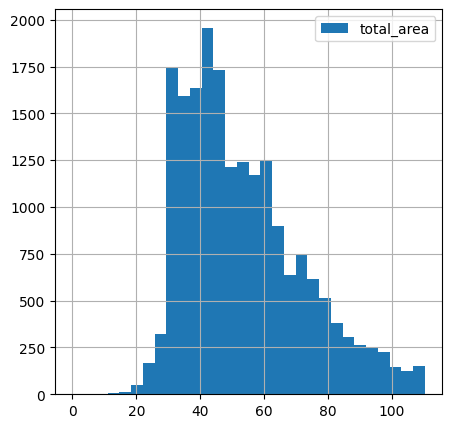

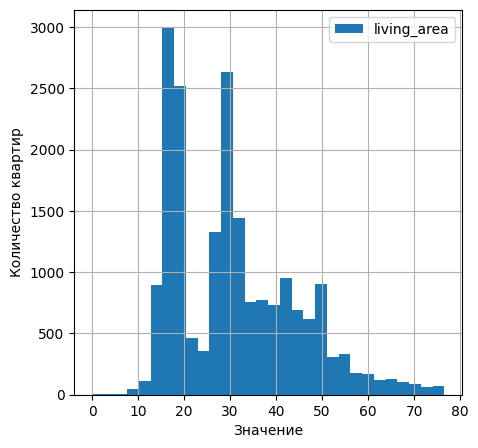

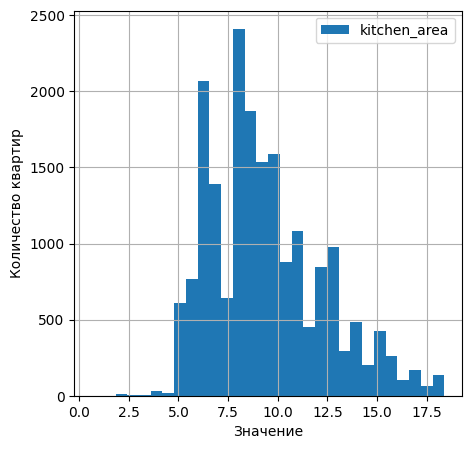

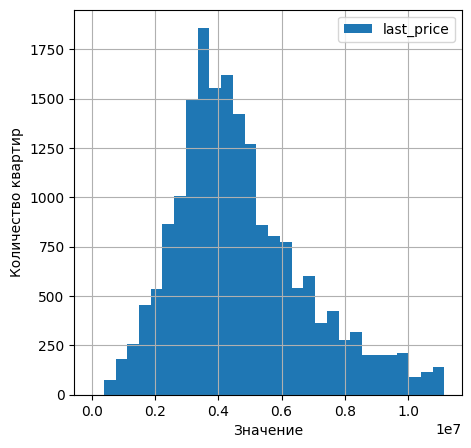

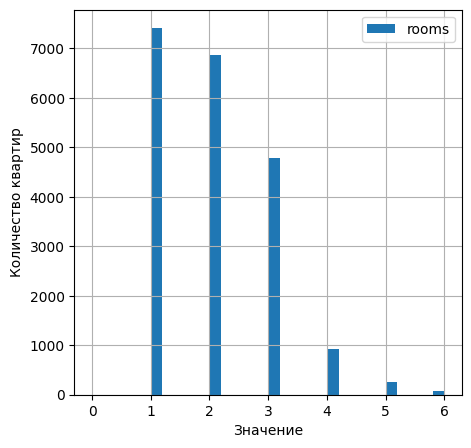

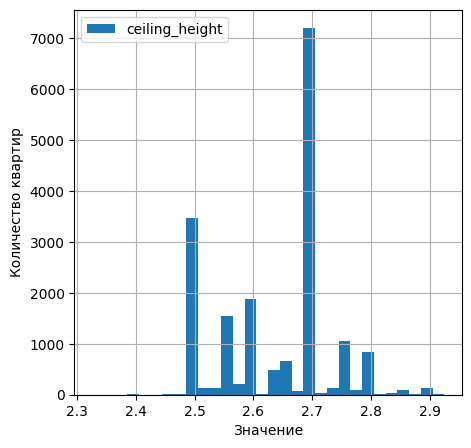

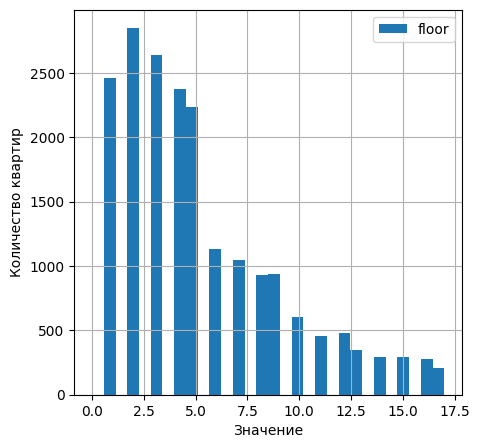

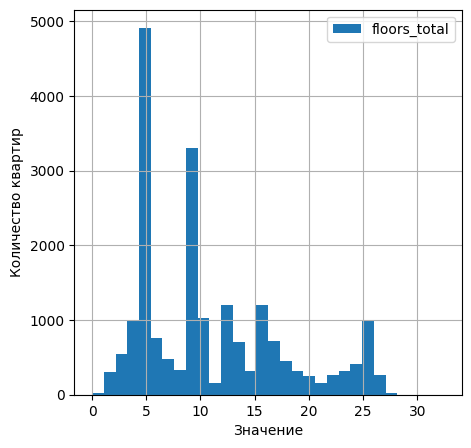

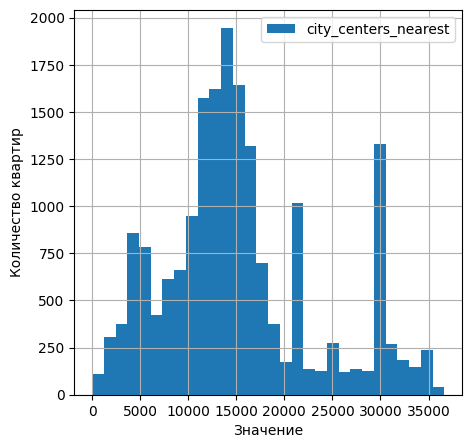

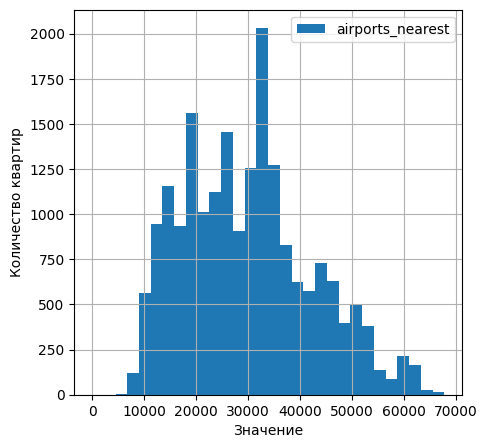

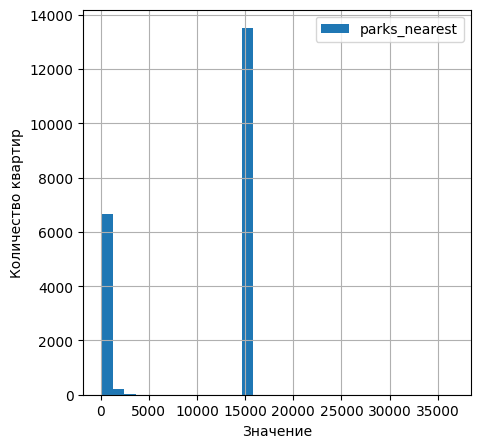

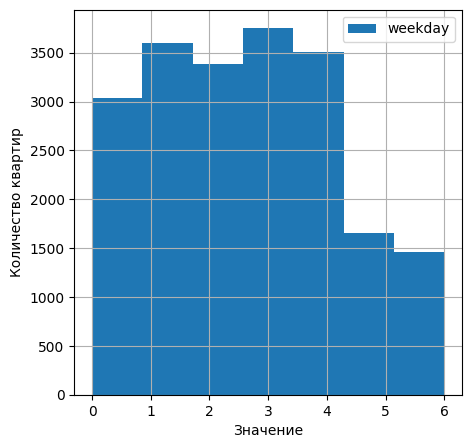

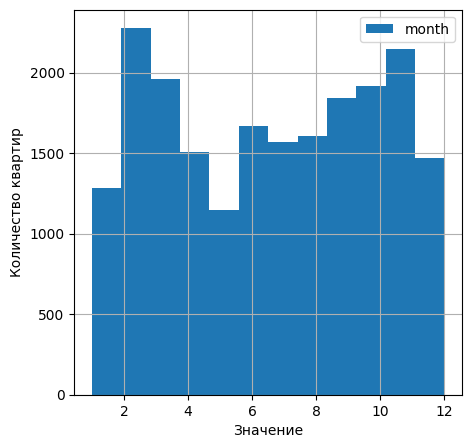

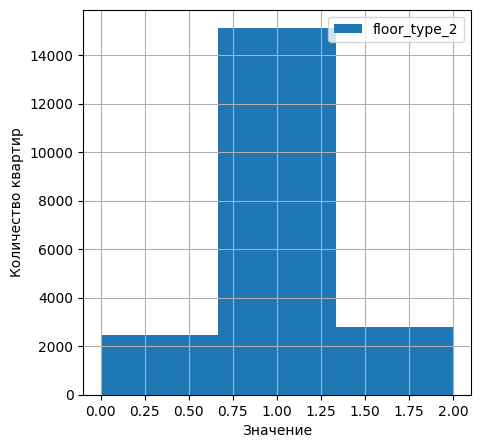

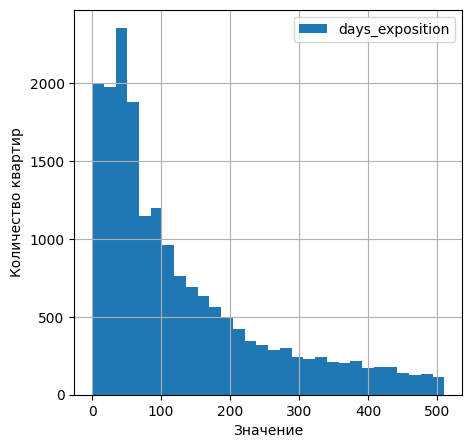

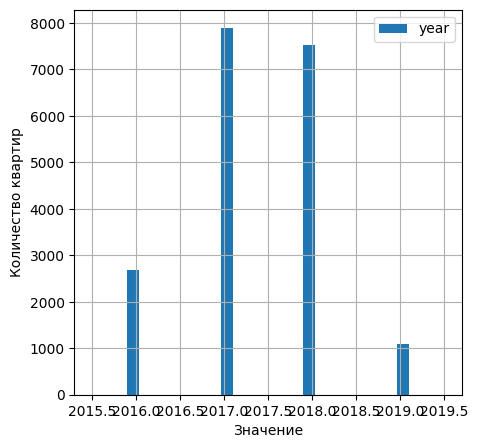

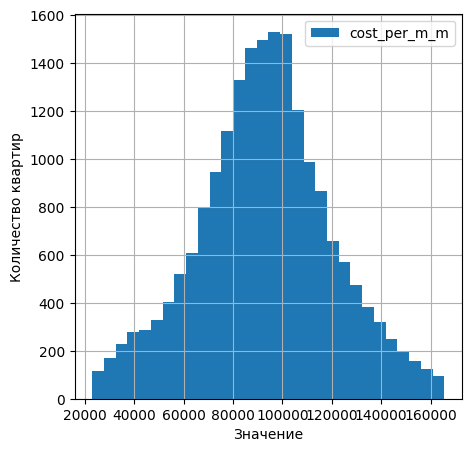

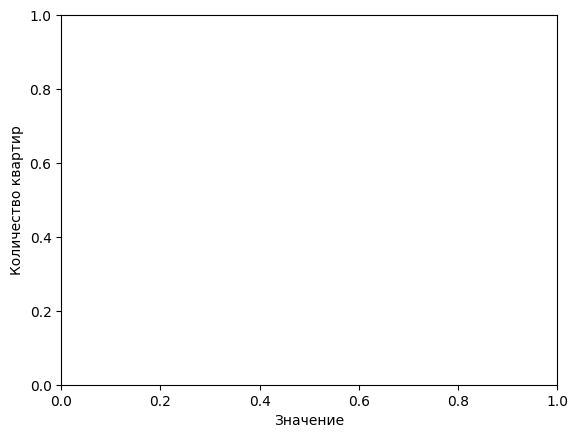

In [148]:
for k in df_res.columns:
    if k == 'month':
        df_res[k].hist(bins=12,figsize=(5, 5), legend=True,)

    elif k == 'floor_type_2':
        df_res[k].hist(bins =3,figsize=(5, 5), legend=True,)
    elif k == 'weekday':
        df_res[k].hist(bins=7,figsize=(5, 5), legend=True,)
    

    else:
        from_range = box_from[k] - mustache[k] 
        to_range = box_to[k] + mustache[k] 
        from_range = 0 if from_range < 0 else from_range
        df_res[k].hist(bins=30,figsize=(5, 5), range = (from_range , to_range), legend=True,)
        
    plt.show()
    plt.xlabel('Значение')
    plt.ylabel('Количество квартир')
        

* общая площать квартиры практически не имеет "левой" части малых значений, начинается с медианы и плавно уменьшаяется количеством квартир - увеличиваясь их размером

* жилая площадь имеет пики в местах заполнения медианными значениями, следовало сделать больше шагов заполнения по размеру общей площади; тогда "пик" распределился более плавно по значениям вокруг себя и был бы похож на график общей площади, резкий рост к медианным значениями и плавное снижение в "правый хвост"

* график размера кухни сход в двумя прошлыми, но у него более плавное распеделение левой части, если совсем маленьких квартир среди всех квартир - мало, то маленькие кухни составляют заметную часть диапазона; да и больших не так много, график уже более поход на график нормального распределения, особенно если учесть особенности нашего заполнения которые усилили пики и добавили вокруг них небольшие провалы

* график цены - колокообразное нормальное распределение со слегка растянутым хвостом в сторону количества квартир по высокой цене

* большая часть всех квартир выставленных на продажу - однокомнатные, двухкомнатные и трехкомнатные; все остальные квартиры составляют лишь небольную долю рынка

* высота потолков - судя по всему подобный график высоты потолков указывает на типизацию застроки, и это большое количество типовых 5этажек построенных по одному стандарту, которые неоднократно нам встретятся в дальшейших данных

* этажи: большинство квартир находится на высоте до 5го этажа, скорее всего "пятиэтажки" составляют приличную часть домов из диапазаона предложений. затем идет пласт 9этажек, с квартирами до 9, а после - хвост с плавным распределением квартир в высотках

* всего этажей в доме: видим именно то что предположили в прошлом пункте, большое количество 5этажных домов, 9этажные, и все остальные

* расстояние до центра: здесь мы видим что большинство домов в наших данных - продаются в столице, пик справа - наше заполнение медианным значением "дальних" мест жительства, думаю что при более аккуратном заполеннии пропусков график был бы графиком нормального распределенеия со слегка вытянутым в сторону удаления от столицы хвостом.

* расстояние до аэропорта: распределено, относительно равномерно и пропорционально, а совсем рядом - почти никто не живет

* расстояние до парка: подобным типом заполнения мы опять подрастеряли возможности к анализу, можно сказать только то что рядом с парком живет меньше чем не рядом :(

* количество размещенных обьявлений в будни - намного выше чем в выходные

* количество размещенных зимой - намного больше чем летом, пик в феврале и ноябре, сильный спад весной и постепенный рост до прежних значений - к осени

* количество квартир на типе этажей - без сравнения с другими - неинформативно, разве что банальность что "других" квартир больше чем квартир на первом и последнем этаже
хотя с другой стороны первый+последний этаж составляют треть от "других" и четверть от всего предложения, это довольно много

* квартиры в основном продаются быстро, в течении 100 дней - затем - плавное снижение скорости продажи для менее привлекательных вариантов

* в 2017 и 2018 году продалось намного больше квартир чем в 2016 и 2019 (если конечно корзинки немного не поплыли)

* цена за квардратный метр - красивый равномерный график нормального распределения


Изучим как быстро продавались квартиры:

In [149]:
print(df_res['days_exposition'].describe())

count    20387.000000
mean       180.742385
std        219.741709
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


медиана 95, среднее 180:
среднее сильно выше медианы изза хвоста долгих продаж, продажа "обычно" занимает 95 дней (мединанное значение), все что ниже - можно считать быстрой, а все что дольше - долгой; необычно долгой продажей будут значения выходящие за пределы "ящика с усами" от ~500 дней, а "обычной" долгой продажей будет срок в 231 день


гистогрмма всех значений:

In [150]:
len(df_res['days_exposition'].unique())

1139

гистограмма с отсечением выбросов: (range - ящик с усами)

Text(0, 0.5, 'Количество квартир')

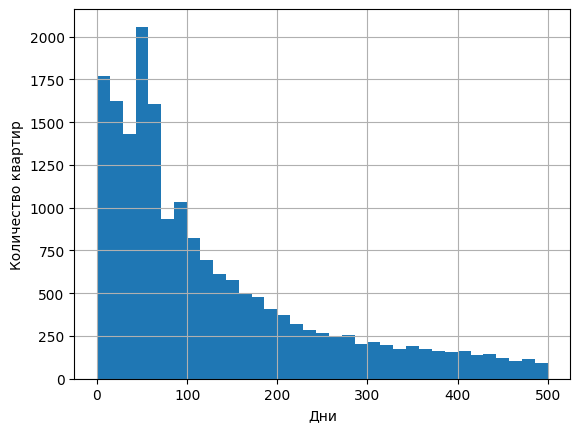

In [151]:
df_res['days_exposition'].hist(bins=35, range=(0,500));
plt.xlabel('Дни')
plt.ylabel('Количество квартир')

гистограма без отсечения для поиска интересных аномалий:

Text(0, 0.5, 'Количество квартир')

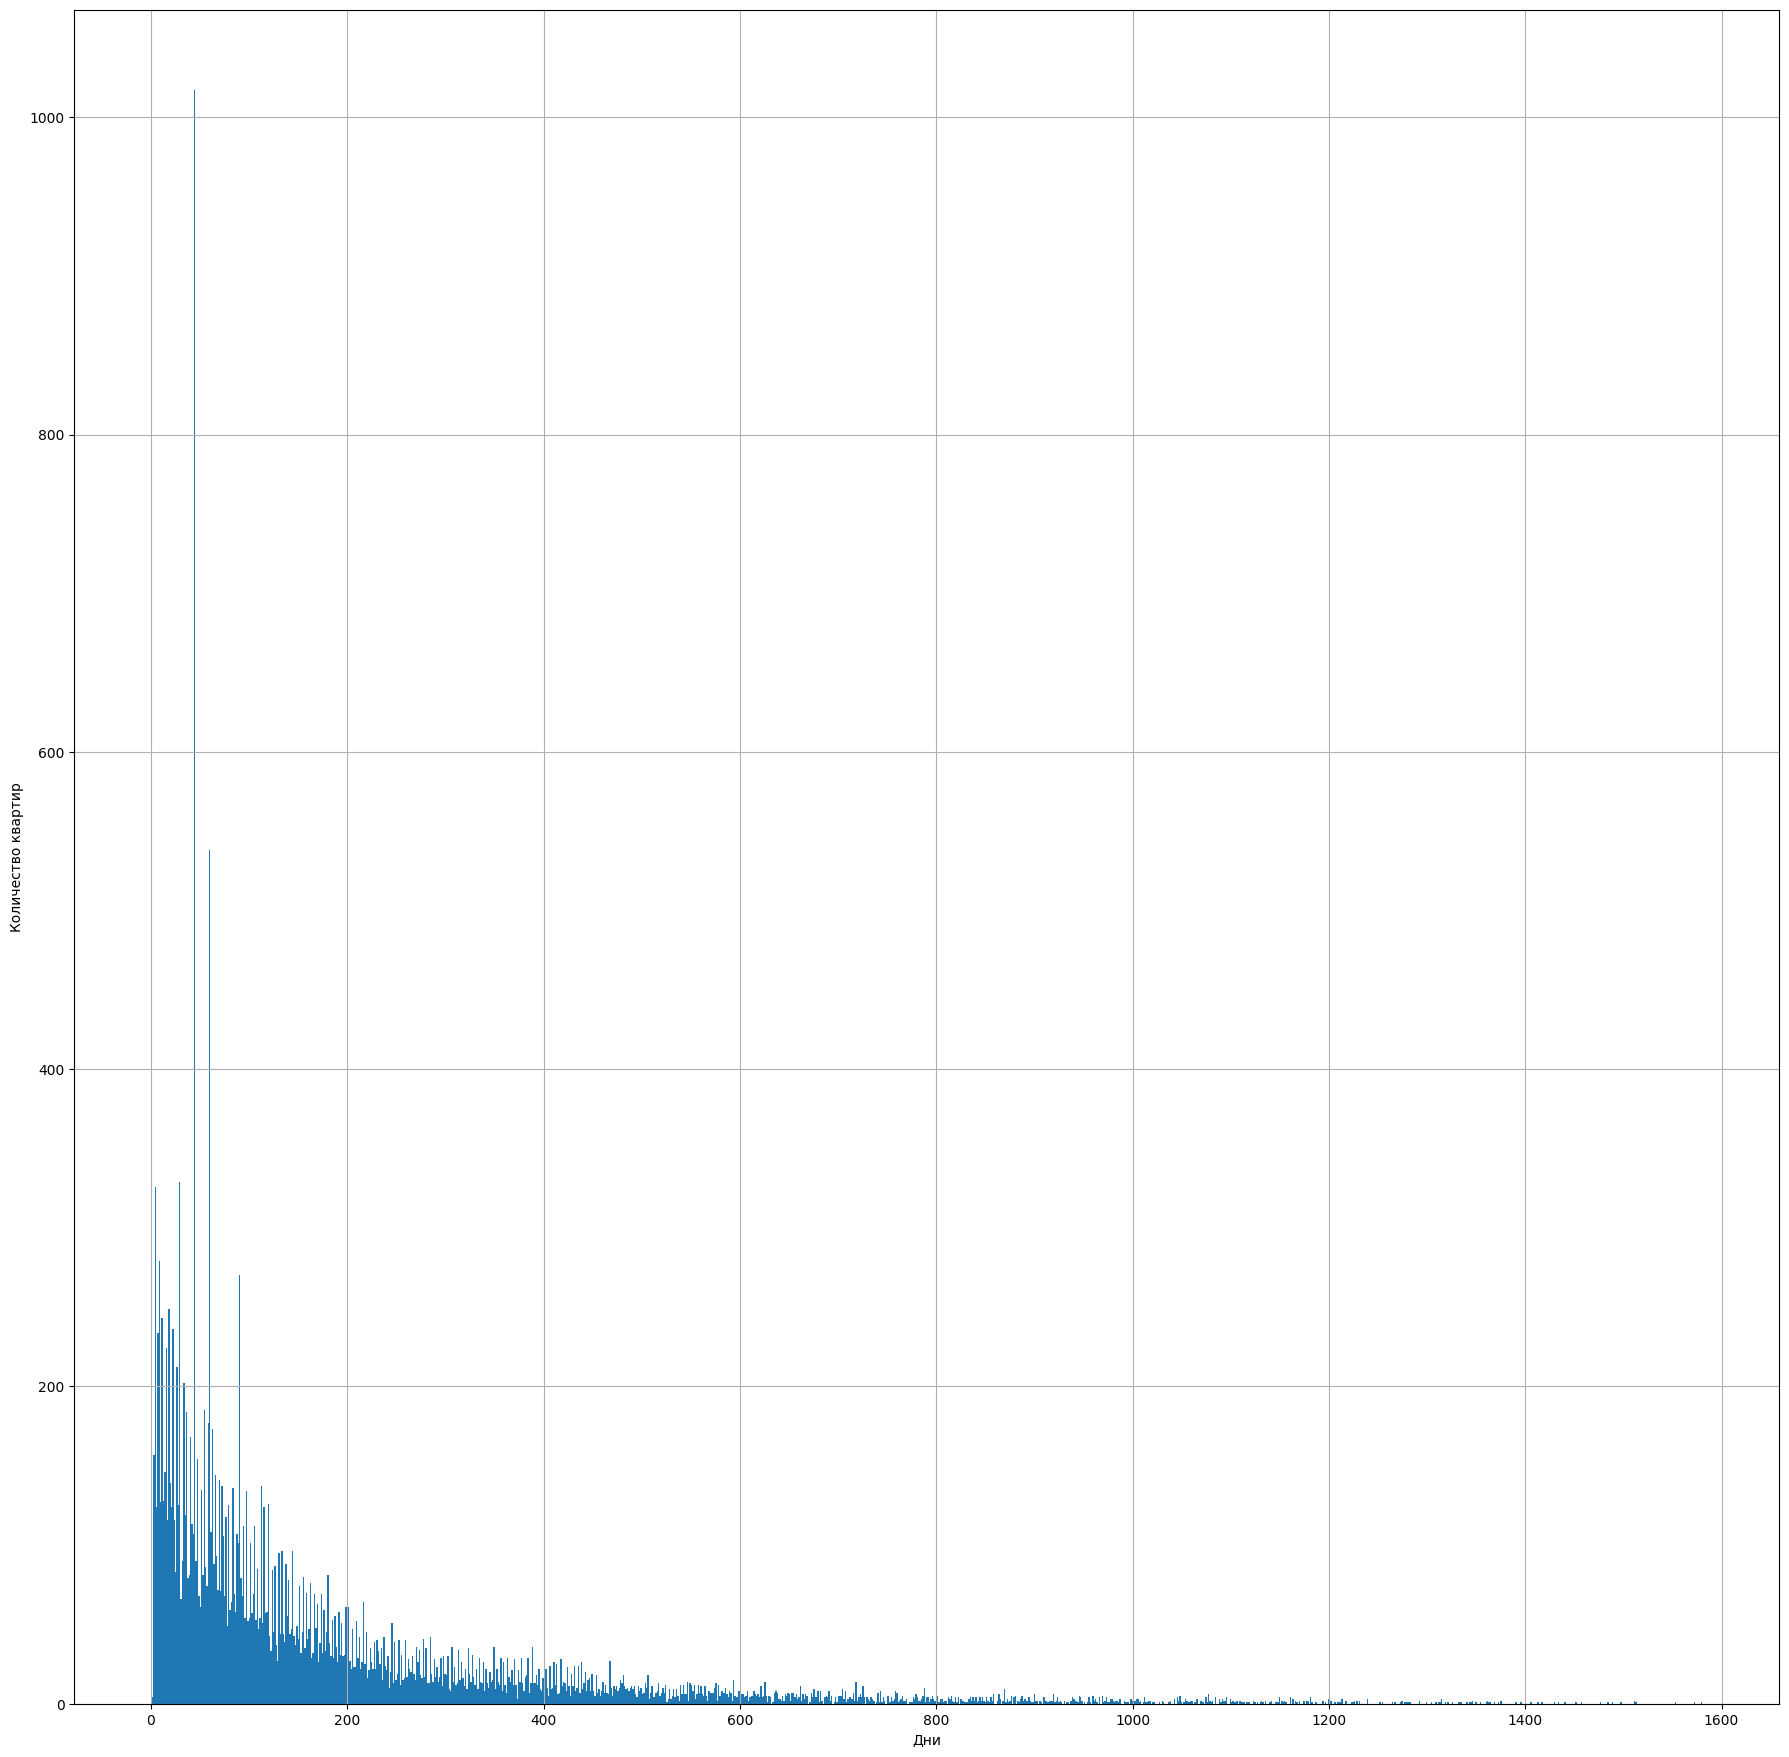

In [152]:
df_res['days_exposition'].hist(bins=1139,figsize=(22,22));
plt.xlabel('Дни')
plt.ylabel('Количество квартир')

рассмотрим аномалии подближе:

Text(0, 0.5, 'Количество квартир')

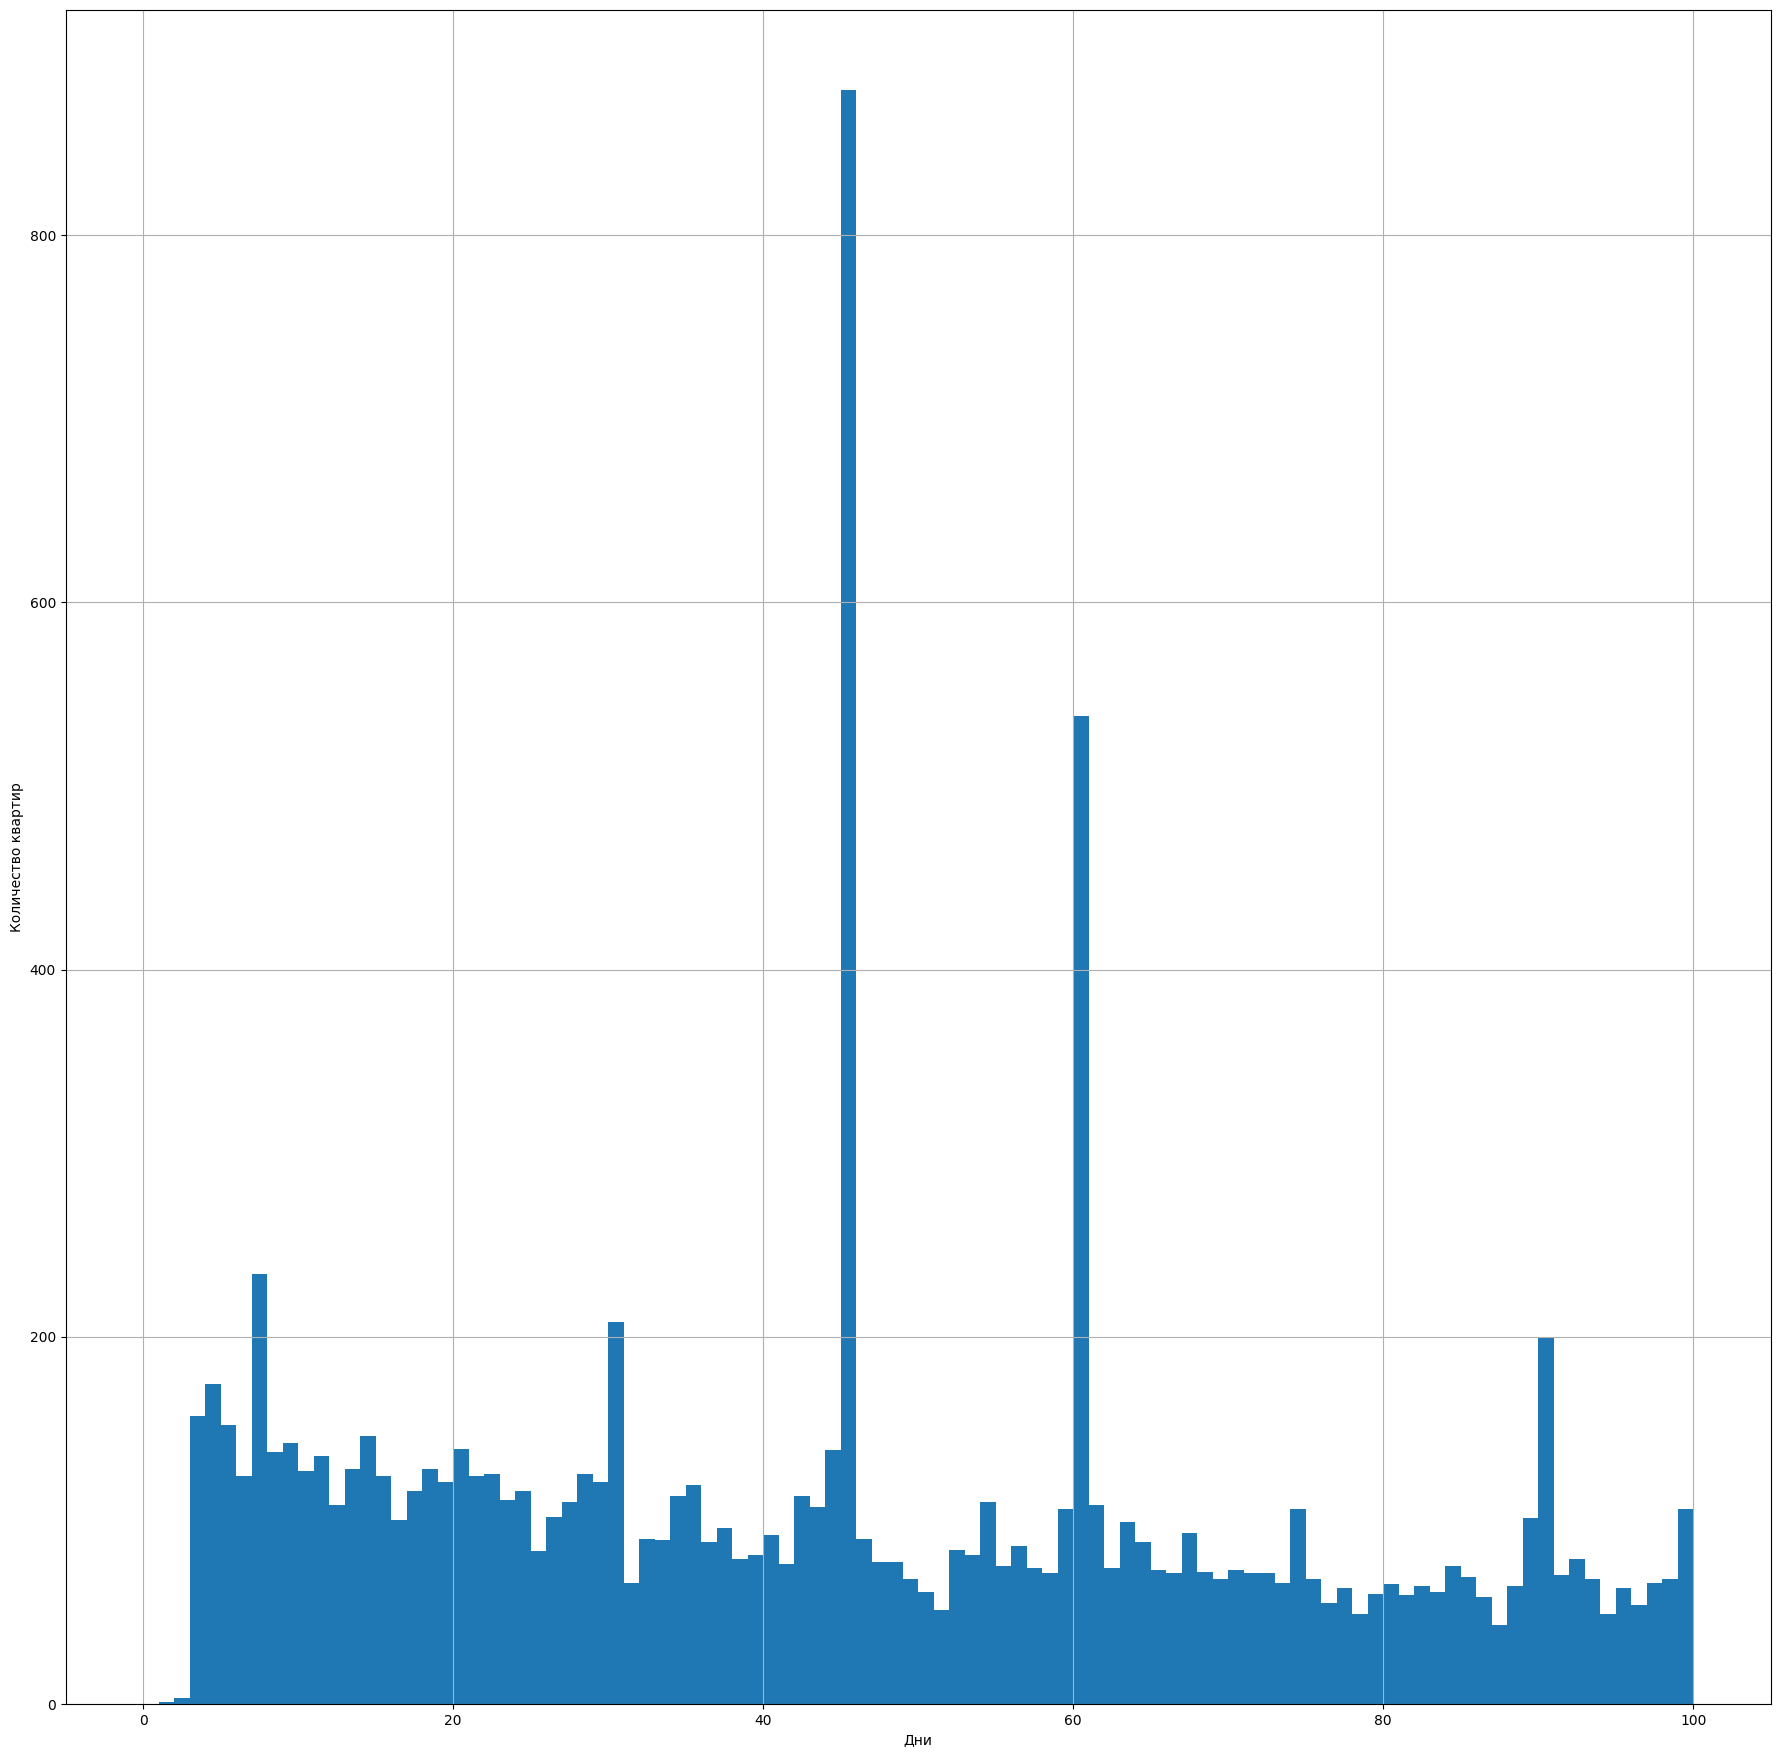

In [153]:
df_res['days_exposition'].hist(bins=100, range = (0,100), figsize=(22,22));

plt.xlabel('Дни')
plt.ylabel('Количество квартир')

Эти аномалии очень похожи на техническую особенность платформы: скорее всего в эти дни объявления снимаются автоматически если не были продлены пользователем

### факторы больше всего влияющие на общую стоимость объекта

Изучим зависимость цены от:
* общей площади
* жилой площади
* площади кухни
* количества комнат
* этажа, на котором расположена квартира (первый, последний, другой)
* даты размещения (день недели, месяц, год)

Построим графики, которые покажут зависимость цены от указанных выше параметров

In [154]:
display(df_res.corr())

total_area  living_area  kitchen_area  last_price  \
total_area              1.000000     0.911802      0.596241    0.643265   
living_area             0.911802     1.000000      0.435424    0.545503   
kitchen_area            0.596241     0.435424      1.000000    0.436663   
last_price              0.643265     0.545503      0.436663    1.000000   
rooms                   0.762021     0.839625      0.276913    0.355931   
ceiling_height          0.388376     0.360374      0.338850    0.281006   
floor                  -0.024886    -0.094825      0.130361    0.026731   
floors_total           -0.070906    -0.160652      0.158697   -0.004989   
city_centers_nearest   -0.139278    -0.110737     -0.161465   -0.160398   
airports_nearest       -0.064605    -0.056698     -0.073108   -0.084340   
parks_nearest          -0.167483    -0.170428     -0.099655   -0.154903   
weekday                -0.003739    -0.005234     -0.007745    0.004434   
month                   0.004505     0.000746      0.002981    0.005505   
floor_type_2            0.063539     0.053632      0.049751    0.056426   
days_exposition         0.149994     0.143103      0.105461    0.080879   
year                   -0.112194    -0.106493     -0.067662   -0.060697   
cost_per_m_m            0.306825     0.220848      0.363842    0.738472   

                         rooms  ceiling_height     floor  floors_total  \
total_area            0.762021        0.388376 -0.024886     -0.070906   
living_area           0.839625        0.360374 -0.094825     -0.160652   
kitchen_area          0.276913        0.338850  0.130361      0.158697   
last_price            0.355931        0.281006  0.026731     -0.004989   
rooms                 1.000000        0.228135 -0.152670     -0.223240   
ceiling_height        0.228135        1.000000 -0.008115     -0.028693   
floor                -0.152670       -0.008115  1.000000      0.678649   
floors_total         -0.223240       -0.028693  0.678649      1.000000   
city_centers_nearest -0.066134       -0.254649 -0.137296     -0.199339   
airports_nearest     -0.036319       -0.158352 -0.066495     -0.094197   
parks_nearest        -0.135096       -0.209419  0.090725      0.137271   
weekday              -0.004511       -0.013377  0.012772      0.014526   
month                 0.000526       -0.001738  0.017985      0.009037   
floor_type_2          0.023925        0.046413  0.313999     -0.005220   
days_exposition       0.125699        0.108953 -0.038741     -0.052364   
year                 -0.094880       -0.077989  0.019042      0.030613   
cost_per_m_m          0.056027        0.312592  0.132418      0.150846   

                      city_centers_nearest  airports_nearest  parks_nearest  \
total_area                       -0.139278         -0.064605      -0.167483   
living_area                      -0.110737         -0.056698      -0.170428   
kitchen_area                     -0.161465         -0.073108      -0.099655   
last_price                       -0.160398         -0.084340      -0.154903   
rooms                            -0.066134         -0.036319      -0.135096   
ceiling_height                   -0.254649         -0.158352      -0.209419   
floor                            -0.137296         -0.066495       0.090725   
floors_total                     -0.199339         -0.094197       0.137271   
city_centers_nearest              1.000000          0.763388       0.252936   
airports_nearest                  0.763388          1.000000       0.140771   
parks_nearest                     0.252936          0.140771       1.000000   
weekday                           0.020046          0.008405       0.006041   
month                            -0.015889         -0.002174       0.000101   
floor_type_2                     -0.009775         -0.006084      -0.017075   
days_exposition                  -0.034921         -0.026972      -0.042805   
year                              0.041975          0.038336       0.04154

зависимость цены:

In [155]:
print("от: общей площади", df_res['last_price'].corr(df_res['total_area']))
print("от: жилой площади",df_res['last_price'].corr(df_res['living_area']))
print("от: площади кухни",df_res['last_price'].corr(df_res['kitchen_area']))
print("от: количества комнат",df_res['last_price'].corr(df_res['rooms']))
#print(df_res['last_price'].corr(df_res['floor_type']))
print("от: тип этажа, на котором расположена квартира",df_res['last_price'].corr(df_res['floor_type_2']))
print("от: даты размещения - день",df_res['last_price'].corr(df_res['weekday']))
print("от: даты размещения - месяц",df_res['last_price'].corr(df_res['month']))
print("от: даты размещения - год",df_res['last_price'].corr(df_res['year']))

от: общей площади 0.6432651439753999
от: жилой площади 0.5455027664734949
от: площади кухни 0.436662740345719
от: количества комнат 0.3559308552767747
от: тип этажа, на котором расположена квартира 0.056425966815538464
от: даты размещения - день 0.004433726188080626
от: даты размещения - месяц 0.0055049024286631795
от: даты размещения - год -0.06069679859885786


На стоимость обьекта больше всего влияет общая площадь этого обьекта, чем больше - тем дороже
(между жилой площадью и площадью кухни - связь тоже есть - но она скорее всего опосредованная, вытекающая из простой связи с общей площадью) между количеством комнат и ценой так же есть связь но ее так же можно отнести к побочным от общей площади.

у остальных предлагаемых критериев для оценки связь либо остуствует либо совсем незначительная

создадим список нужных столбцов:

In [156]:
list_for_graph = [
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms',
    'floor_type_2',
    'weekday',
    'month',
    'year'    
]

построим диаграммы рассеивания для интересующих нас пар зависимостей:

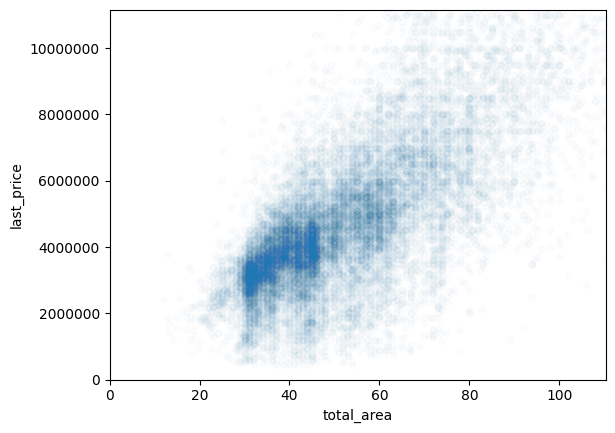

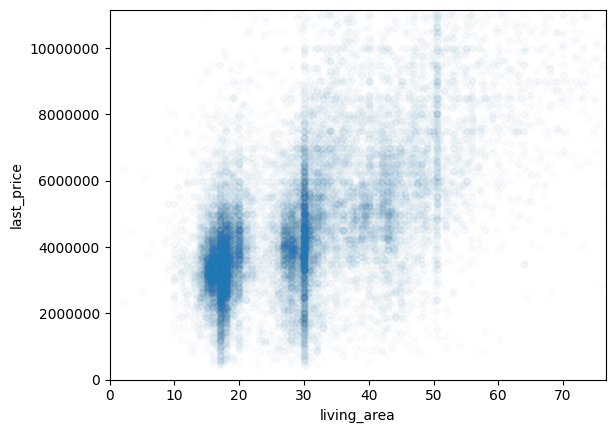

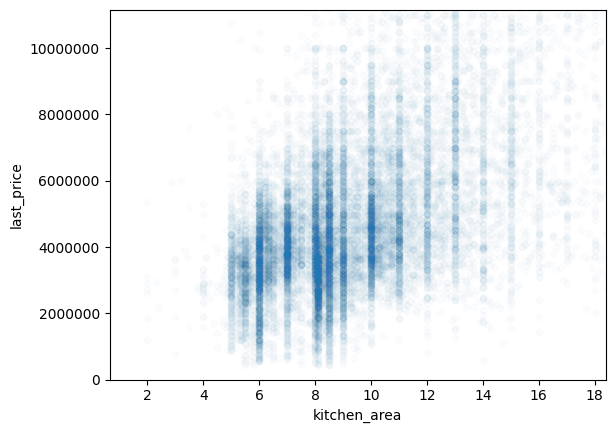

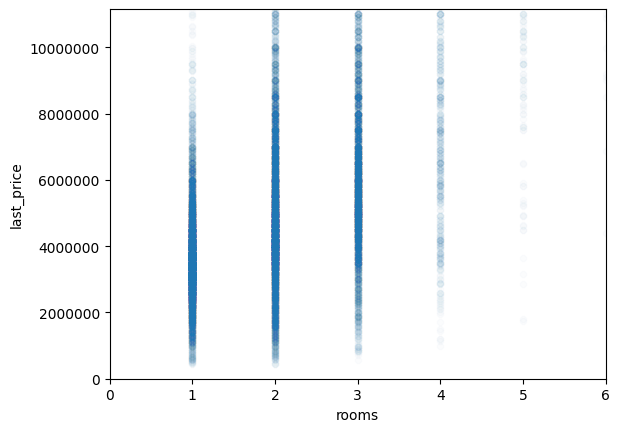

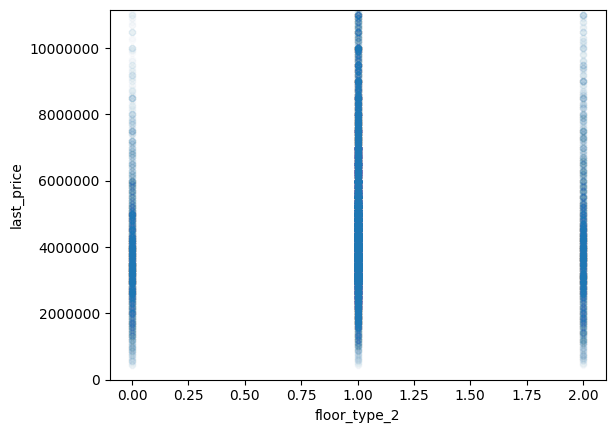

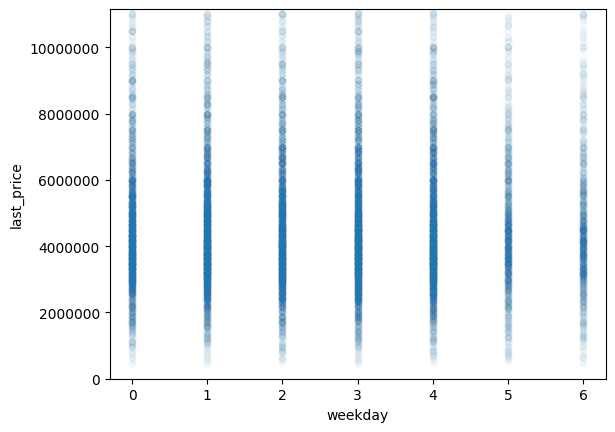

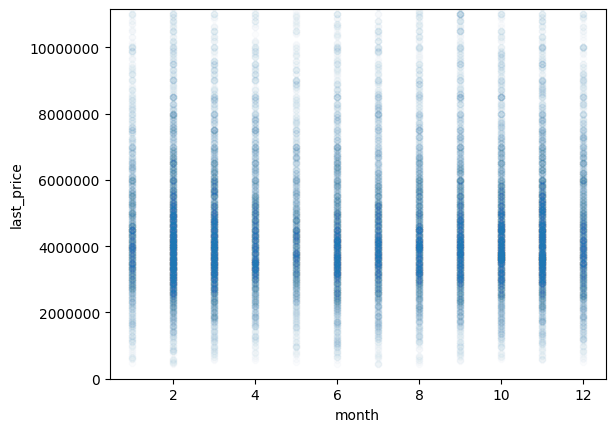

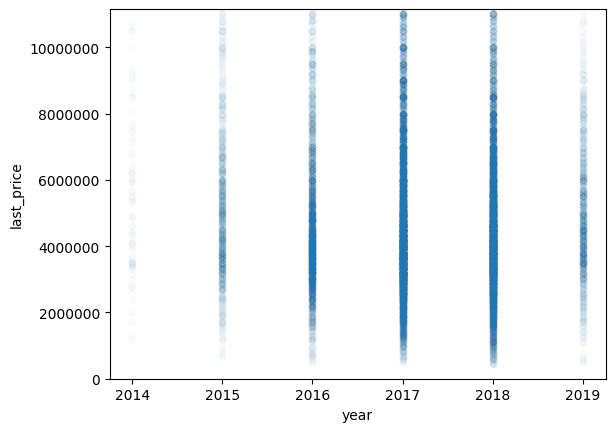

In [157]:
#границы усов для отсева выбросов возьмем из прошлых расчетов
for el in list_for_graph:

   
    if el in ['floor_type_2', 'weekday', 'month', 'year']:
        df_res.plot(x=el, y='last_price', kind='scatter', alpha=0.015)      
    
    else:
        df_res.plot(x=el, y='last_price', kind='scatter', alpha=0.015)
    

        from_range = box_from[el] - mustache[el] 
        to_range = box_to[el] + mustache[el] 
        from_range = 0 if from_range < 0 else from_range
        
        plt.xlim(from_range, to_range)
        
    price_range_from = box_from['last_price'] - mustache['last_price'] 
    price_range_to = box_to['last_price'] + mustache['last_price']
    price_range_from = 0 if price_range_from < 0 else price_range_from
    
    plt.ylim(price_range_from, price_range_to)
    plt.ticklabel_format(style='plain')

    

* на графиках видно сильную взаимосвязь между общей площадью квартиры и ценой продажи

* взаимосвязь между размером жилой площади и ценой начитает проявлятся начиная с рамера жилой площади выше среднего

* взаимосвязь площади кухни на графике выглядит совсем незначительно, корреляция по формуле скорее всего насчиталась только изза связи большй кухни с большой квартирой

* комнаты - для  1,2,3 комнат кореляция небольшая, но затем сильно растет

* этажи - квартиры на первых и последних этажах заметно дешевле других, однако это может быть обусловлено большим количеством 5этаже в выборке, стоимость квартиры в которых заметно ниже чем в высотках, и разница на графике = разница между старым 5этажным домом и новым ЖК

* день недели - на взгляд в выходные покупают (а в том числе и дорогие квартиры) заметно реже чем в будни

* месяцы - разница незначительная, весной заметен небольшой спад

* годы - 2017 и 2018 пик продаж с большим отрывом, впрочем по хорошему желательно проверить дату составления таблицы, если она была составлена например в начале 2019 - это может быть не спадом а просто недостаточным количеством данных, но если ближе к концу - на лицо спад продаж


### средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [158]:
df['locality_name'].value_counts().head(10)

locality_name
Санкт-Петербург      13572
Мурино                 547
Кудрово                439
посёлок Шушары         407
Всеволожск             339
Колпино                308
Пушкин                 307
посёлок Парголово      302
Гатчина                268
Выборг                 208
Name: count, dtype: int64

In [159]:
grp_local_cost = df.groupby('locality_name').agg({'cost_per_m_m':{'median', 'count'}})
print(grp_local_cost)
print(grp_local_cost.columns)

                     cost_per_m_m              
                            count        median
locality_name                                  
Бокситогорск                   14  16792.929293
Волосово                       31  40000.000000
Волхов                         85  34545.454545
Всеволожск                    339  65789.473684
Выборг                        208  56960.594315
...                           ...           ...
село Путилово                   2  39921.758208
село Рождествено                2  34553.884000
село Русско-Высоцкое            8  51540.572845
село Старая Ладога              1  32727.272727
село Шум                        1  33898.305085

[292 rows x 2 columns]
MultiIndex([('cost_per_m_m',  'count'),
            ('cost_per_m_m', 'median')],
           )


In [160]:
grp_local_cost_10_desc = grp_local_cost.sort_values(by=[('cost_per_m_m', 'count')],ascending=False).head(10)
print(grp_local_cost_10_desc)

                  cost_per_m_m               
                         count         median
locality_name                                
Санкт-Петербург          13572  103078.745899
Мурино                     547   86111.111111
Кудрово                    439   94507.531866
посёлок Шушары             407   76125.000000
Всеволожск                 339   65789.473684
Колпино                    308   74005.089610
Пушкин                     307   97938.144330
посёлок Парголово          302   91387.362637
Гатчина                    268   67180.706522
Выборг                     208   56960.594315


In [161]:
grp_local_cost_10_desc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Санкт-Петербург to Выборг
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (cost_per_m_m, count)   10 non-null     int64  
 1   (cost_per_m_m, median)  10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 240.0+ bytes


In [162]:
price_for_km_for_grp_local_cost_10_desc = grp_local_cost_10_desc.sort_values(by=[('cost_per_m_m', 'median')],ascending=False)
print(price_for_km_for_grp_local_cost_10_desc)

                  cost_per_m_m               
                         count         median
locality_name                                
Санкт-Петербург          13572  103078.745899
Пушкин                     307   97938.144330
Кудрово                    439   94507.531866
посёлок Парголово          302   91387.362637
Мурино                     547   86111.111111
посёлок Шушары             407   76125.000000
Колпино                    308   74005.089610
Гатчина                    268   67180.706522
Всеволожск                 339   65789.473684
Выборг                     208   56960.594315


### Средняя цена каждого километра расстояния от центра Санкт-Петербурга

In [163]:
pivot_spb_km_cost_mean = df[df['locality_name']=='Санкт-Петербург'].pivot_table(index='city_centers_km',values='last_price')
display(pivot_spb_km_cost_mean)

last_price
city_centers_km              
0.0              3.037803e+07
1.0              1.900463e+07
2.0              1.761016e+07
3.0              1.038257e+07
4.0              1.322568e+07
5.0              1.377977e+07
6.0              1.485618e+07
7.0              1.387810e+07
8.0              9.407362e+06
9.0              6.651493e+06
10.0             6.170813e+06
11.0             5.982925e+06
12.0             5.831496e+06
13.0             5.910695e+06
14.0             5.446346e+06
15.0             5.570868e+06
16.0             5.203429e+06
17.0             5.160962e+06
18.0             5.055125e+06
19.0             4.950070e+06
20.0             5.399669e+06
21.0             5.182268e+06
22.0             5.140580e+06
23.0             4.577812e+06
24.0             3.854430e+06
25.0             4.052840e+06
26.0             3.943437e+06
27.0             8.300000e+06
28.0             5.026429e+06
29.0             4.114000e+06

In [164]:
pivot_spb_km_cost_median = df[df['locality_name']=='Санкт-Петербург'].pivot_table(index='city_centers_km',values='last_price', aggfunc='median')
display(pivot_spb_km_cost_median)

last_price
city_centers_km            
0.0              13500000.0
1.0              10685000.0
2.0               9500000.0
3.0               8000000.0
4.0               8775000.0
5.0               8970000.0
6.0               8500000.0
7.0               7300000.0
8.0               6900000.0
9.0               5200000.0
10.0              4900000.0
11.0              4890000.0
12.0              4855000.0
13.0              5100000.0
14.0              4749000.0
15.0              4715000.0
16.0              4600000.0
17.0              4500000.0
18.0              4200000.0
19.0              4350000.0
20.0              5050000.0
21.0              4910699.0
22.0              4672500.0
23.0              4270000.0
24.0              3480000.0
25.0              3794881.0
26.0              3347500.0
27.0              8300000.0
28.0              4990000.0
29.0              4370000.0

In [165]:
pivot_spb_km_cost = df[df['locality_name']=='Санкт-Петербург'].pivot_table(index='city_centers_km',values='cost_per_m_m')
display(pivot_spb_km_cost)

cost_per_m_m
city_centers_km               
0.0              226876.498375
1.0              159665.424018
2.0              155742.039092
3.0              116870.770512
4.0              132374.940228
5.0              138812.084651
6.0              147916.592487
7.0              151154.772235
8.0              122854.017287
9.0              110941.694840
10.0             111026.302612
11.0             106207.107780
12.0             107153.431675
13.0             106476.431277
14.0             103017.560883
15.0             102164.241283
16.0              99028.520976
17.0              95918.647693
18.0              95169.581346
19.0              98709.495380
20.0             100954.144273
21.0              91336.872260
22.0              90260.341534
23.0              89830.244101
24.0              85736.904595
25.0              91531.371618
26.0              87832.108756
27.0             132115.709459
28.0              81161.915320
29.0              76238.677228

построим график

In [166]:
_ = df[df['locality_name']=='Санкт-Петербург']

In [167]:
_['city_centers_km'].corr(_['cost_per_m_m'])

-0.3088336455527189

график разброса для визуализации динамики цены за кв\м2 относительно расстояния от центра

<Axes: xlabel='city_centers_km', ylabel='cost_per_m_m'>

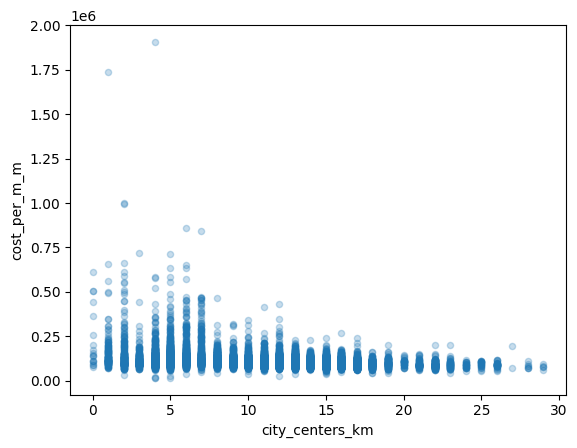

In [168]:
_.plot(x='city_centers_km', y='cost_per_m_m', kind='scatter', alpha = 0.25)

поправим границы

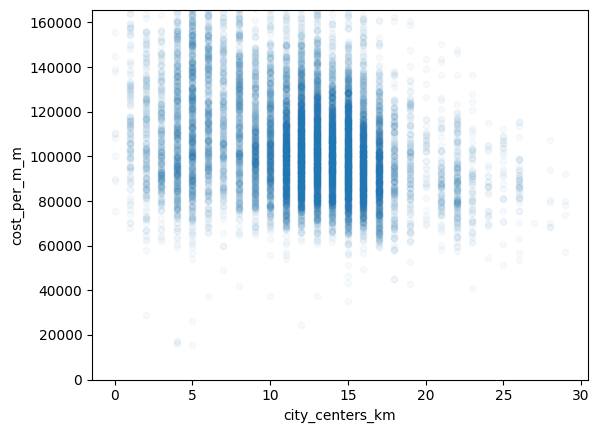

In [169]:
_.plot(x='city_centers_km', y='cost_per_m_m', kind='scatter', alpha = 0.035)

y_range_from = box_from['cost_per_m_m'] - mustache['cost_per_m_m'] 
y_range_to = box_to['cost_per_m_m'] + mustache['cost_per_m_m']
y_range_from = 0 if price_range_from < 0 else price_range_from
    
plt.ylim(y_range_from, y_range_to)
plt.ticklabel_format(style='plain')

график разброса для визуализации динамики цены квартиры относительно расстояния от центра

<Axes: xlabel='city_centers_km', ylabel='last_price'>

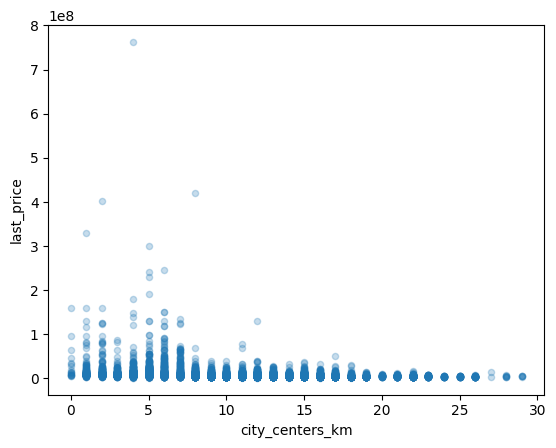

In [170]:
_.plot(x='city_centers_km', y='last_price', kind='scatter', alpha = 0.25)

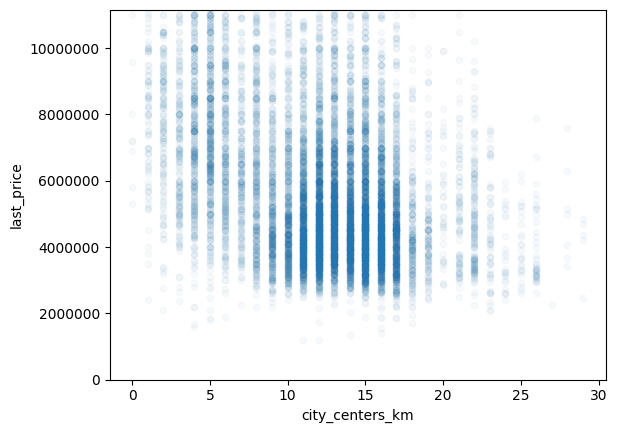

In [171]:
_.plot(x='city_centers_km', y='last_price', kind='scatter', alpha = 0.035)

y_range_from = box_from['last_price'] - mustache['last_price'] 
y_range_to = box_to['last_price'] + mustache['last_price']
y_range_from = 0 if price_range_from < 0 else price_range_from
    
plt.ylim(y_range_from, y_range_to)
plt.ticklabel_format(style='plain')

построим построим линейный график для визуализации динамики цены относительно расстояния от центра

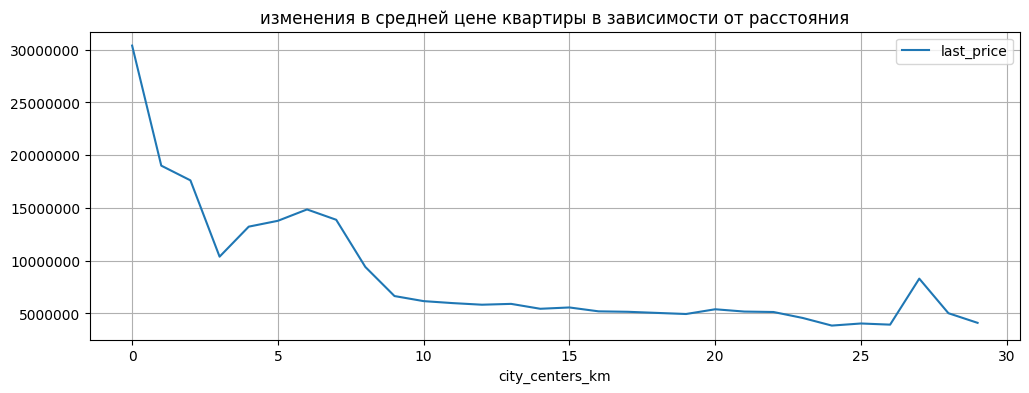

In [172]:
pivot_spb_km_cost_mean.plot(figsize=(12,4), grid = True, title = 'изменения в средней цене квартиры в зависимости от расстояния');
plt.ticklabel_format(style='plain')

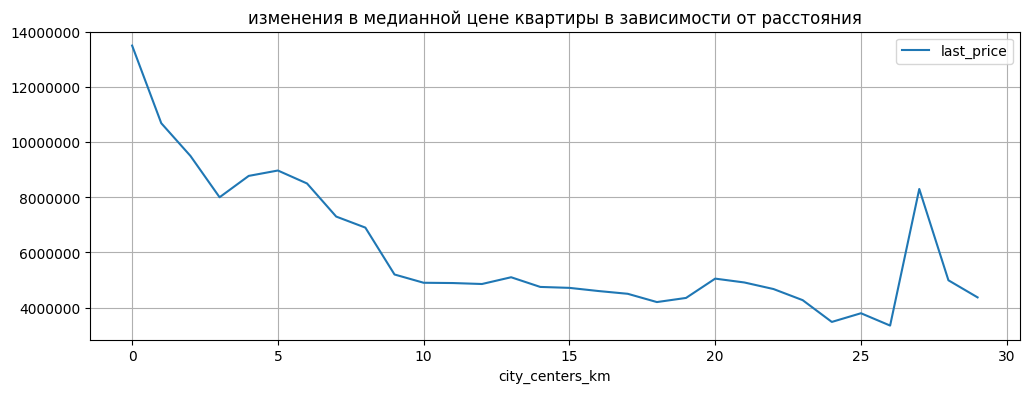

In [173]:

pivot_spb_km_cost_median.plot(figsize=(12,4), grid = True, title = 'изменения в медианной цене квартиры в зависимости от расстояния');
plt.ticklabel_format(style='plain')

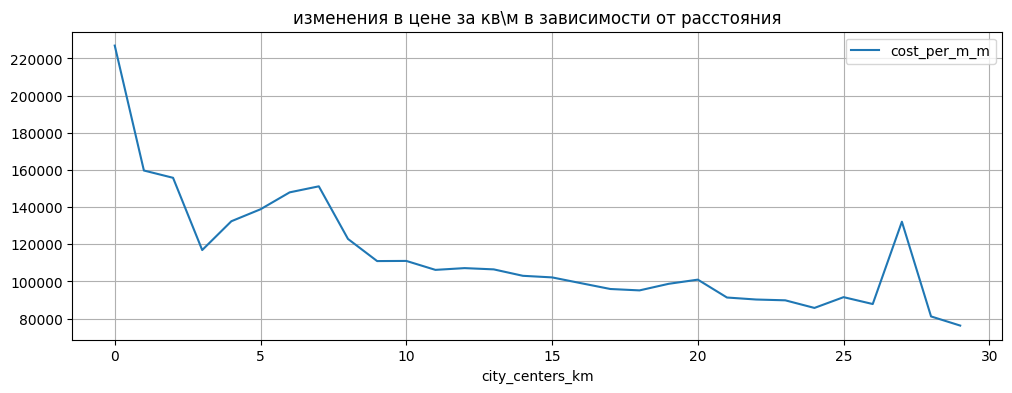

In [174]:
pivot_spb_km_cost.plot(figsize=(12,4), grid = True, title = 'изменения в цене за кв\м в зависимости от расстояния');

чем ближе к центру города - тем больше ОЧЕНЬ ДОРОГИХ и дорогих обьектов, которых гораздо меньше на отдалении, в остальном, если не учитывать премиум сегмент распределеие куда более плавно и равномерно особенно в диапазоне 10-17 км

проверим гипотезу что однокомнатные квариры невогодны с точки зрения цены на кв.м

(0.0, 10.0)

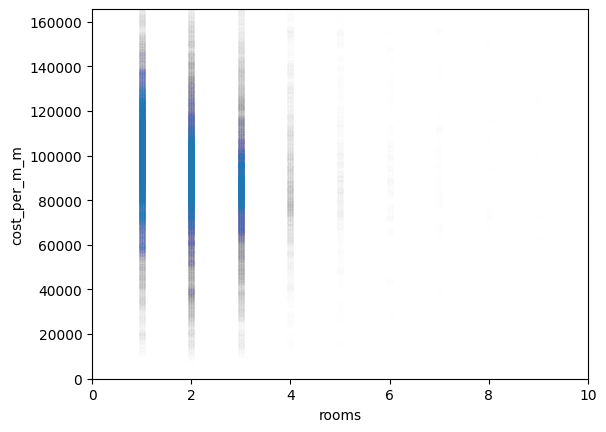

In [175]:
df_res.plot(x='rooms', y='cost_per_m_m', kind='scatter', alpha=0.005) 
y_range_from = box_from['cost_per_m_m'] - mustache['cost_per_m_m'] 
y_range_to = box_to['cost_per_m_m'] + mustache['cost_per_m_m']
y_range_from = 0 if price_range_from < 0 else price_range_from
    
plt.ylim(y_range_from, y_range_to)
plt.ticklabel_format(style='plain')
plt.xlim(0, 10)

действительно, похоже что так, цена за кв\м у двухкомнатных и трехкомнатных - выгоднее

### Общий вывод

>Задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

Интересные особенности и зависимости на рынке недвижимости которые были найдены в ходе работы:

* кореляция количества комнат и цены неоднородна - начиная с 4 комнат она резко возрастает
* большая часть всех квартир выставленных на продажу - однокомнатные, двухкомнатные и трехкомнатные; все остальные квартиры составляют лишь небольную долю рынка
* количество размещенных обьявлений зимой - намного больше чем летом, пик в феврале и ноябре, а весной сильный спад
* большинство домов к которых продаются квартиры - пятиэтажки
* большая часть рынка недвижимости между столицей и окрестностями - квартиры в столице
* подавляющее большинство квартир одинакого "небольшого-среднего" размера
* малый размер кухни не может являтся показателем размера квартиры - достаточно много больших квартир с маленькой кухней
* количество размещенных обьявлений в будни - намного выше чем в выходные
* покупают квартиры тоже чаще по будням чем в выходные
* квартиры на первом и последнем этаже в сумме составляют четверть от всех квартир на рынке недвижимости спб и ленинградской области
* "хорошие" квартиры в основном продаются быстро, а если квартира не продалась за 3 месяца - скорее всего условия для покупателя не самые соблазнительные, и продавцу придется ждать еще с полгода
* в 2017 и 2018 году продалось намного больше квартир чем в 2016 и 2019
* график цены цена за квардратныЙ метр - красивый равномерный график расределения по Гауссу
* цена квартире очень сильно зависит от ее общей площади, при этом наиболее сильно - начиная от площади выше среднего
* квартире на первых и последних этажах в среднем дешевле (впрочем скорее всего что это квартиры не новом 5 этажном доме)
* покупают квартиры тоже чаще по будням чем в выходные
* в 2017 и 2018 году был резкий рост и пик продаж недвижимости в СПБ и Ленинградской области
* чем ближе к центру города - тем больше ОЧЕНЬ ДОРОГИХ обьектов недвижимости, которые очень редко встречаются на отдалении


Гипотезы выдвинутые в начале:
* основную роль в ценообразовании недвижимости играет ее площадь
     >подтвердилась, действительно это один из самых важных критериев
* маленькие квартиры - менее выгодны по показателю цена \ кв метр
    >действительно, в среднем так и есть
* покупка квартир - сезонная (есть изменение спроса и количества продаж относительно времени года)
    >подтвердилсь, квартиры покупают зимой, а весной резкий спад который постепенно отрастает   
* изменение цены на квартиру линейно пропорционально ее удалению от центра
    >не подтвердилась, зависимость действительно есть, но другого основным отличием центра и при удалении от него - потолок цены на квартиры, который в центре очень высок, и этим самым двигает средние значения



Итого: получили сырые данные, заполнили пропуски в них на основе байесовских выводов, часть отстуствующих данных восстановили найдя информацию в открытых источниках, избавились от дубликатов, оценили дисперсию, привели к единому числовому формату для анализа, посмотрели матрицу корреляций, нашли "связанные данные", построили графики на основе которых сделали выводы описаные выше, проверили гипотезы.
